# **Information about the dataset**
- The complete dataset contains seperate datasets for each of the last 6 seasons in 21 leagues accross 11 nations (some have more divisions some have just the top one).
- This is the `Preprocessing` part of the assignment, therefore it will be a detailed dive into it. Mainly focusing on missing values and creating new values as well as a brief look into the target variable distributions (deeper data Exploration is in the Data Exploration part). I will try to explain all the reasons for each part as best as I can.

# **0 Loading the datasets and Libraries**
- mounting the disc for the access to the datasets
- loading necessary libraries

## 0.1 **Loading all the datasets for each country (containing all leagues and all seasons.**
- I will have 2 types of datasets:
  - all the leagues and seasons accross all nations in one table
  - every country having its own table (if we want to buy more data from a selected countries/leagues)


To enable universal loading without Google Drive mounting, we'll download a zipped version of the `ML2_DATA` folder from a shared Google Drive link and extract it.

In [38]:
# Install gdown for downloading from Google Drive
!pip install gdown


GDRIVE_ZIP_LINK = 'https://drive.google.com/file/d/1HlOgHnaz1m478Qbi9wBOSSsa-1G-SF_V/view?usp=drive_link'

# Extract the file ID from the link
file_id = GDRIVE_ZIP_LINK.split('/')[-2]

# URL
url = f'https://drive.google.com/uc?id={file_id}'

# destination path in Colab
zip_destination = '/content/Unprocessed Data.zip'
extract_path = '/content/'

# Download the zip file
print(f'Downloading Unprocessed Data.zip from Google Drive...')
!gdown "{url}" -O '{zip_destination}'

# Unzip the file
print(f'Unzipping Unprocessed Data.zip to {extract_path}...')
!unzip -q -o '{zip_destination}' -d '{extract_path}'

print('Data setup complete. The \'Unprocessed Data\' folder should now be in \'/content/Unprocessed Data/\'.')

Downloading...
From: https://drive.google.com/uc?id=1HlOgHnaz1m478Qbi9wBOSSsa-1G-SF_V
To: /content/Unprocessed Data.zip
100% 5.49M/5.49M [00:00<00:00, 151MB/s]
Unzipping Unprocessed Data.zip to /content/...
Data setup complete. The 'Unprocessed Data' folder should now be in '/content/Unprocessed Data/'.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Loading the data, I did one dataset for each country, it conjoins all the leagues and years together.
# I also added a column named SEASON, that shows which season it was.
# I also added a column named OVER2.5 that is the target variable and shows whether
# less than 2.5 goals were scored in the match (0), or more than 2.5 (1)

# the code goes through the dataset folder and sees if there is a dataset for set league and year.
countries = ['belgium', 'england', 'france', 'germany', 'greece',
             'italy', 'netherlands', 'portugal', 'scotland', 'spain', 'turkey']
leagues = ['0','1','2','3']
years = ['1920', '2021', '2122', '2223', '2324', '2425']

for country in countries:
    country_data = []  # List to hold dataframes for the current country
    for league in leagues:
        for year in years:
            # Construct the file path - UPDATED FOR UNIVERSAL LOADING
            file_path = f'/content/Unprocessed Data/{country}/{league}/{year}.csv'
            try:
                df = pd.read_csv(file_path)
                # Adding a 'season' column with the current year
                df['Season'] = year
                df['Over2.5'] = (df['FTHG'] + df['FTAG'] > 2.5).astype(int)
                country_data.append(df)
                print(f'Loaded data for {country}, league {league}, year {year}')
            except FileNotFoundError:
                print(f'File not found for {country}, league {league}, year {year}. Skipping.')
            except Exception as e:
                print(f'An error occurred while loading data for {country}, league {league}, year {year}: {e}')

    if country_data:  # Concatenate if there's any data for the country
        df_name = f'data_{country}'
        globals()[df_name] = pd.concat(country_data, ignore_index=True)
        print(f'Concatenated data for {country} into {df_name} with shape: {globals()[df_name].shape}')
    else:
        print(f'No data found for {country}. Skipping concatenation.')


File not found for belgium, league 0, year 1920. Skipping.
File not found for belgium, league 0, year 2021. Skipping.
File not found for belgium, league 0, year 2122. Skipping.
File not found for belgium, league 0, year 2223. Skipping.
File not found for belgium, league 0, year 2324. Skipping.
File not found for belgium, league 0, year 2425. Skipping.
Loaded data for belgium, league 1, year 1920
Loaded data for belgium, league 1, year 2021
Loaded data for belgium, league 1, year 2122
Loaded data for belgium, league 1, year 2223
Loaded data for belgium, league 1, year 2324
Loaded data for belgium, league 1, year 2425
File not found for belgium, league 2, year 1920. Skipping.
File not found for belgium, league 2, year 2021. Skipping.
File not found for belgium, league 2, year 2122. Skipping.
File not found for belgium, league 2, year 2223. Skipping.
File not found for belgium, league 2, year 2324. Skipping.
File not found for belgium, league 2, year 2425. Skipping.
File not found for bel


- checking if the data loaded correctly on a single dataset (Belgian top division 2019/20 season)

the belgium data looks like it loaded correctly, I will check the loading process again in later stages of the collab.





## 0.2 **Checking the data**

In [40]:
# looking at all columns of the turkey dataset (number of rows corresponds to the number of rows in csv files) - country chosen at random
data_turkey
# Many of the columns have at least some NaN data in the betting odds part (some did not use to exist, some do not exist anymore) - this will be tedious to go through, but ultimately needed

Div        Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0     T1  16/08/2019  18:30     Denizlispor  Galatasaray     2     0   H   
1     T1  17/08/2019  17:15  Genclerbirligi     Rizespor     0     1   A   
2     T1  17/08/2019  19:45     Kayserispor   Alanyaspor     0     1   A   
3     T1  17/08/2019  19:45       Sivasspor     Besiktas     3     0   H   
4     T1  18/08/2019  17:15       Konyaspor   Ankaragucu     0     0   D   
...   ..         ...    ...             ...          ...   ...   ...  ..   
2165  T1  31/05/2025  14:00        Rizespor    Hatayspor     5     2   H   
2166  T1  31/05/2025  17:00   Ad. Demirspor    Gaziantep     2     2   D   
2167  T1  31/05/2025  17:00      Alanyaspor    Sivasspor     2     0   H   
2168  T1  01/06/2025  17:00      Bodrumspor     Besiktas     0     4   A   
2169  T1  01/06/2025  17:00      Samsunspor  Kayserispor     2     1   H   

      HTHG  HTAG  ... 1XBCH  1XBCD  1XBCA  BFECH  BFECD  BFECA  BFEC>2.5  \
0      0.0   0.0  ...   NaN    NaN    NaN    NaN    NaN    NaN       NaN   
1      0.0   0.0  ...   NaN    NaN    NaN    NaN    NaN    NaN       NaN   
2      0.0   0.0  ...   NaN    NaN    NaN    NaN    NaN    NaN       NaN   
3      1.0   0.0  ...   NaN    NaN    NaN    NaN    NaN    NaN       NaN   
4      0.0   0.0  ...   NaN    NaN    NaN    NaN    NaN    NaN       NaN   
...    ...   ...  ...   ...    ...    ...    ...    ...    ...       ...   
2165   1.0   0.0  ...  1.27   7.05   8.16   1.29    7.4  10.00      1.20   
2166   2.0   1.0  ...  5.77   5.55   1.43   6.00    5.9   1.48      1.27   
2167   1.0   0.0  ...  1.86   4.27   3.56   1.91    4.3   4.00      1.48   
2168   0.0   3.0  ...  4.80   4.15   1.66   4.90    4.4   1.74      1.62   
2169   0.0   0.0  ...  1.30   5.28  10.50   1.30    6.4  12.50      1.48   

      BFEC<2.5  BFECAHH  BFECAHA  
0          NaN      NaN      NaN  
1          NaN      NaN      NaN  
2          NaN      NaN      NaN  
3          NaN      NaN      NaN  
4          NaN      NaN      NaN  
...        ...      ...      ...  
2165      5.70     1.90     2.02  
2166      4.40     1.88     2.07  
2167      3.05     1.91     2.08  
2168      2.56     2.06     1.91  
2169      3.00     1.99     1.97  

[2170 rows x 133 columns]

Seems like everything loaded correctly, looking at the complete Turkey data.

**Number of rows for turkey dataset**

In [41]:
# same as before but for each season
season_counts = data_turkey['Season'].value_counts()
display(season_counts)

Season
2021    420
2122    380
2324    380
2223    342
2425    342
1920    306
Name: count, dtype: int64

As we can see the number of games in each season can fluctuate. Best seen in the Turkey dataset, where the number of teams in the top division changed - therefore the number of games increased.
We can also see a wierd number of games played in the 2019/20 season - forfeited matches (will talk about it in the missing values part)

**Number of rows (matches) in england dataset**

In [42]:
# same as previous, but for england
season_counts = data_england['Season'].value_counts()
display(season_counts)
# less games played in 1920 season because of Covid, should only be in the lower leagues (for england)

Season
2021    2036
2122    2036
2324    2036
2223    2036
2425    2036
1920    1772
Name: count, dtype: int64

We can see there are many more games played (rows) in the England dataset, since there are 4 division loaded in it with more teams in each division.

**Number of rows (matches) and leagues in each countries dataset**

In [43]:
# same as previous but for all countries + number of leagues
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        num_leagues = globals()[df_name]['Div'].nunique()
        print(f'Dataset for {country}: {globals()[df_name].shape[0]} rows, {num_leagues} leagues')
    else:
        print(f'Dataset for {country} not found.')

Dataset for belgium: 1774 rows, 1 leagues
Dataset for england: 11952 rows, 4 leagues
Dataset for france: 4135 rows, 2 leagues
Dataset for germany: 3672 rows, 2 leagues
Dataset for greece: 1433 rows, 1 leagues
Dataset for italy: 4560 rows, 2 leagues
Dataset for netherlands: 1762 rows, 1 leagues
Dataset for portugal: 1836 rows, 1 leagues
Dataset for scotland: 4247 rows, 4 leagues
Dataset for spain: 5052 rows, 2 leagues
Dataset for turkey: 2170 rows, 1 leagues


Complete information about the number of games played (rows) and number of leagues in each nation.


---



# **1 Data exploration**
**First off, I will visualize a very simple graph containing the number of matches with >2.5 goals and <2.5 goals in each country**

As I already stated, a much more detailed review of the Exploration is in the Data Exploration notebook.

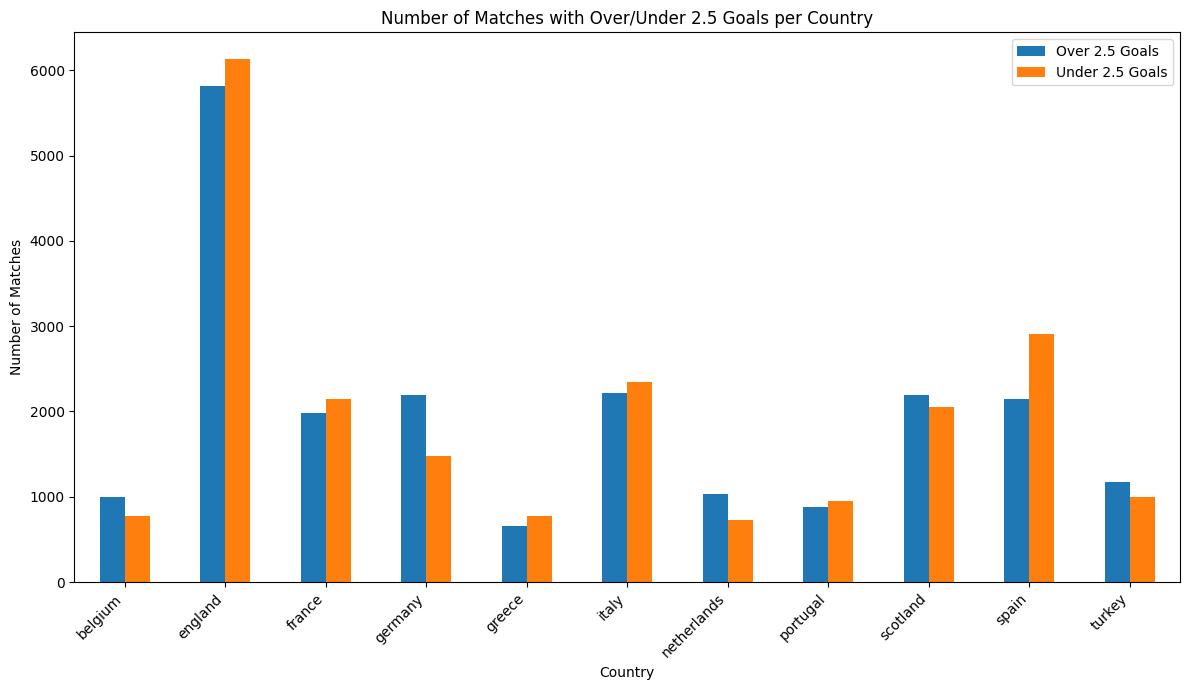

In [44]:
# plots
under2_5_counts = {}
over2_5_counts = {}
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        if 'Over2.5' in globals()[df_name].columns:
            # Counting matches where Over2.5 is 0 (under 2.5 goals)
            under2_5_counts[country] = (globals()[df_name]['Over2.5'] == 0).sum()
            over2_5_counts[country] = (globals()[df_name]['Over2.5'] == 1).sum()
        else:
            print(f"Warning: 'Over2.5' column not found in {df_name}. Skipping.")
    else:
        print(f'Dataset for {country} not found. Skipping.')

# Create a DataFrame from the counts for plotting
plot_data = pd.DataFrame({
    'Over 2.5 Goals': over2_5_counts,
    'Under 2.5 Goals': under2_5_counts
})

# Plotting
plot_data.plot(kind='bar', figsize=(12, 7))
plt.title('Number of Matches with Over/Under 2.5 Goals per Country')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
plot_data

Over 2.5 Goals  Under 2.5 Goals
belgium                 994              780
england                5815             6137
france                 1987             2148
germany                2193             1479
greece                  657              776
italy                  2216             2344
netherlands            1028              734
portugal                885              951
scotland               2192             2055
spain                  2147             2905
turkey                 1178              992

As you can see, in some nations there are many more matches with >2.5 goals scored (e.g. Germany, Belgium, Netherlands, Scotland and Turkey), while in other nations there are many more matches with <2.5 goals scored (e.g. England, France, Greece, Italy, Portugal, Spain).

**Number of matches with >2.5 goals and <2.5 goals in each league**

Secondly, I will visualize a very simple graph containing the number of matches with >2.5 goals and <2.5 goals in each Division

In [46]:
league_goal_counts = {}

for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        if 'Over2.5' in globals()[df_name].columns and 'Div' in globals()[df_name].columns:
            # Group by 'Div' (league) and count occurrences of 1 (Over 2.5) and 0 (Under 2.5)
            league_counts = globals()[df_name].groupby('Div')['Over2.5'].value_counts().unstack(fill_value=0)
            # Rename columns for clarity
            league_counts = league_counts.rename(columns={0: 'Under 2.5 Goals', 1: 'Over 2.5 Goals'})
            league_goal_counts[country] = league_counts
        else:
            print(f"Warning: 'Over2.5' or 'Div' column not found in {df_name}. Skipping.")
    else:
        print(f'Dataset for {country} not found. Skipping.')

# Display the aggregated data for each country
for country, data in league_goal_counts.items():
    print(f'\nGoal counts per league for {country}:')
    display(data)


Goal counts per league for belgium:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
B1                   780             994


Goal counts per league for england:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
E0                  1026            1254
E1                  1779            1533
E2                  1621            1539
E3                  1711            1489


Goal counts per league for france:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
F1                   956            1075
F2                  1192             912


Goal counts per league for germany:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
D1                   719            1117
D2                   760            1076


Goal counts per league for greece:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
G1                   776             657


Goal counts per league for italy:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
I1                  1071            1209
I2                  1273            1007


Goal counts per league for netherlands:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
N1                   734            1028


Goal counts per league for portugal:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
P1                   951             885


Goal counts per league for scotland:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
SC0                  626             693
SC1                  503             489
SC2                  444             525
SC3                  482             485


Goal counts per league for spain:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
SP1                 1230            1050
SP2                 1675            1097


Goal counts per league for turkey:


Over2.5  Under 2.5 Goals  Over 2.5 Goals
Div                                     
T1                   992            1178

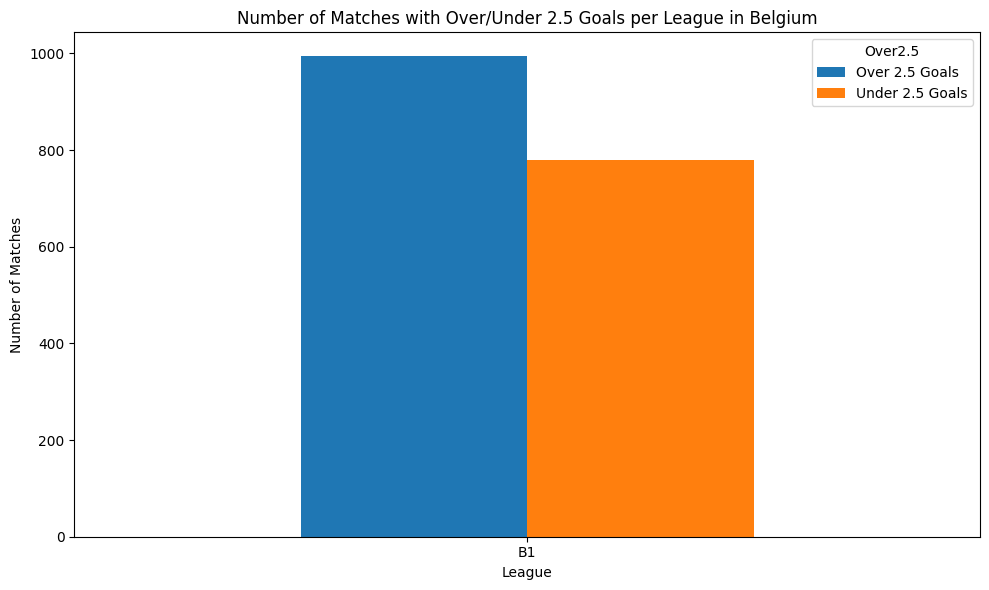

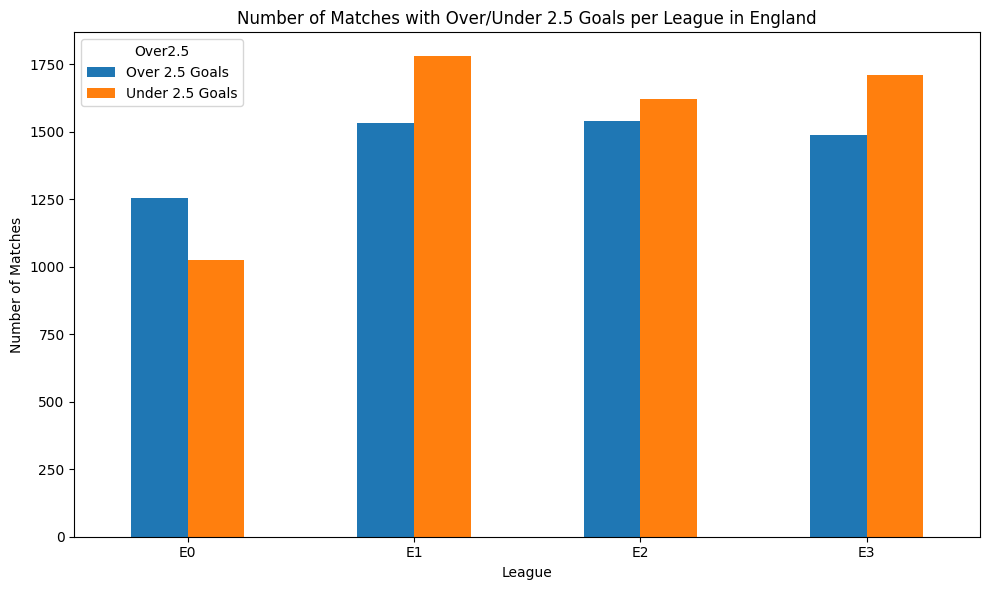

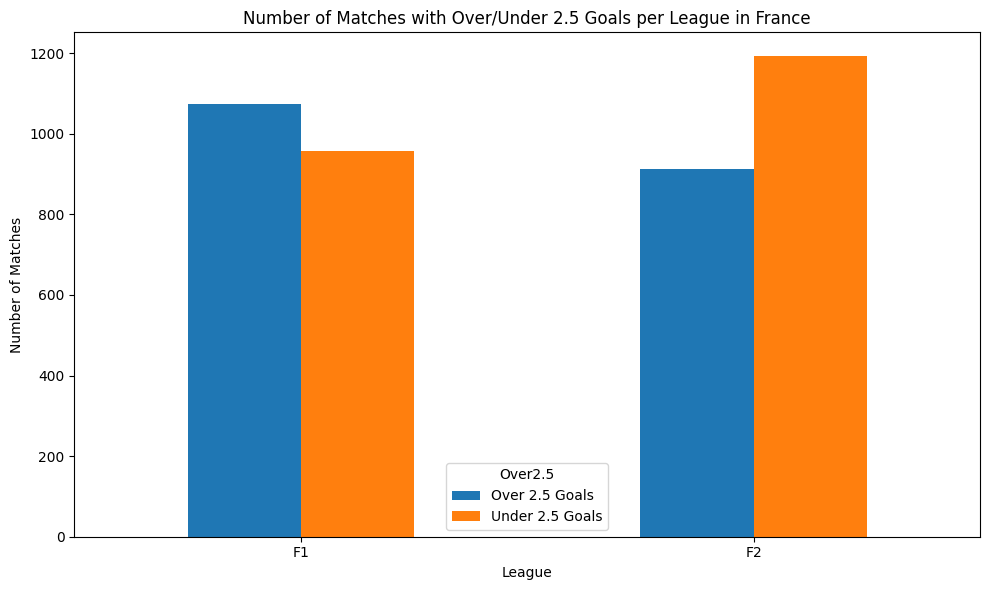

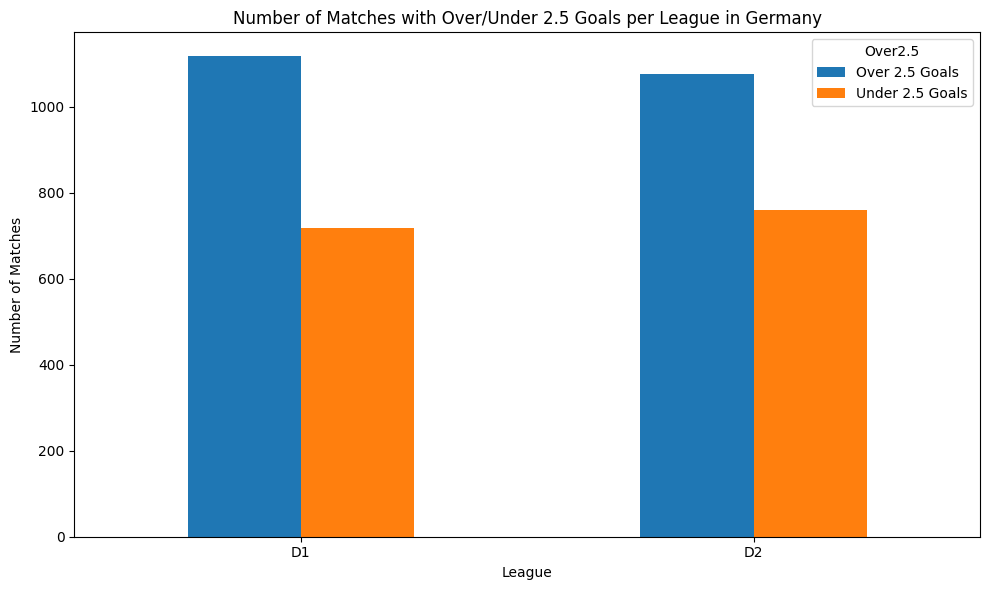

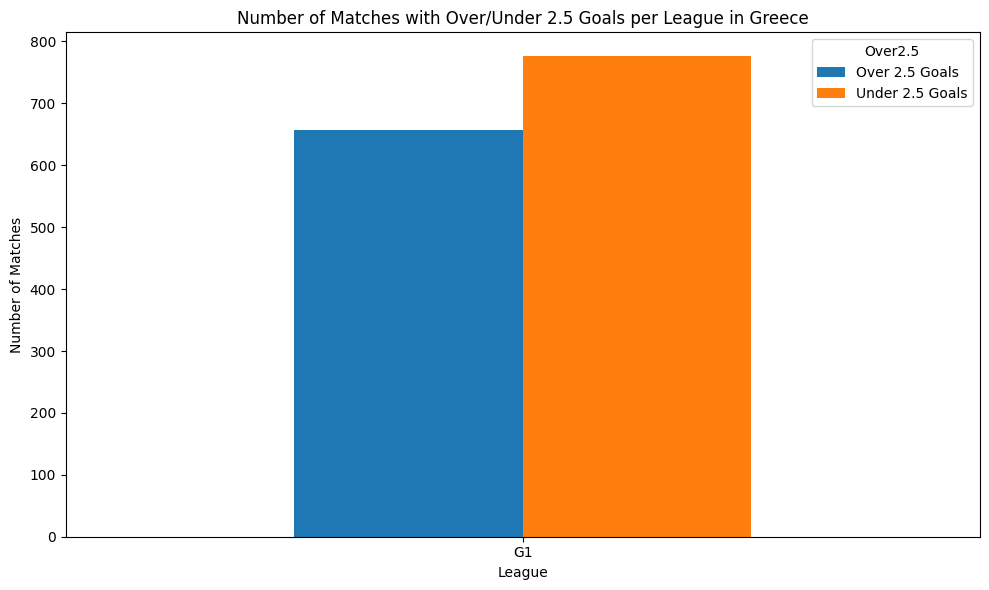

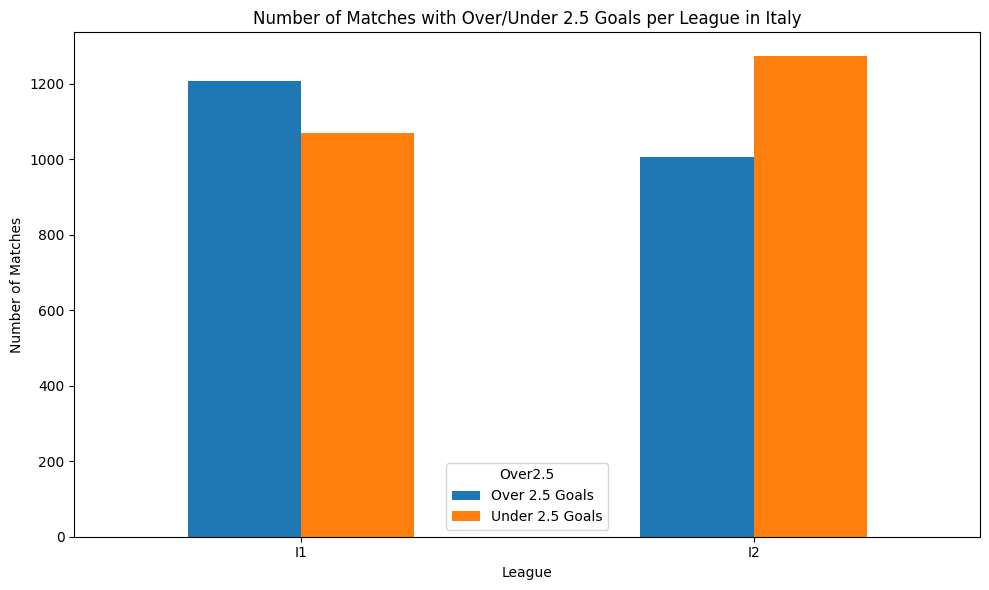

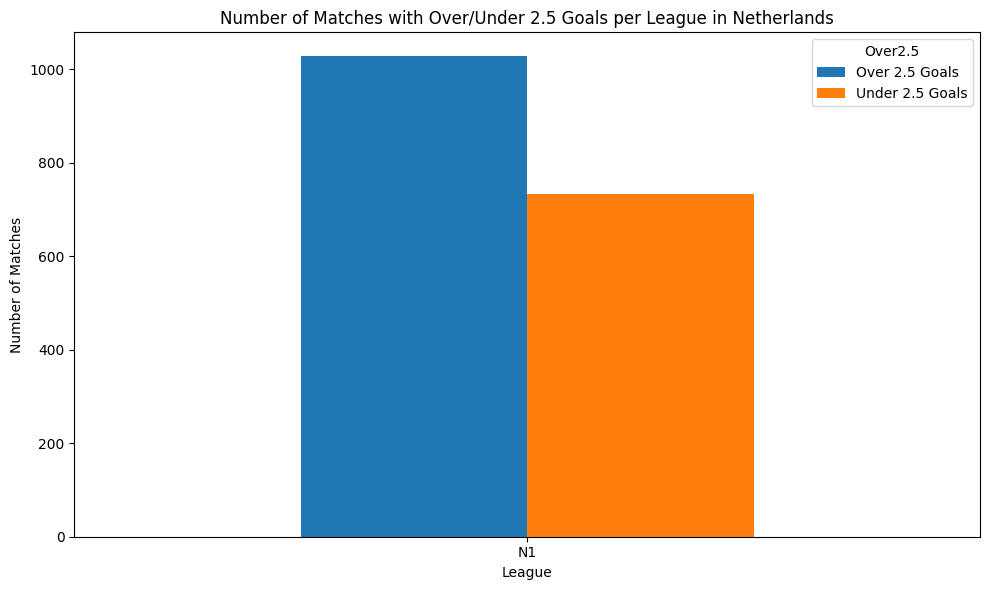

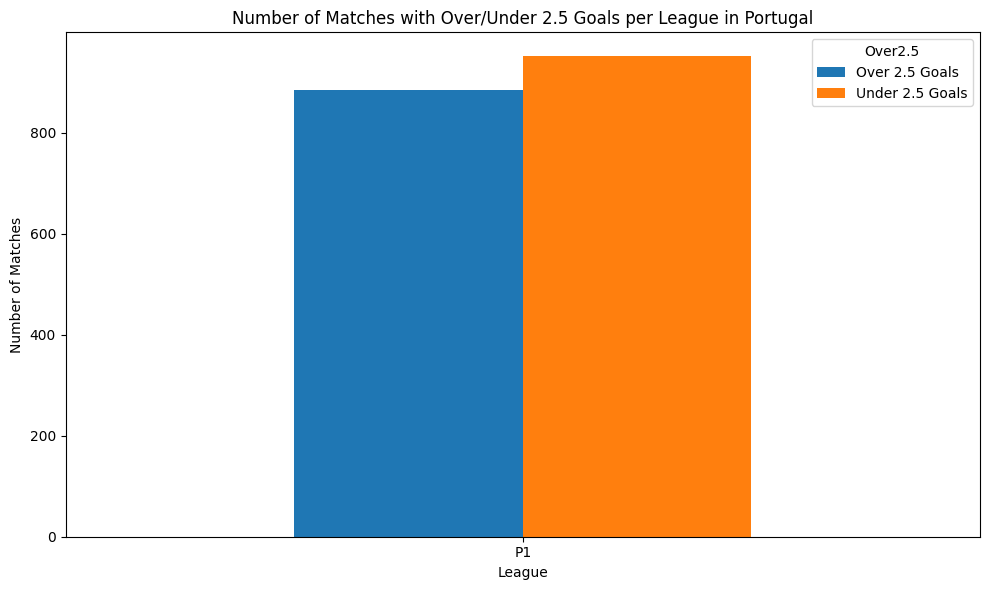

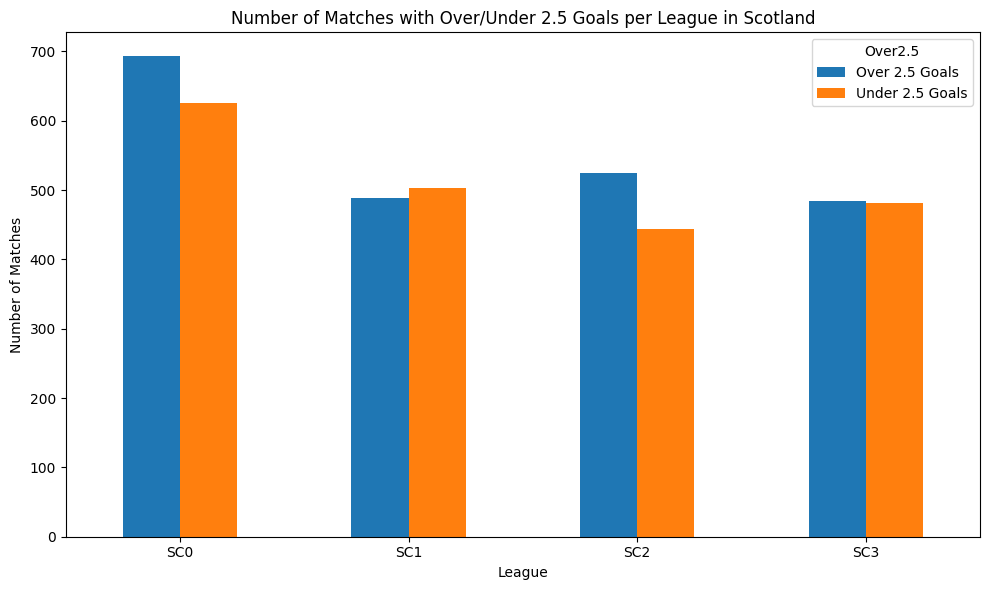

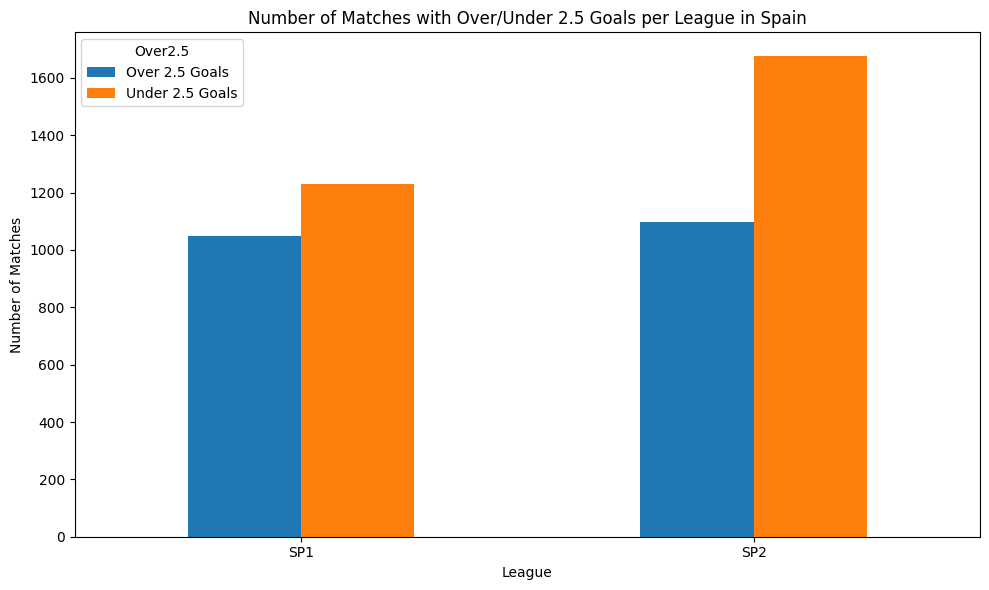

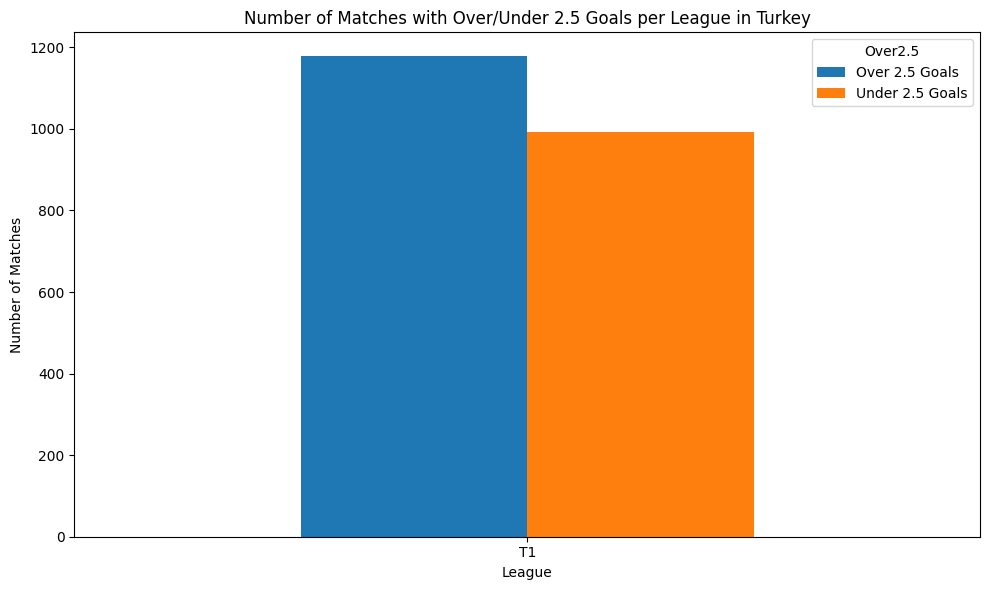

In [47]:
# target variable distribution in leagues
for country, data in league_goal_counts.items():
    if not data.empty:
        plot_order = ['Over 2.5 Goals', 'Under 2.5 Goals']
        data = data[plot_order]

        data.plot(kind='bar', figsize=(10, 6))
        plt.title(f'Number of Matches with Over/Under 2.5 Goals per League in {country.capitalize()}')
        plt.xlabel('League')
        plt.ylabel('Number of Matches')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f'No data to plot for {country}.')

# **2 Data Preprocessing**
This is the main part of this notebook. I will do all the preprocessing task needed (missing values detection and handling, Outlier detection and handling, as well as New variables creation and Encoding)


### **2.1 Merged dataset (buyable dataset)**
First off I will create the merged dataset.

- merging all the datasets into `data_merged` (we can possibly buy)




In [48]:
# merging all the countries
data_merged = pd.concat(globals()[f'data_{country}'] for country in countries)
data_merged

Div        Date   Time          HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0     B1  26/07/2019  19:30              Genk     Kortrijk     2     1   H   
1     B1  27/07/2019  17:00     Cercle Brugge     Standard     0     2   A   
2     B1  27/07/2019  19:00        St Truiden     Mouscron     0     1   A   
3     B1  27/07/2019  19:00           Waregem     Mechelen     0     2   A   
4     B1  27/07/2019  19:30  Waasland-Beveren  Club Brugge     1     3   A   
...   ..         ...    ...               ...          ...   ...   ...  ..   
2165  T1  31/05/2025  14:00          Rizespor    Hatayspor     5     2   H   
2166  T1  31/05/2025  17:00     Ad. Demirspor    Gaziantep     2     2   D   
2167  T1  31/05/2025  17:00        Alanyaspor    Sivasspor     2     0   H   
2168  T1  01/06/2025  17:00        Bodrumspor     Besiktas     0     4   A   
2169  T1  01/06/2025  17:00        Samsunspor  Kayserispor     2     1   H   

      HTHG  HTAG  ...  BFECA  BFEC>2.5  BFEC<2.5  BFECAHH  BFECAHA  \
0      0.0   1.0  ...    NaN       NaN       NaN      NaN      NaN   
1      0.0   0.0  ...    NaN       NaN       NaN      NaN      NaN   
2      0.0   1.0  ...    NaN       NaN       NaN      NaN      NaN   
3      0.0   1.0  ...    NaN       NaN       NaN      NaN      NaN   
4      1.0   1.0  ...    NaN       NaN       NaN      NaN      NaN   
...    ...   ...  ...    ...       ...       ...      ...      ...   
2165   1.0   0.0  ...  10.00      1.20      5.70     1.90     2.02   
2166   2.0   1.0  ...   1.48      1.27      4.40     1.88     2.07   
2167   1.0   0.0  ...   4.00      1.48      3.05     1.91     2.08   
2168   0.0   3.0  ...   1.74      1.62      2.56     2.06     1.91   
2169   0.0   0.0  ...  12.50      1.48      3.00     1.99     1.97   

      Unnamed: 119  Unnamed: 120  Referee  Unnamed: 121  Unnamed: 106  
0              NaN           NaN      NaN           NaN           NaN  
1              NaN           NaN      NaN           NaN           NaN  
2              NaN           NaN      NaN           NaN           NaN  
3              NaN           NaN      NaN           NaN           NaN  
4              NaN           NaN      NaN           NaN           NaN  
...            ...           ...      ...           ...           ...  
2165           NaN           NaN      NaN           NaN           NaN  
2166           NaN           NaN      NaN           NaN           NaN  
2167           NaN           NaN      NaN           NaN           NaN  
2168           NaN           NaN      NaN           NaN           NaN  
2169           NaN           NaN      NaN           NaN           NaN  

[42593 rows x 139 columns]

### **2.2 Missing values - column deletion**

**Missing values in the merged dataset**
- I will show the % of values that are missing in each column for each country + the total for the whole dataset


In [49]:
# seeing what percentage of values are missing from each column in each countries dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_values_by_country = pd.DataFrame()
missing_values_by_country['total'] = round(data_merged.isnull().sum() / len(data_merged) * 100,2)
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        missing_values_by_country[country] = round(globals()[df_name].isnull().sum() / len(globals()[df_name]) * 100,2)
    else:
        print(f'Dataset for {country} not found. Skipping.')

display(missing_values_by_country.sort_values(by= 'total', ascending = False))

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

total  belgium  england  france  germany  greece  italy  \
Unnamed: 121  100.00      NaN      NaN     NaN      NaN     NaN    NaN   
Unnamed: 106  100.00      NaN      NaN     NaN      NaN     NaN    NaN   
Unnamed: 119  100.00   100.00      NaN     NaN      NaN     NaN    NaN   
Unnamed: 105  100.00   100.00      NaN     NaN      NaN     NaN    NaN   
Unnamed: 120  100.00   100.00      NaN     NaN      NaN     NaN    NaN   
BFEAHA         86.17    90.02    83.92   86.00    84.83   91.70  85.79   
BFEAHH         86.17    90.02    83.92   86.00    84.83   91.70  85.79   
BFE<2.5        84.04    83.82    83.17   86.02    83.74   86.04  83.66   
BFE>2.5        84.04    83.82    83.17   86.02    83.74   86.04  83.66   
1XBD           83.67    82.86    83.27   85.63    83.82   84.23  83.77   
1XBH           83.67    82.86    83.27   85.63    83.82   84.23  83.77   
1XBA           83.67    82.86    83.27   85.63    83.82   84.23  83.77   
BFEH           83.38    82.47    82.97   85.22    83.33   85.62  83.42   
BFEA           83.38    82.47    82.97   85.22    83.33   85.62  83.42   
BFED           83.38    82.47    82.97   85.22    83.33   85.62  83.42   
BFH            83.28    82.41    82.97   85.20    83.39   83.81  83.40   
BFD            83.28    82.41    82.97   85.20    83.39   83.81  83.40   
BFA            83.28    82.41    82.97   85.20    83.39   83.81  83.40   
BFECAHA        83.27    82.41    82.97   85.20    83.36   83.74  83.33   
BFECAHH        83.27    82.41    82.97   85.20    83.36   83.74  83.33   
BFCD           83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFEC<2.5       83.26    82.41    82.97   85.20    83.33   83.74  83.33   
1XBCD          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
1XBCA          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFEC>2.5       83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFECD          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFECA          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFCA           83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFCH           83.26    82.41    82.97   85.20    83.33   83.74  83.33   
BFECH          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
1XBCH          83.26    82.41    82.97   85.20    83.33   83.74  83.33   
Referee        61.97      NaN     0.00     NaN      NaN     NaN    NaN   
IWH            25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWD            25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWA            25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWCH           25.47    26.16    24.87   23.56    25.82   25.47  25.46   
IWCD           25.47    26.16    24.87   23.56    25.82   25.47  25.46   
IWCA           25.47    26.16    24.87   23.56    25.82   25.47  25.46   
VCA            17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCD            17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCH            17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCCH           16.90    18.49    17.03   14.87    16.67   16.33  16.80   
VCCD           16.90    18.49    17.03   14.87    16.67   16.33  16.80   
VCCA           16.90    18.49    17.03   14.87    16.67   16.33  16.80   
WHA             7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHH             7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHD             7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHCD            7.17    25.59     3.27    3.31     3.92    3.56   7.89   
WHCA            7.17    25.59     3.27    3.31     3.92    3.56   7.89   
WHCH            7.17    25.59     3.27    3.31     3.92    3.56   7.89   
BWA             7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWD             7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWH             7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWCD            7.0

In [50]:
missing_values_by_country[missing_values_by_country['total']>50].index

Index(['Unnamed: 105', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BFEH',
       'BFED', 'BFEA', 'BFE>2.5', 'BFE<2.5', 'BFEAHH', 'BFEAHA', 'BFCH',
       'BFCD', 'BFCA', '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA',
       'BFEC>2.5', 'BFEC<2.5', 'BFECAHH', 'BFECAHA', 'Unnamed: 119',
       'Unnamed: 120', 'Referee', 'Unnamed: 121', 'Unnamed: 106'],
      dtype='object')

**There are a lot of missing values.**
- First off, I will delete the columns that have above 50% of values missing in all the countries: `Unnamed: 105`, `BFH`, `BFD`, `BFA`, `1XBH`, `1XBD`, `1XBA`, `BFEH`,`BFED`, `BFEA`, `BFE>2.5`, `BFE<2.5`, `BFEAHH`, `BFEAHA`, `BFCH`,`BFCD`, `BFCA`, `1XBCH`, `1XBCD`, `1XBCA`, `BFECH`, `BFECD`, `BFECA`, `BFEC>2.5`, `BFEC<2.5`, `BFECAHH`, `BFECAHA`, `Unnamed: 119`, `Unnamed: 120`, `Unnamed: 121`, `Unnamed: 106` - **these columns are either mistakes in the datasets or BetFair Exchange odds (Betting against other people), which are only possible from the 24/25 season (odds are nearly identical to the average odds across betting companies)**
- There is one unique column `Referee`, which is mostly NaN in the dataset apart from `England` and `Scotland`, where referees are filled into the dataset. This column could be used only in subsets of the dataset (if we want to buy only England and Scotland datasets). Probably inconvenient to leave it in the merged dataset, as it would only cause trouble and add little value, since the referee does not really have a big impact on the number of goals scored.



In [51]:
# deleting the columns not needed (too many missing values or mistakes)
data_merged = data_merged.drop(columns=['Unnamed: 105', 'BFH', 'BFD', 'BFA', '1XBH', '1XBD', '1XBA', 'BFEH',
       'BFED', 'BFEA', 'BFE>2.5', 'BFE<2.5', 'BFEAHH', 'BFEAHA', 'BFCH',
       'BFCD', 'BFCA', '1XBCH', '1XBCD', '1XBCA', 'BFECH', 'BFECD', 'BFECA',
       'BFEC>2.5', 'BFEC<2.5', 'BFECAHH', 'BFECAHA', 'Unnamed: 119',
       'Unnamed: 120', 'Referee', 'Unnamed: 121', 'Unnamed: 106', 'Referee'])
data_merged

Div        Date   Time          HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0     B1  26/07/2019  19:30              Genk     Kortrijk     2     1   H   
1     B1  27/07/2019  17:00     Cercle Brugge     Standard     0     2   A   
2     B1  27/07/2019  19:00        St Truiden     Mouscron     0     1   A   
3     B1  27/07/2019  19:00           Waregem     Mechelen     0     2   A   
4     B1  27/07/2019  19:30  Waasland-Beveren  Club Brugge     1     3   A   
...   ..         ...    ...               ...          ...   ...   ...  ..   
2165  T1  31/05/2025  14:00          Rizespor    Hatayspor     5     2   H   
2166  T1  31/05/2025  17:00     Ad. Demirspor    Gaziantep     2     2   D   
2167  T1  31/05/2025  17:00        Alanyaspor    Sivasspor     2     0   H   
2168  T1  01/06/2025  17:00        Bodrumspor     Besiktas     0     4   A   
2169  T1  01/06/2025  17:00        Samsunspor  Kayserispor     2     1   H   

      HTHG  HTAG  ... B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  MaxCAHA  \
0      0.0   1.0  ...     1.98      1.88   2.01   1.88     2.05     1.96   
1      0.0   0.0  ...     1.88      1.98   1.91   1.99     1.95     2.02   
2      0.0   1.0  ...     1.83      2.02   1.87   2.03     1.88     2.07   
3      0.0   1.0  ...     1.72      2.07   1.75   2.17     1.80     2.28   
4      1.0   1.0  ...     2.20      1.70   2.19   1.74     2.25     1.83   
...    ...   ...  ...      ...       ...    ...    ...      ...      ...   
2165   1.0   0.0  ...     1.78      2.03   1.83   2.02     1.98     2.06   
2166   2.0   1.0  ...     1.85      1.95   1.83   1.99     1.85     2.10   
2167   1.0   0.0  ...     1.78      2.03   1.83   2.02     1.90     2.04   
2168   0.0   3.0  ...     2.10      1.70   1.99   1.85     2.10     1.91   
2169   0.0   0.0  ...     1.93      1.88   1.89   1.94     2.03     1.95   

      AvgCAHH  AvgCAHA  Season  Over2.5  
0        1.96     1.87    1920        1  
1        1.89     1.94    1920        0  
2        1.83     2.02    1920        0  
3        1.72     2.15    1920        0  
4        2.11     1.74    1920        1  
...       ...      ...     ...      ...  
2165     1.86     1.97    2425        1  
2166     1.81     2.01    2425        1  
2167     1.85     1.99    2425        0  
2168     2.01     1.82    2425        1  
2169     1.93     1.90    2425        1  

[42593 rows x 107 columns]



---



**We are left with some columns that still have a large share of missing values.**
- After a brief look at the columns with more than 5% of values missing I came to the conclustion, that these are also not needed in the dataset. Most of the columns are each companies odds to a number of possible bets or Maximum value of each bet `Max`. I will only use the Averages `Avg` of these odds. I will therefore delete all of the company-based odds.

In [52]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_values_by_country = pd.DataFrame()
missing_values_by_country['total'] = round(data_merged.isnull().sum() / len(data_merged) * 100,2)
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        missing_values_by_country[country] = round(globals()[df_name].isnull().sum() / len(globals()[df_name]) * 100,2)
    else:
        print(f'Dataset for {country} not found. Skipping.')

display(missing_values_by_country.sort_values(by= 'total', ascending = False))

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

total  belgium  england  france  germany  greece  italy  \
IWD        25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWA        25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWH        25.51    26.16    25.18   23.24    25.30   25.26  25.75   
IWCH       25.47    26.16    24.87   23.56    25.82   25.47  25.46   
IWCD       25.47    26.16    24.87   23.56    25.82   25.47  25.46   
IWCA       25.47    26.16    24.87   23.56    25.82   25.47  25.46   
VCH        17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCD        17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCA        17.31    19.11    17.09   16.59    16.69   18.56  17.00   
VCCD       16.90    18.49    17.03   14.87    16.67   16.33  16.80   
VCCA       16.90    18.49    17.03   14.87    16.67   16.33  16.80   
VCCH       16.90    18.49    17.03   14.87    16.67   16.33  16.80   
WHD         7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHH         7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHA         7.40    25.31     3.36    3.41     3.98    5.02   8.60   
WHCD        7.17    25.59     3.27    3.31     3.92    3.56   7.89   
WHCH        7.17    25.59     3.27    3.31     3.92    3.56   7.89   
WHCA        7.17    25.59     3.27    3.31     3.92    3.56   7.89   
BWH         7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWD         7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWA         7.09     6.65     6.49    6.09     6.92    6.28   6.82   
BWCD        7.03     6.88     6.69    5.95     6.89    6.28   6.54   
BWCA        7.03     6.88     6.69    5.95     6.89    6.28   6.54   
BWCH        7.03     6.88     6.69    5.95     6.89    6.28   6.54   
B365AHH     0.77     0.45     0.29    0.39     0.14    5.93   0.72   
B365AHA     0.77     0.45     0.29    0.39     0.14    5.93   0.72   
P>2.5       0.67     0.28     0.36    0.44     1.44    2.65   0.55   
P<2.5       0.67     0.28     0.36    0.44     1.44    2.65   0.55   
PAHH        0.47     0.28     0.25    0.29     0.22    2.72   0.55   
PAHA        0.47     0.28     0.25    0.29     0.22    2.72   0.55   
PSH         0.46     0.28     0.25    0.27     0.16    2.65   0.53   
PSD         0.46     0.28     0.25    0.27     0.16    2.65   0.53   
PSA         0.46     0.28     0.25    0.27     0.16    2.65   0.53   
B365>2.5    0.31     0.17     0.08    0.44     0.11    0.70   0.44   
B365<2.5    0.31     0.17     0.08    0.44     0.11    0.70   0.44   
PC>2.5      0.30     0.00     0.19    0.10     1.17    0.00   0.15   
PC<2.5      0.30     0.00     0.19    0.10     1.17    0.00   0.15   
B365H       0.28     0.17     0.07    0.27     0.08    0.63   0.42   
B365A       0.28     0.17     0.07    0.27     0.08    0.63   0.42   
B365D       0.28     0.17     0.07    0.27     0.08    0.63   0.42   
B365CAHH    0.21     0.00     0.08    0.02     0.00    0.77   0.20   
B365CAHA    0.21     0.00     0.08    0.02     0.00    0.77   0.20   
B365C>2.5   0.15     0.00     0.00    0.07     0.00    0.00   0.20   
AHh         0.15     0.00     0.05    0.00     0.00    0.07   0.29   
B365C<2.5   0.15     0.00     0.00    0.07     0.00    0.00   0.20   
B365CH      0.14     0.00     0.00    0.02     0.00    0.00   0.18   
B365CA      0.14     0.00     0.00    0.02     0.00    0.00   0.18   
B365CD      0.14     0.00     0.00    0.02     0.00    0.00   0.18   
PCAHA       0.13     0.00     0.11    0.00     0.00    0.00   0.15   
PCAHH       0.13     0.00     0.11    0.00     0.00    0.00   0.15   
PSCD        0.12     0.00     0.10    0.00     0.00    0.00   0.15   
PSCA        0.12     0.00     0.10    0.00     0.00    0.00   0.15   
PSCH        0.12     0.00     0.10    0.00     0.00    0.00   0.15   
MaxA        0.11     0.00     0.05    0.00     0.00    0.07   0.22   
AvgAHA      0.11     0.00     0.05    0.00     0.00    0.07   0.24   
AvgAHH      0.11     0.00     0.05    0.00     0.00    0.07   0.24   
MaxAHA      0.11     

In [53]:
missing_values_by_country[missing_values_by_country['total'] > 5].index

# deleting the columns not needed (too many missing values)
data_merged = data_merged.drop(columns=['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'VCH',
       'VCD', 'VCA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'WHCH',
       'WHCD', 'WHCA', 'VCCH', 'VCCD', 'VCCA',

       'B365H', 'B365D', 'B365A', 'PSH', 'PSD', 'PSA', 'B365>2.5', 'B365<2.5',
       'P>2.5', 'P<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'B365CH',
       'B365CD', 'B365CA', 'PSCH', 'PSCD', 'PSCA', 'B365C>2.5', 'B365C<2.5',
       'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA',

       'MaxH', 'MaxD', 'MaxA', 'Max>2.5','Max<2.5', 'MaxAHH', 'MaxAHA', 'MaxCH', 'MaxCD',
       'MaxCA', 'MaxC>2.5', 'MaxC<2.5', 'MaxCAHH', 'MaxCAHA'])

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

missing_values_by_country = pd.DataFrame()
missing_values_by_country['total'] = round(data_merged.isnull().sum() / len(data_merged) * 100,2)
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        missing_values_by_country[country] = round(globals()[df_name].isnull().sum() / len(globals()[df_name]) * 100,2)
    else:
        print(f'Dataset for {country} not found. Skipping.')

display(missing_values_by_country.sort_values(by= 'total', ascending = False))

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


total  belgium  england  france  germany  greece  italy  \
AHh        0.15     0.00     0.05    0.00     0.00    0.07   0.29   
AvgH       0.11     0.00     0.05    0.00     0.00    0.07   0.22   
AvgA       0.11     0.00     0.05    0.00     0.00    0.07   0.22   
Avg>2.5    0.11     0.00     0.05    0.00     0.00    0.07   0.24   
Avg<2.5    0.11     0.00     0.05    0.00     0.00    0.07   0.24   
AF         0.11     0.34     0.00    0.05     0.03    0.07   0.02   
AvgD       0.11     0.00     0.05    0.00     0.00    0.07   0.22   
HF         0.11     0.34     0.00    0.05     0.03    0.07   0.02   
AvgAHA     0.11     0.00     0.05    0.00     0.00    0.07   0.24   
AvgAHH     0.11     0.00     0.05    0.00     0.00    0.07   0.24   
HR         0.10     0.28     0.00    0.05     0.03    0.07   0.02   
HY         0.10     0.28     0.00    0.05     0.03    0.07   0.02   
AY         0.10     0.28     0.00    0.05     0.03    0.07   0.02   
AC         0.10     0.34     0.00    0.05     0.03    0.07   0.02   
HC         0.10     0.34     0.00    0.05     0.03    0.07   0.02   
HTAG       0.10     0.28     0.00    0.05     0.03    0.07   0.02   
HTR        0.10     0.28     0.00    0.05     0.03    0.07   0.02   
HTHG       0.10     0.28     0.00    0.05     0.03    0.07   0.02   
AR         0.10     0.28     0.00    0.05     0.03    0.07   0.02   
HST        0.10     0.34     0.00    0.05     0.03    0.07   0.02   
AST        0.10     0.34     0.00    0.05     0.03    0.07   0.02   
AS         0.10     0.34     0.00    0.05     0.03    0.07   0.02   
HS         0.10     0.34     0.00    0.05     0.03    0.07   0.02   
AvgCH      0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgCD      0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgCA      0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgC>2.5   0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgC<2.5   0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AHCh       0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgCAHH    0.08     0.00     0.00    0.00     0.00    0.00   0.07   
AvgCAHA    0.08     0.00     0.00    0.00     0.00    0.00   0.07   
Date       0.00     0.00     0.00    0.00     0.00    0.00   0.00   
Div        0.00     0.00     0.00    0.00     0.00    0.00   0.00   
FTR        0.00     0.00     0.00    0.00     0.00    0.00   0.00   
FTAG       0.00     0.00     0.00    0.00     0.00    0.00   0.00   
FTHG       0.00     0.00     0.00    0.00     0.00    0.00   0.00   
AwayTeam   0.00     0.00     0.00    0.00     0.00    0.00   0.00   
Time       0.00     0.00     0.00    0.00     0.00    0.00   0.00   
HomeTeam   0.00     0.00     0.00    0.00     0.00    0.00   0.00   
Season     0.00     0.00     0.00    0.00     0.00    0.00   0.00   
Over2.5    0.00     0.00     0.00    0.00     0.00    0.00   0.00   

          netherlands  portugal  scotland  spain  turkey  
AHh               0.0       0.0      0.38   0.02    1.34  
AvgH              0.0       0.0      0.00   0.00    1.34  
AvgA              0.0       0.0      0.00   0.00    1.34  
Avg>2.5           0.0       0.0      0.00   0.00    1.34  
Avg<2.5           0.0       0.0      0.00   0.00    1.34  
AF                0.0       0.0      0.09   0.00    1.43  
AvgD              0.0       0.0      0.00   0.00    1.34  
HF                0.0       0.0      0.09   0.00    1.43  
AvgAHA            0.0       0.0      0.00   0.00    1.34  
AvgAHH            0.0       0.0      0.00   0.00    1.34  
HR                0.0       0.0      0.00   0.00    1.43  
HY                0.0       0.0      0.00   0.00    1.43  
AY                0.0       0.0      0.00   0.00    1.43  
AC                0.0       0.0      0.05   0.00    1.43  
HC                0.0       0.0      0.05   0.00    1.43  
HTAG              0.0       0.0      0.00   0.00    1.43  
HTR               0.0       0.0      0.00   0.00    1.43  
HTHG              0.0       0.0      0.00   0.00 

**I cleaned all the columns not needed for our machine learning task in the future. Now I need to fill missing values.**

### **2.3 Missing values - imputation/deletion of rows**
**Now I will fill in missing values in the columns where needed.**
- I will first look at possible problematic rows.
- After the deletion, I will look at what values are missing and come up with the value computation tactic.

In [54]:
# Missing values
missing_values = data_merged.isnull().sum()

# Sort missing values in descending order and display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(missing_values.sort_values(ascending=False))
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

AHh         66
Avg<2.5     47
Avg>2.5     47
AvgAHH      47
AvgAHA      47
AF          46
AvgD        46
HF          46
AvgA        46
AvgH        46
AST         44
HC          44
AC          44
AS          44
HST         44
HS          44
HR          41
HTHG        41
AR          41
HY          41
AY          41
HTAG        41
HTR         41
AHCh        33
AvgCH       32
AvgCD       32
AvgCA       32
AvgC>2.5    32
AvgC<2.5    32
AvgCAHH     32
AvgCAHA     32
Date         0
Div          0
FTR          0
FTAG         0
FTHG         0
AwayTeam     0
Time         0
HomeTeam     0
Season       0
Over2.5      0
dtype: int64

**I will be using the Avg>2.5 to look at what rows have missing data first, because it is very important for our task.**

In [55]:
# Showing the values where Avg>2.5 is null
pd.set_option('display.max_columns', None)

display(data_merged[data_merged['Avg>2.5'].isnull()].sort_values(by= 'Season'))

pd.reset_option('display.max_columns')

# there is a small problem in the turkish league, where some rows have all missing values even for the base variables --> we will need to delete those

Div        Date   Time       HomeTeam      AwayTeam  FTHG  FTAG FTR  \
5649   E2  31/08/2019  15:00     Gillingham        Bolton     5     0   H   
2646   I2  27/07/2020  20:00        Pescara       Livorno     1     0   H   
2630   I2  24/07/2020  17:45        Livorno       Crotone     1     5   A   
2621   I2  17/07/2020  20:00      Benevento       Livorno     3     1   H   
2615   I2  13/07/2020  20:00        Livorno        Spezia     0     1   A   
2597   I2  03/07/2020  20:00        Trapani       Livorno     2     1   H   
2655   I2  31/07/2020  20:00        Livorno        Empoli     0     2   A   
9043   E3  01/01/2020  15:00      Port Vale  Macclesfield     2     2   D   
9014   E3  26/12/2019  15:00   Macclesfield       Grimsby     1     1   D   
8997   E3  14/12/2019  15:00        Walsall  Macclesfield     1     1   D   
8955   E3  16/11/2019  15:00   Macclesfield     Mansfield     0     0   D   
417    I1  19/10/2020  19:45         Verona         Genoa     0     0   D   
2710   I2  31/10/2020  15:00    Salernitana      Reggiana     3     0   H   
3031   I2  10/05/2021  13:00     Cittadella       Venezia     1     1   D   
476    G1  16/05/2021  17:30         Larisa      Giannina     2     0   H   
963    I1  10/01/2022  16:00         Torino    Fiorentina     4     0   H   
1391   T1  30/04/2023  18:00     Buyuksehyr     Hatayspor     3     0   H   
1392   T1  30/04/2023  18:00    Kayserispor     Gaziantep     3     0   H   
1399   T1  07/05/2023  18:00      Gaziantep    Karagumruk     0     3   A   
1400   T1  07/05/2023  18:00      Hatayspor  Istanbulspor     0     3   A   
1408   T1  17/05/2023  18:00       Besiktas     Gaziantep     3     0   H   
1409   T1  17/05/2023  18:00    Giresunspor     Hatayspor     3     0   H   
1426   T1  30/05/2023  18:00      Hatayspor  Umraniyespor     0     3   A   
1419   T1  21/05/2023  18:00      Hatayspor    Fenerbahce     0     3   A   
1423   T1  30/05/2023  18:00     Buyuksehyr     Gaziantep     3     0   H   
1432   T1  03/06/2023  17:00    Antalyaspor     Hatayspor     3     0   H   
1381   T1  23/04/2023  18:00      Hatayspor    Ankaragucu     0     3   A   
1433   T1  03/06/2023  17:00      Gaziantep  Istanbulspor     0     3   A   
1418   T1  21/05/2023  18:00      Gaziantep   Giresunspor     0     3   A   
1380   T1  23/04/2023  18:00      Gaziantep    Alanyaspor     0     3   A   
1339   T1  19/03/2023  18:00    Kayserispor     Hatayspor     3     0   H   
1365   T1  16/04/2023  18:00      Hatayspor    Karagumruk     0     3   A   
1364   T1  16/04/2023  18:00      Gaziantep     Konyaspor     0     3   A   
1354   T1  09/04/2023  18:00     Alanyaspor     Hatayspor     3     0   H   
1353   T1  09/04/2023  18:00  Ad. Demirspor     Gaziantep     3     0   H   
1346   T1  02/04/2023  18:00      Hatayspor     Sivasspor     0     3   A   
1345   T1  02/04/2023  18:00      Gaziantep     Kasimpasa     0     3   A   
1444   T1  07/06/2023  18:00     Fenerbahce     Gaziantep     3     0   H   
1338   T1  19/03/2023  18:00      Gaziantep   Trabzonspor     0     3   A   
1327   T1  12/03/2023  10:30      Hatayspor     Konyaspor     0     3   A   
1319   T1  05/03/2023  13:00      Gaziantep   Galatasaray     0     3   A   
1318   T1  05/03/2023  13:00  Ad. Demirspor     Hatayspor     3     0   H   
1309   T1  25/02/2023  13:00   Umraniyespor     Gaziantep     3     0   H   
10496  E3  08/11/2022  19:45      Mansfield      Bradford     1     2   A   
1371   T1  19/04/2023  18:00       Besiktas     Hatayspor     3     0   H   
1446   T1  07/06/2023  18:00      Hatayspor   Galatasaray     0     3   A   
3830   I2  03/09/2023  17:30          Lecco     Catanzaro     3     4   A   

       HTHG  HTAG  HTR    HS    AS   HST   AST    HF    AF    HC   AC   HY  \
5649    2.0   0.0    H  30.0   4.0  10.0   1.0  11.0  13.0   7.0  1.0  1.0   
2646    0.0   0.0    D  12.0   4.0   4.0   1.0  14.0  10.0   5.0  3.0  7.0   
2630    1.0   3.0    A   6.0  22.0   3.0  10.0  16.0   9.0   2.0  4.0  1.0 

**There are multiple types of reasons the rows have missing values.**
- 1) `Hatyaspor` and `Gaziantep` forfeited a couple of games in the 22/23 season, due to a devastating earthquake happening near the cities. There is also 1 instance of a match being forfeited by `Reggiana` in the 2nd Italian division in the 20/21 season. - **These rows will be deleted, since they do not add any value.**
- 2) A few of games played in the 19/20 and 20/21 season and 1 each in the 22/23 and 23/24 seasons have missing pre-closing odds, but have closing odds available. - **I will replace the missing pre-closing odds with the closing odds.**
- 3) There are 2 instances of matches in the Italian 2nd division, that have some match statistics available (not forfeited matches), but have betting odds all missing. - **These will be deleted, since it is just 2 rows and they add little to none value and difference.**
- 4) There are a few more forfeited matches where the odds are available, possibly because the match was forfeited right before the game, or during the game. Not visible in this, because the odds for Avg>2.5 are available, **I will delete those, they are not needed**
- 5) There are 3 rows, where some match statistics are missing (such as shots for both teams...). **I will delete those, they are not significant**



In [56]:
# Fill missing 'Avg' columns with corresponding 'AvgC' columns
avg_cols = ['AvgH', 'AvgD', 'AvgA', 'Avg>2.5', 'Avg<2.5', 'AvgAHH', 'AvgAHA', 'AHh', 'AHCh']
avgc_cols = ['AvgCH', 'AvgCD', 'AvgCA', 'AvgC>2.5', 'AvgC<2.5', 'AvgCAHH', 'AvgCAHA', 'AHCh', 'AHh']

for avg_col, avgc_col in zip(avg_cols, avgc_cols):
    data_merged[avg_col].fillna(data_merged[avgc_col], inplace=True)

# Verify the number of missing values after filling
missing_values = data_merged.isnull().sum()
display(missing_values.sort_values(ascending=False).head())

/tmp/ipython-input-3545911425.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_merged[avg_col].fillna(data_merged[avgc_col], inplace=True)


HF     46
AF     46
AC     44
HC     44
AST    44
dtype: int64

In [57]:
# Showing the values where Avg>2.5 is null
pd.set_option('display.max_columns', None)

display(data_merged[data_merged['Avg>2.5'].isnull()].sort_values(by= 'Season'))

pd.reset_option('display.max_columns')

# Missing values
missing_values = data_merged.isnull().sum()

# Sort missing values in descending order and display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(missing_values.sort_values(ascending=False).head())
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Div        Date   Time       HomeTeam      AwayTeam  FTHG  FTAG FTR  \
2597  I2  03/07/2020  20:00        Trapani       Livorno     2     1   H   
2655  I2  31/07/2020  20:00        Livorno        Empoli     0     2   A   
2710  I2  31/10/2020  15:00    Salernitana      Reggiana     3     0   H   
1433  T1  03/06/2023  17:00      Gaziantep  Istanbulspor     0     3   A   
1432  T1  03/06/2023  17:00    Antalyaspor     Hatayspor     3     0   H   
1426  T1  30/05/2023  18:00      Hatayspor  Umraniyespor     0     3   A   
1423  T1  30/05/2023  18:00     Buyuksehyr     Gaziantep     3     0   H   
1419  T1  21/05/2023  18:00      Hatayspor    Fenerbahce     0     3   A   
1418  T1  21/05/2023  18:00      Gaziantep   Giresunspor     0     3   A   
1409  T1  17/05/2023  18:00    Giresunspor     Hatayspor     3     0   H   
1408  T1  17/05/2023  18:00       Besiktas     Gaziantep     3     0   H   
1400  T1  07/05/2023  18:00      Hatayspor  Istanbulspor     0     3   A   
1399  T1  07/05/2023  18:00      Gaziantep    Karagumruk     0     3   A   
1392  T1  30/04/2023  18:00    Kayserispor     Gaziantep     3     0   H   
1391  T1  30/04/2023  18:00     Buyuksehyr     Hatayspor     3     0   H   
1381  T1  23/04/2023  18:00      Hatayspor    Ankaragucu     0     3   A   
1371  T1  19/04/2023  18:00       Besiktas     Hatayspor     3     0   H   
1444  T1  07/06/2023  18:00     Fenerbahce     Gaziantep     3     0   H   
1365  T1  16/04/2023  18:00      Hatayspor    Karagumruk     0     3   A   
1364  T1  16/04/2023  18:00      Gaziantep     Konyaspor     0     3   A   
1354  T1  09/04/2023  18:00     Alanyaspor     Hatayspor     3     0   H   
1353  T1  09/04/2023  18:00  Ad. Demirspor     Gaziantep     3     0   H   
1346  T1  02/04/2023  18:00      Hatayspor     Sivasspor     0     3   A   
1345  T1  02/04/2023  18:00      Gaziantep     Kasimpasa     0     3   A   
1339  T1  19/03/2023  18:00    Kayserispor     Hatayspor     3     0   H   
1338  T1  19/03/2023  18:00      Gaziantep   Trabzonspor     0     3   A   
1327  T1  12/03/2023  10:30      Hatayspor     Konyaspor     0     3   A   
1319  T1  05/03/2023  13:00      Gaziantep   Galatasaray     0     3   A   
1318  T1  05/03/2023  13:00  Ad. Demirspor     Hatayspor     3     0   H   
1309  T1  25/02/2023  13:00   Umraniyespor     Gaziantep     3     0   H   
1380  T1  23/04/2023  18:00      Gaziantep    Alanyaspor     0     3   A   
1446  T1  07/06/2023  18:00      Hatayspor   Galatasaray     0     3   A   

      HTHG  HTAG  HTR    HS    AS  HST  AST    HF    AF   HC   AC   HY   AY  \
2597   0.0   0.0    D  20.0   6.0  6.0  2.0  19.0  21.0  4.0  0.0  3.0  5.0   
2655   0.0   1.0    A  14.0  20.0  5.0  6.0   7.0   6.0  4.0  9.0  2.0  1.0   
2710   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1433   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1432   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1426   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1423   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1419   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1418   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1409   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1408   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1400   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1399   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1392   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1391   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1381   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1371   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  NaN   
1444   NaN   NaN  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN  NaN  Na

HF     46
AF     46
AC     44
HC     44
AST    44
dtype: int64

In [58]:
# Impute missing HF and AF values with the median
data_merged['HF'].fillna(data_merged['HF'].median(), inplace=True)
data_merged['AF'].fillna(data_merged['AF'].median(), inplace=True)

# Verify the number of missing values after imputation
missing_values = data_merged.isnull().sum()
display(missing_values[missing_values > 0].sort_values(ascending=False))

/tmp/ipython-input-2505404595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_merged['HF'].fillna(data_merged['HF'].median(), inplace=True)
/tmp/ipython-input-2505404595.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

AS          44
HS          44
HC          44
AST         44
HST         44
AC          44
HTAG        41
HTHG        41
HTR         41
HY          41
AY          41
HR          41
AR          41
AvgH        32
AvgD        32
AvgA        32
Avg>2.5     32
Avg<2.5     32
AHh         32
AvgAHH      32
AvgAHA      32
AvgCH       32
AvgCD       32
AvgCA       32
AvgC>2.5    32
AvgC<2.5    32
AHCh        32
AvgCAHH     32
AvgCAHA     32
dtype: int64

In [59]:
# Filter out rows where Avg>2.5 is null or HST is null
data_merged = data_merged[data_merged['Avg>2.5'].notnull() & data_merged['HST'].notnull()].copy()


# Showing the values where Avg>2.5 is null
pd.set_option('display.max_columns', None)

display(data_merged[data_merged['Avg>2.5'].isnull()].sort_values(by= 'Season'))

pd.reset_option('display.max_columns')

# there is a small problem in the turkish league, where some rows have all missing values even for the base variables --> we will need to delete those

Empty DataFrame
Columns: [Div, Date, Time, HomeTeam, AwayTeam, FTHG, FTAG, FTR, HTHG, HTAG, HTR, HS, AS, HST, AST, HF, AF, HC, AC, HY, AY, HR, AR, AvgH, AvgD, AvgA, Avg>2.5, Avg<2.5, AHh, AvgAHH, AvgAHA, AvgCH, AvgCD, AvgCA, AvgC>2.5, AvgC<2.5, AHCh, AvgCAHH, AvgCAHA, Season, Over2.5]
Index: []

**Now there should be no missing values in the dataset. I will do a last check.**

In [60]:
data_merged.isna().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
AvgH        0
AvgD        0
AvgA        0
Avg>2.5     0
Avg<2.5     0
AHh         0
AvgAHH      0
AvgAHA      0
AvgCH       0
AvgCD       0
AvgCA       0
AvgC>2.5    0
AvgC<2.5    0
AHCh        0
AvgCAHH     0
AvgCAHA     0
Season      0
Over2.5     0
dtype: int64

As I presumed, there are no missing values left in the data.



---



### **2.4 Checking outliers and correct values**
- I will check possible outliers in the dataset
- I will check the correctness of values (there should always be more or equally as many HS as HST)

In [61]:
# Checking outliers (describe)
pd.set_option('display.max_columns', None)
display(data_merged.describe())
pd.reset_option('display.max_columns')

FTHG          FTAG          HTHG          HTAG            HS  \
count  42547.000000  42547.000000  42547.000000  42547.000000  42547.000000   
mean       1.468470      1.197875      0.657508      0.532211     12.920958   
std        1.256342      1.138662      0.818756      0.741593      5.178774   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      0.000000      9.000000   
50%        1.000000      1.000000      0.000000      0.000000     12.000000   
75%        2.000000      2.000000      1.000000      1.000000     16.000000   
max        9.000000     13.000000      7.000000      7.000000     46.000000   

                 AS           HST           AST            HF            AF  \
count  42547.000000  42547.000000  42547.000000  42547.000000  42547.000000   
mean      10.861377      4.583190      3.843890     12.276048     12.523327   
std        4.668970      2.499407      2.275852      4.096038      4.118696   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000      3.000000      2.000000      9.000000     10.000000   
50%       10.000000      4.000000      4.000000     12.000000     12.000000   
75%       14.000000      6.000000      5.000000     15.000000     15.000000   
max       45.000000     31.000000     23.000000     40.000000     77.000000   

                 HC            AC            HY            AY            HR  \
count  42547.000000  42547.000000  42547.000000  42547.000000  42547.000000   
mean       5.315510      4.464616      1.913531      2.142807      0.090559   
std        2.882215      2.618666      1.376097      1.427335      0.304315   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      3.000000      1.000000      1.000000      0.000000   
50%        5.000000      4.000000      2.000000      2.000000      0.000000   
75%        7.000000      6.000000      3.000000      3.000000      0.000000   
max       26.000000     23.000000     10.000000      9.000000      3.000000   

                 AR          AvgH          AvgD          AvgA       Avg>2.5  \
count  42547.000000  42547.000000  42547.000000  42547.000000  42547.000000   
mean       0.110419      2.621570      3.761602      3.938107      1.942617   
std        0.335859      1.538322      1.004932      2.856133      0.319286   
min        0.000000      1.020000      1.880000      1.030000      1.090000   
25%        0.000000      1.810000      3.260000      2.460000      1.710000   
50%        0.000000      2.250000      3.470000      3.190000      1.920000   
75%        0.000000      2.870000      3.850000      4.340000      2.140000   
max        9.000000     37.350000     16.440000     41.220000      3.950000   

            Avg<2.5           AHh        AvgAHH        AvgAHA         AvgCH  \
count  42547.000000  42547.000000  42547.000000  42547.000000  42547.000000   
mean       1.950531     -0.262439      1.919256      1.910252      2.660327   
std        0.392540      0.689976      0.091476      0.089894      1.635278   
min        1.230000     -3.750000      1.630000      0.000000      1.020000   
25%        1.690000     -0.500000      1.850000      1.840000      1.810000   
50%        1.870000     -0.250000      1.920000      1.910000      2.260000   
75%        2.110000      0.000000      1.990000      1.980000      2.930000   
max        6.690000      3.750000      4.610000      2.260000     43.760000   

              AvgCD         AvgCA     AvgC>2.5      AvgC<2.5          AHCh  \
count  42547.000000  42547.000000  42547.00000  42547.000000  42547.000000   
mean       3.765621      4.005432      1.96091      1.957681     -0.257938   
std        1.082619      2.982243      0.35520      0.437272      0.710303   
min        1.710000      1.020000      0.42000      1.210000     -4.000000   
25%        3.220000      2.450000      1.70000      1.670000     

**AF = 77 is definitely an outlier, I will check it**
**there are some other values that seem a little off**

/tmp/ipython-input-2344989281.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


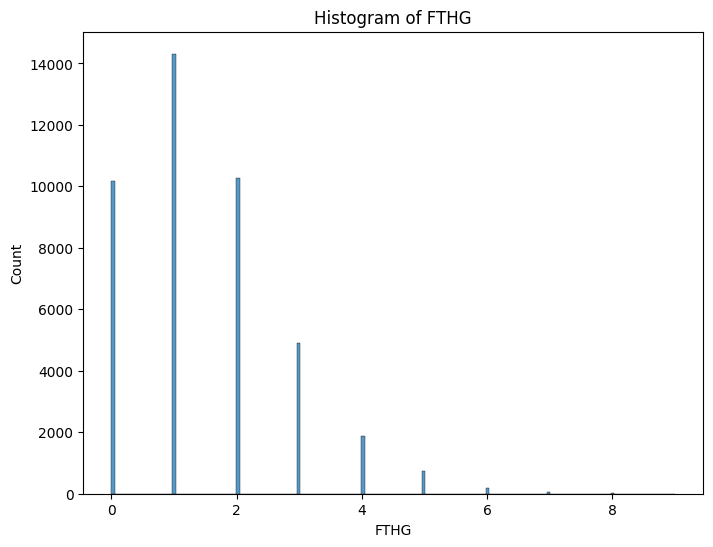

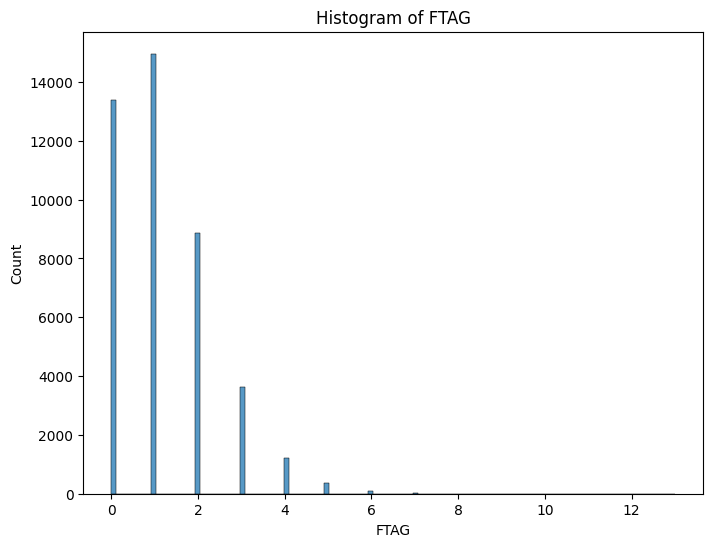

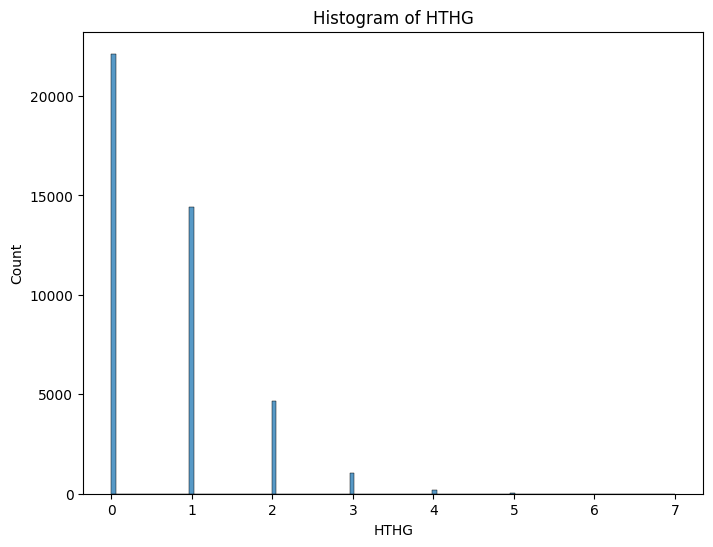

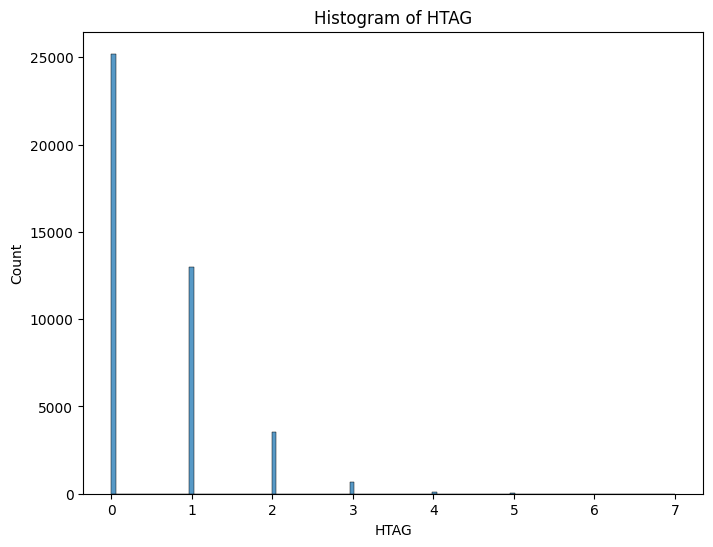

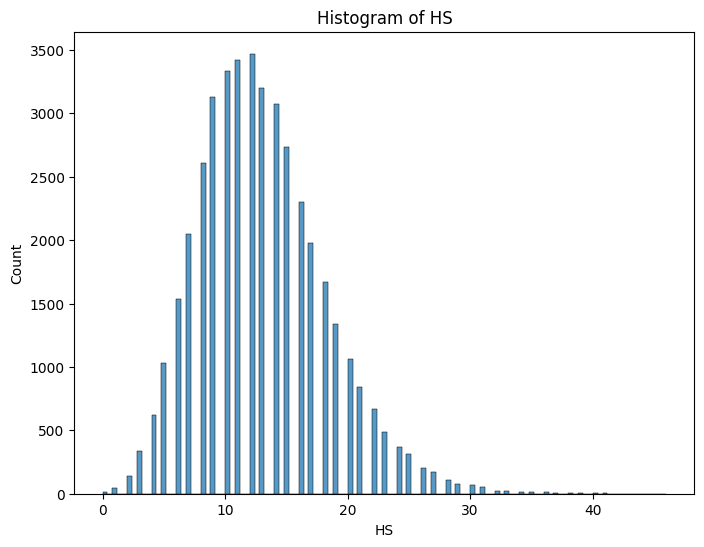

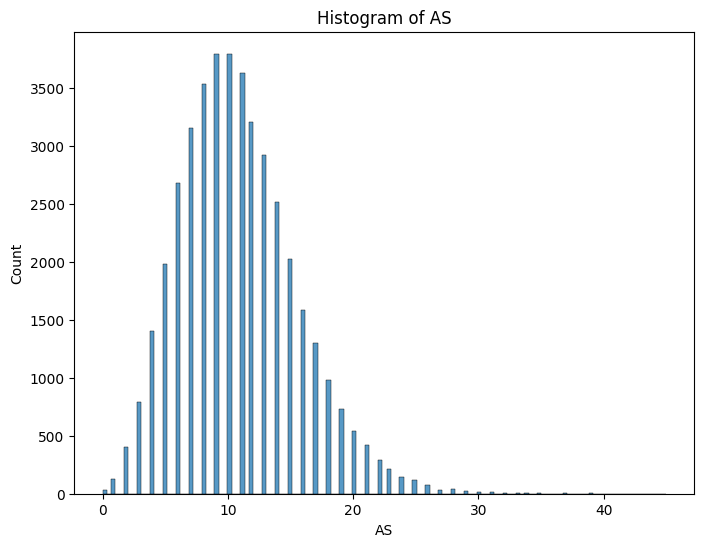

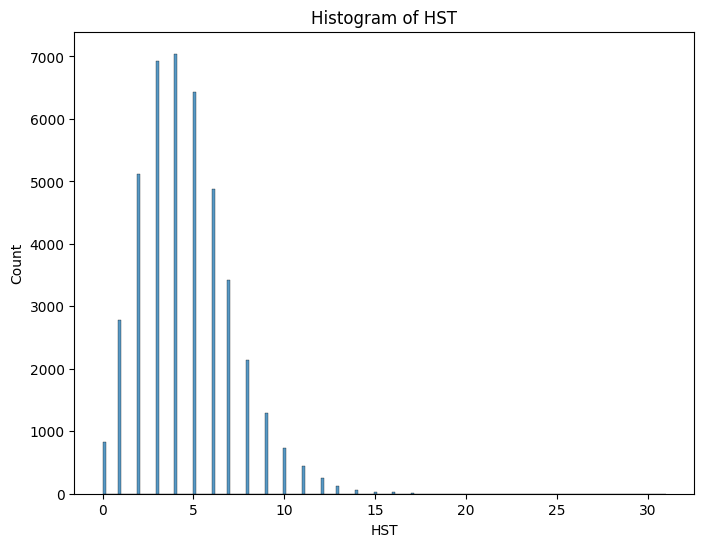

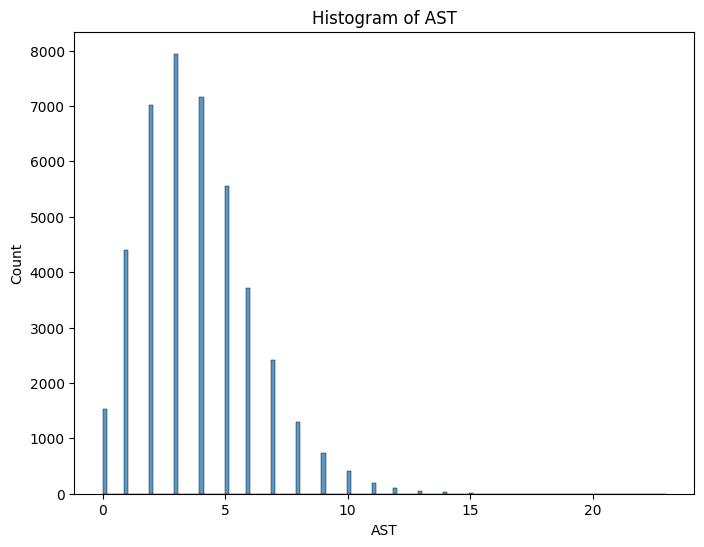

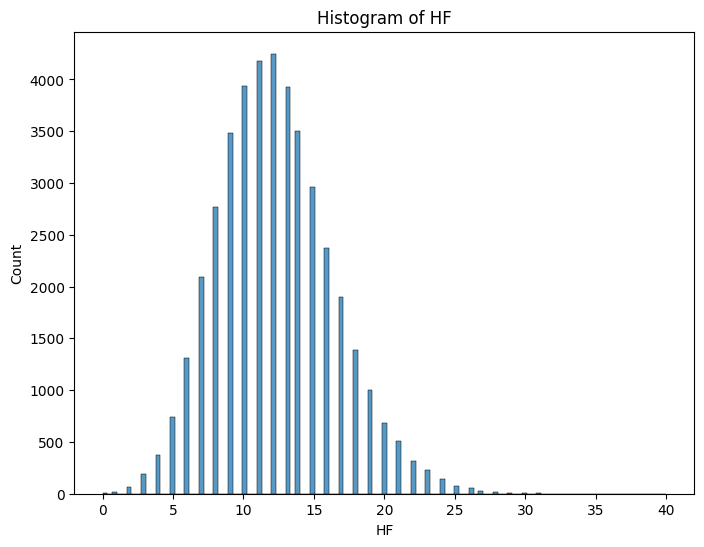

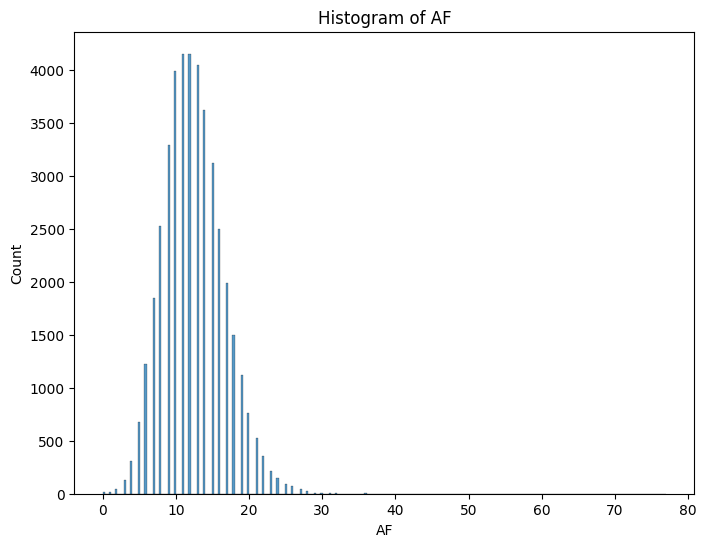

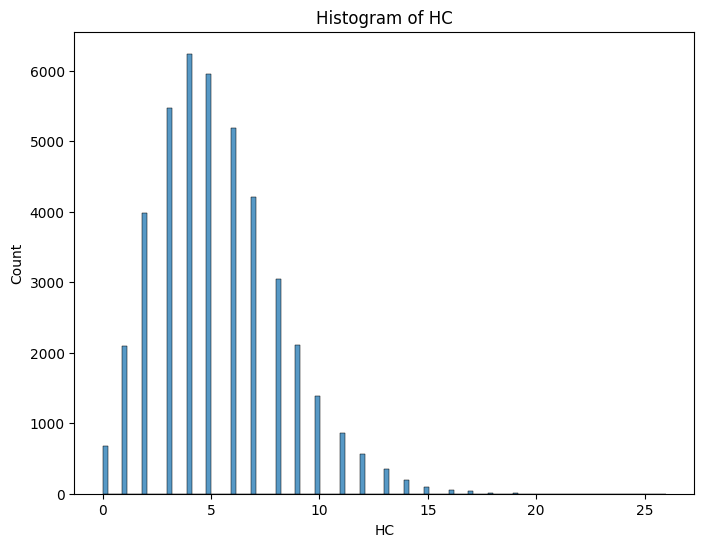

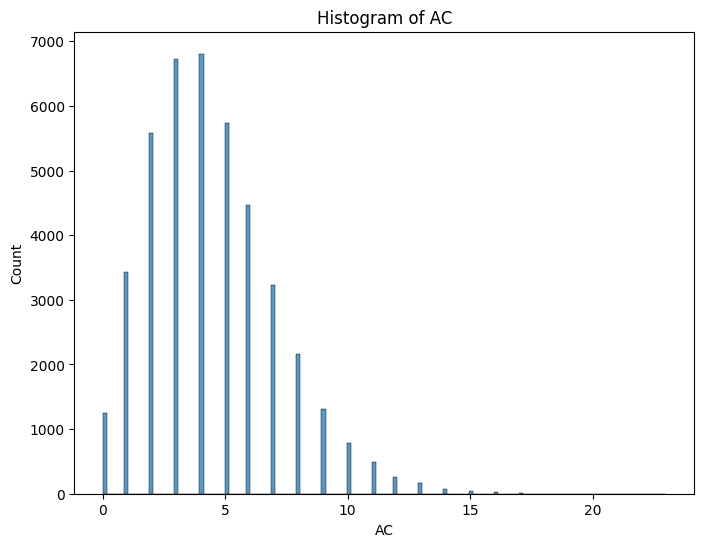

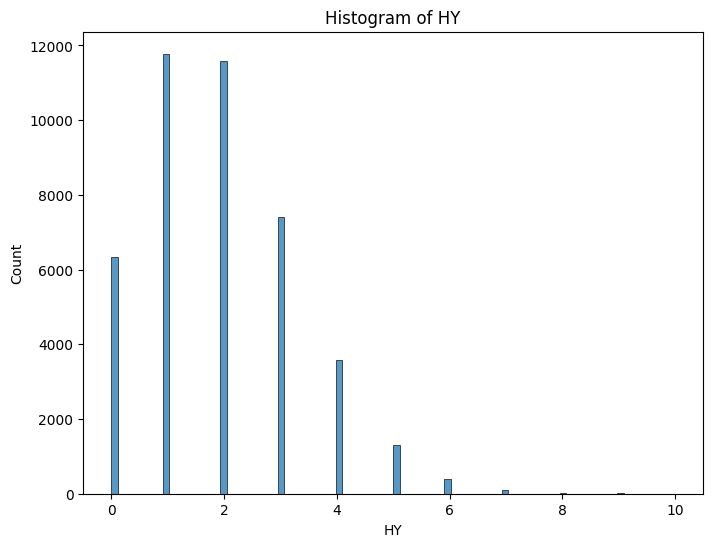

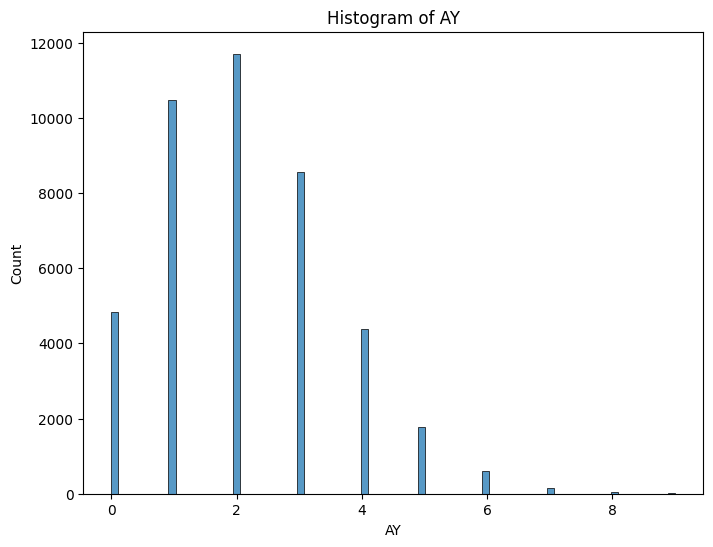

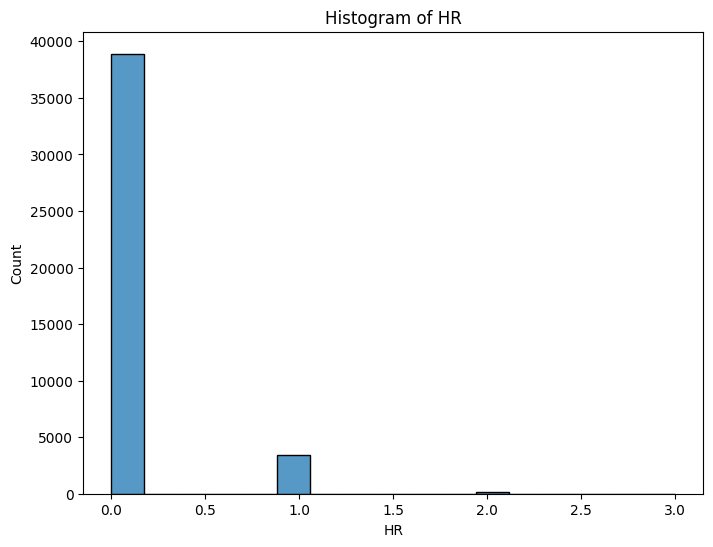

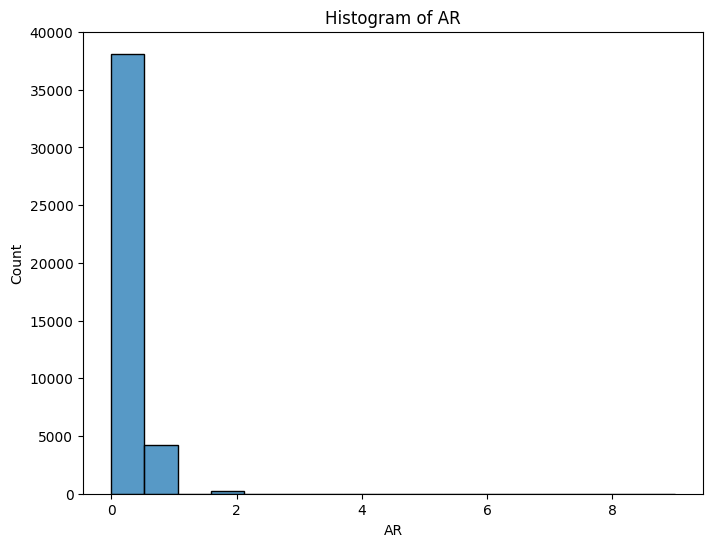

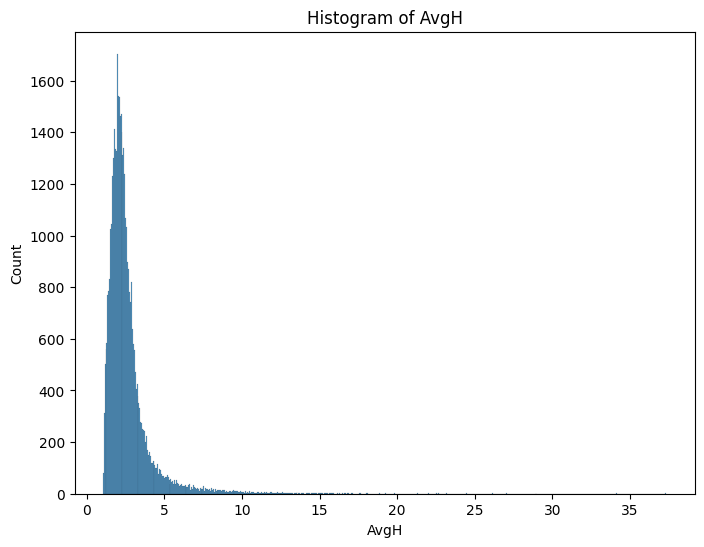

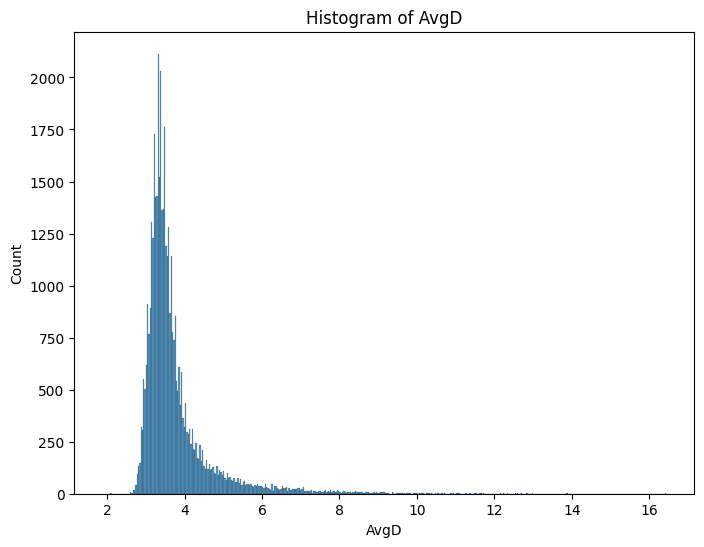

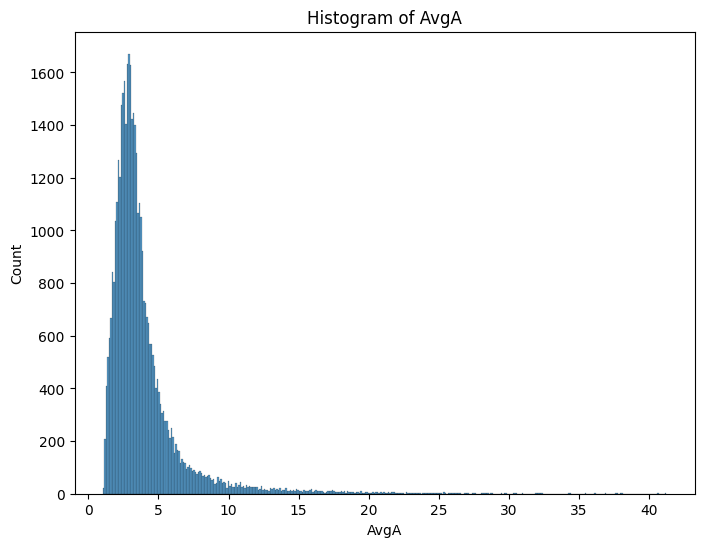

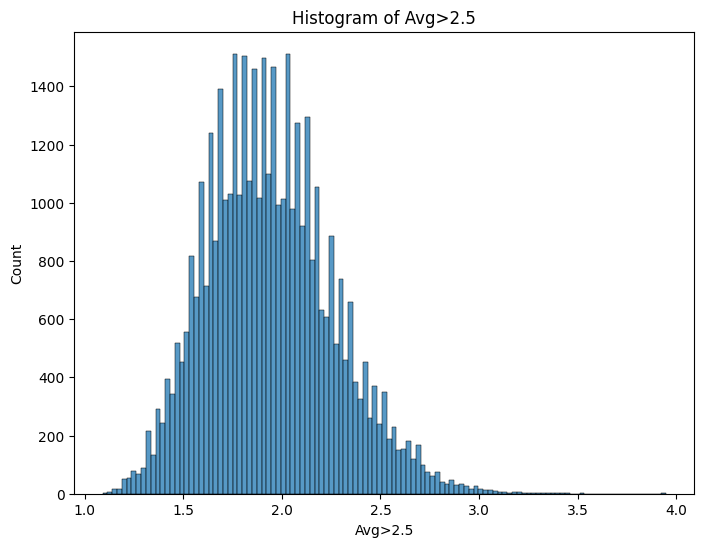

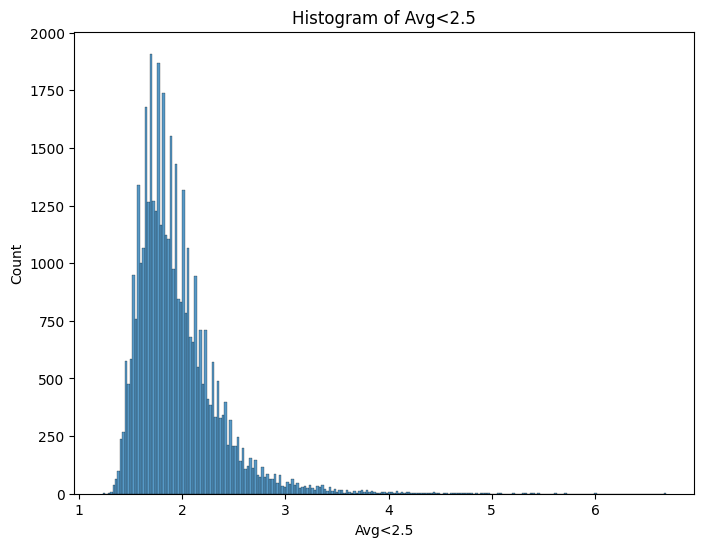

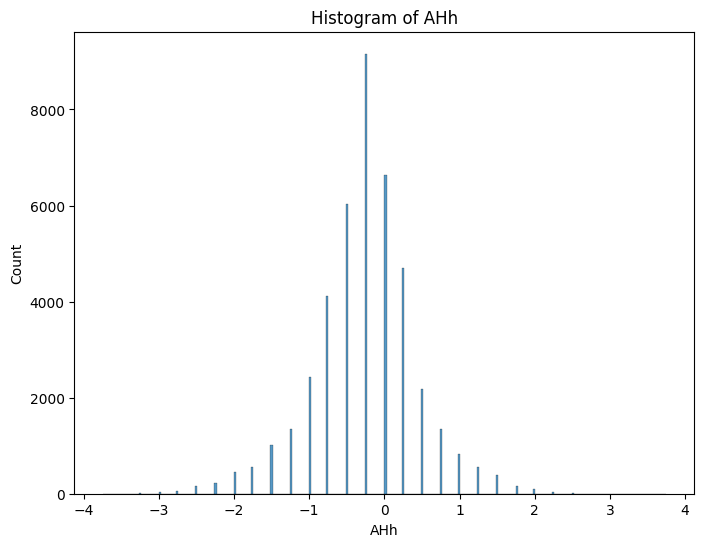

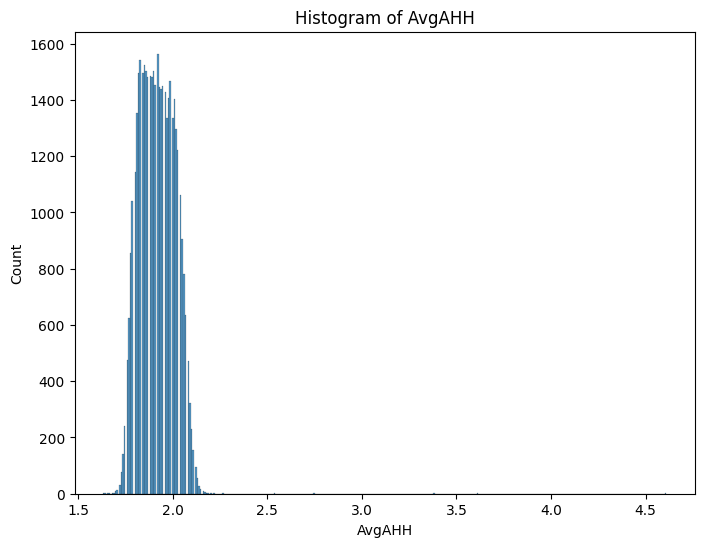

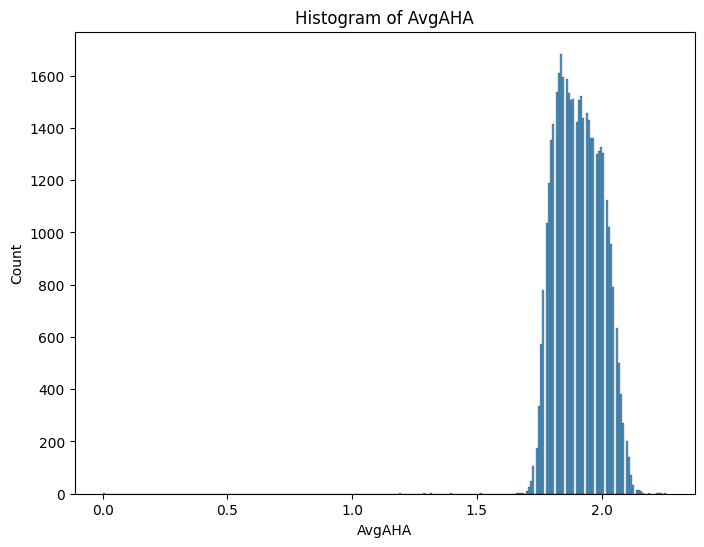

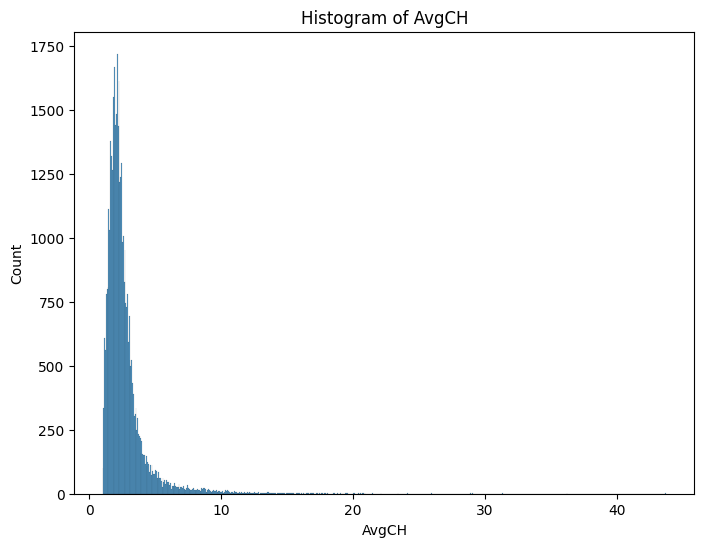

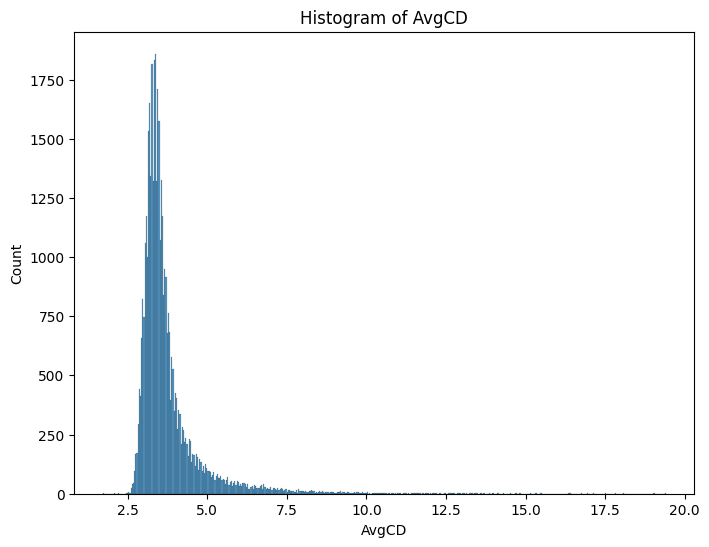

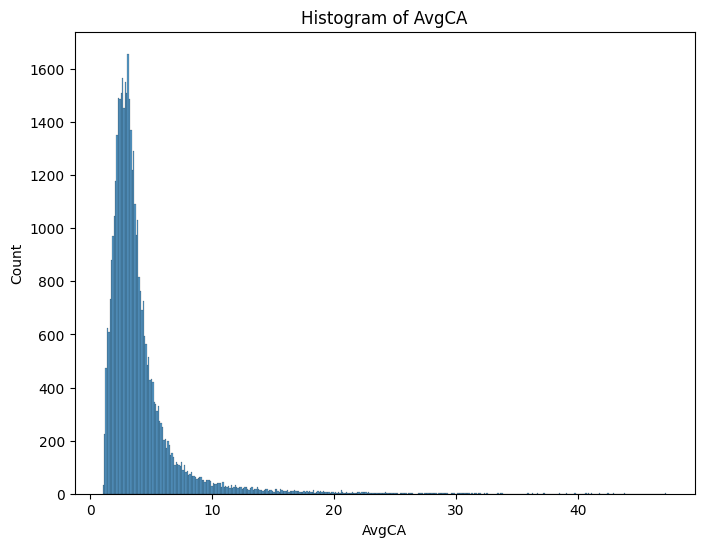

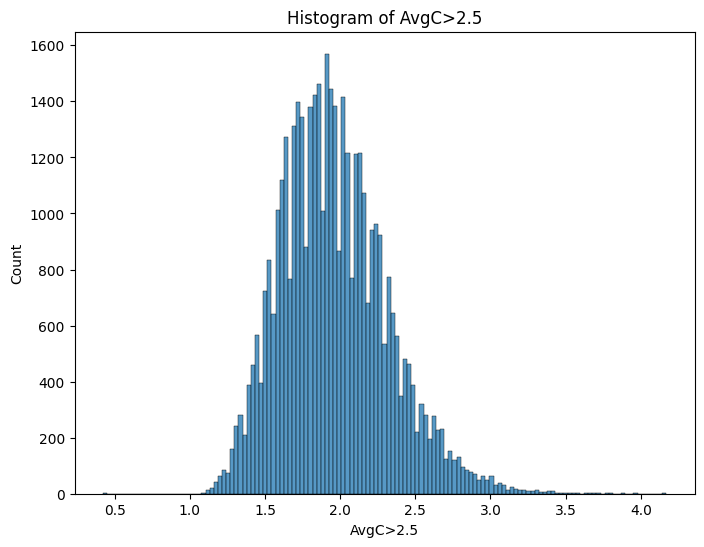

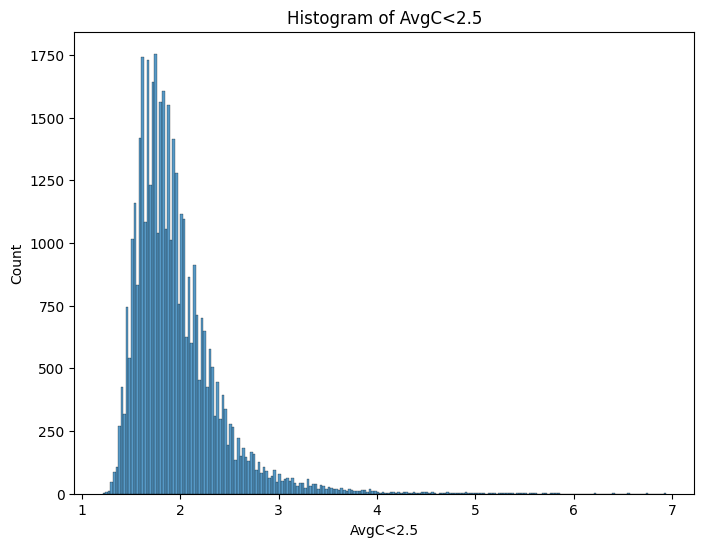

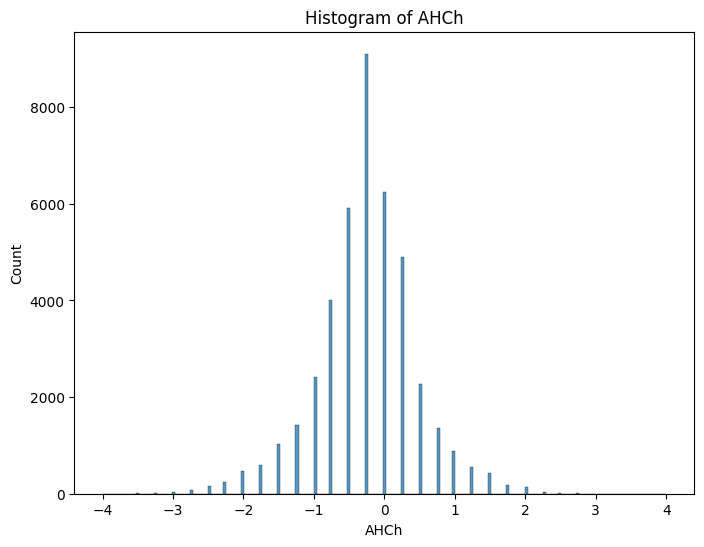

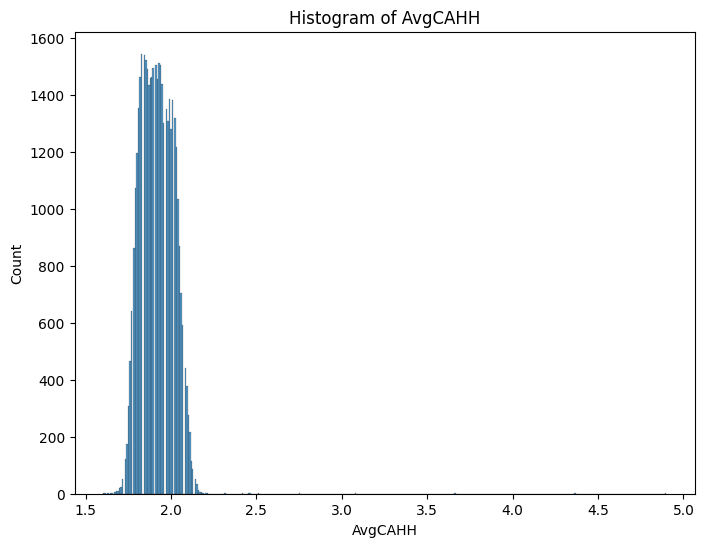

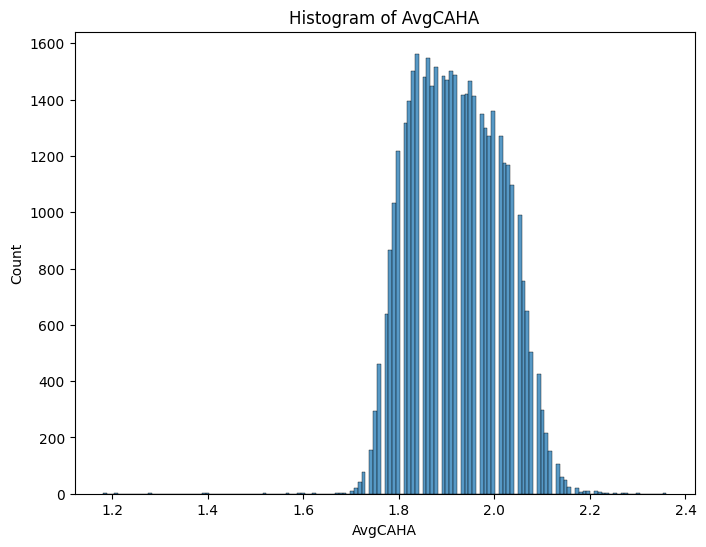

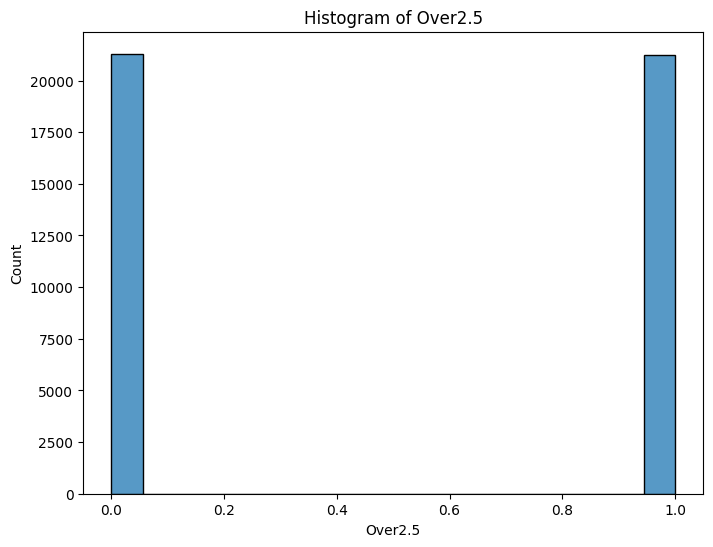

In [62]:
# finding the distribution of each column
for column in data_merged.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data_merged[column])
    plt.title(f'Histogram of {column}')

**Most of the columns are Right-Skewed. For the match statistics, such as shots, goals, cards and fouls (which are all right skewed), I will use a 0.1% and 99.9% quantile, to see the most extreme outliers. For these, even extreme outliers can be true, therefore I will check the extremes.**

I will check all the values that are not in this range manually, since it is the most extreme of the extreme.

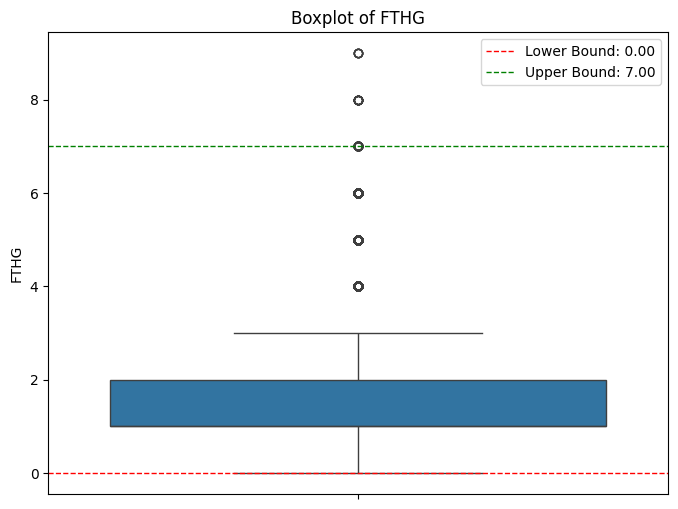

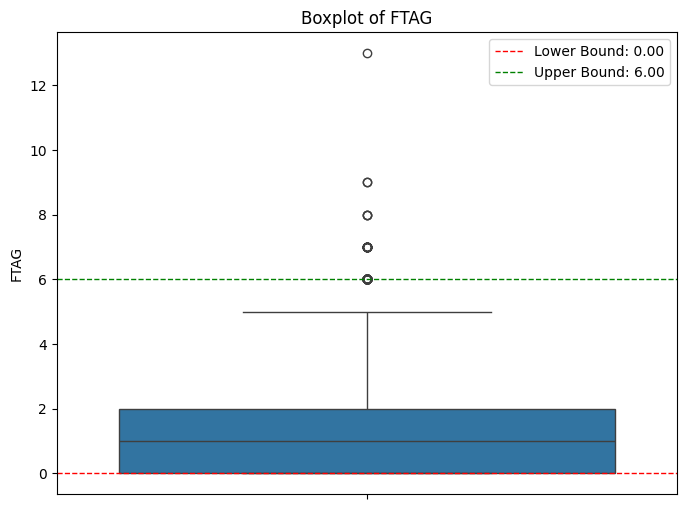

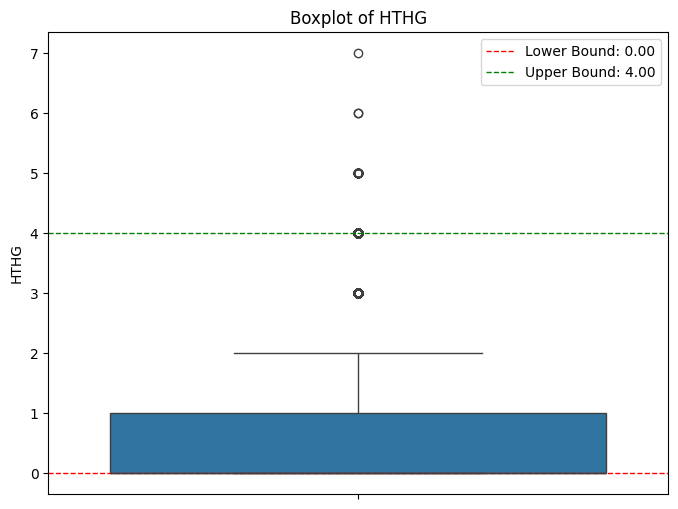

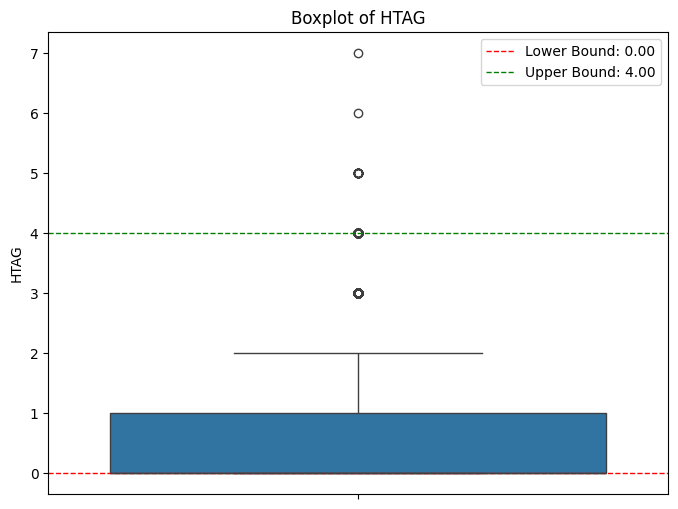

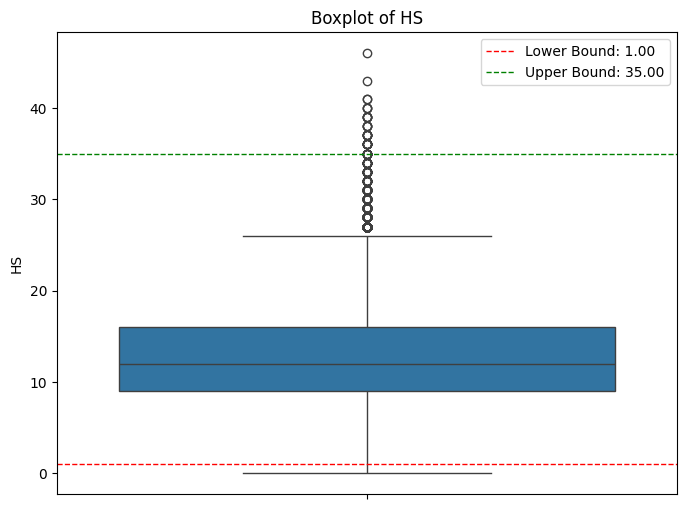

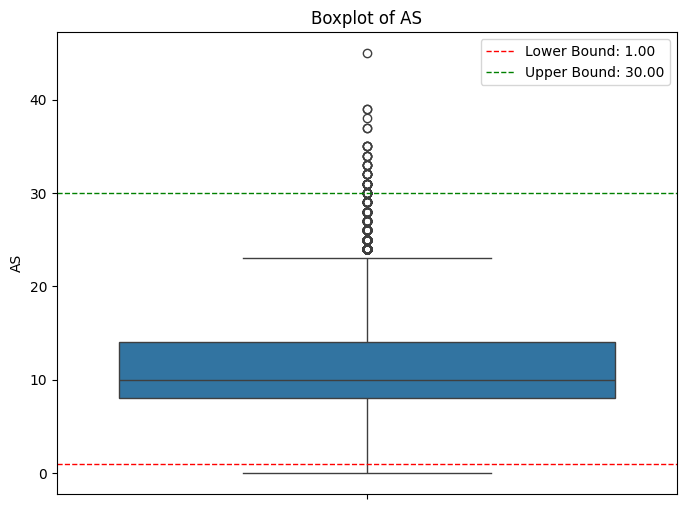

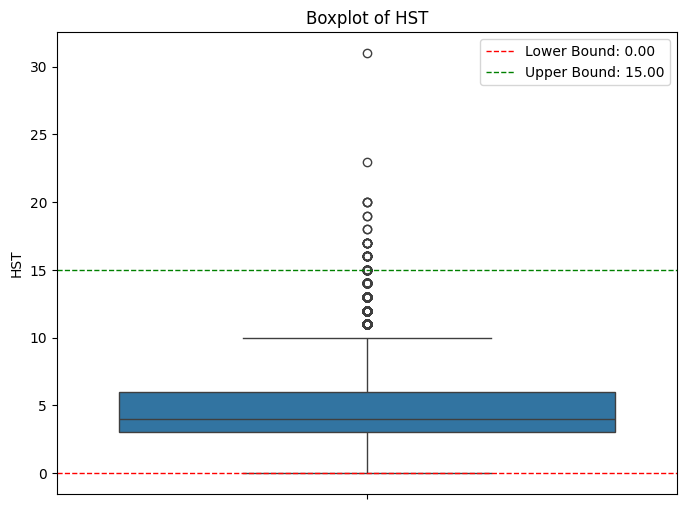

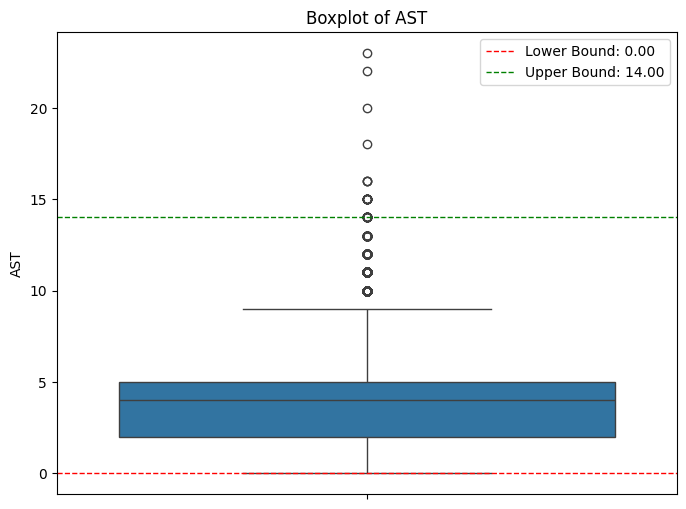

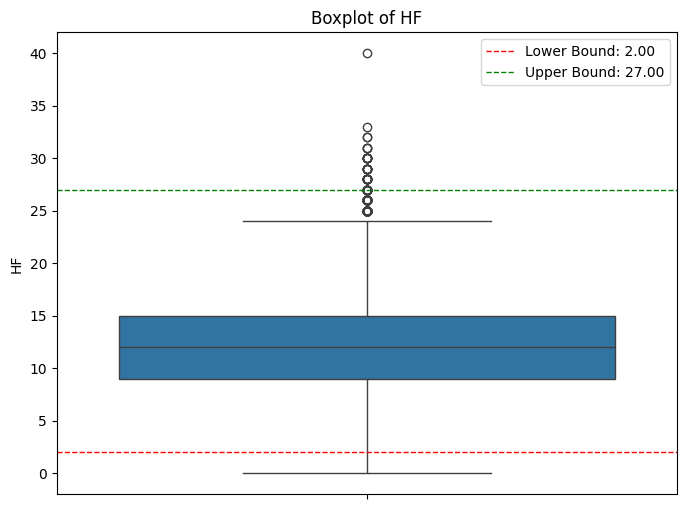

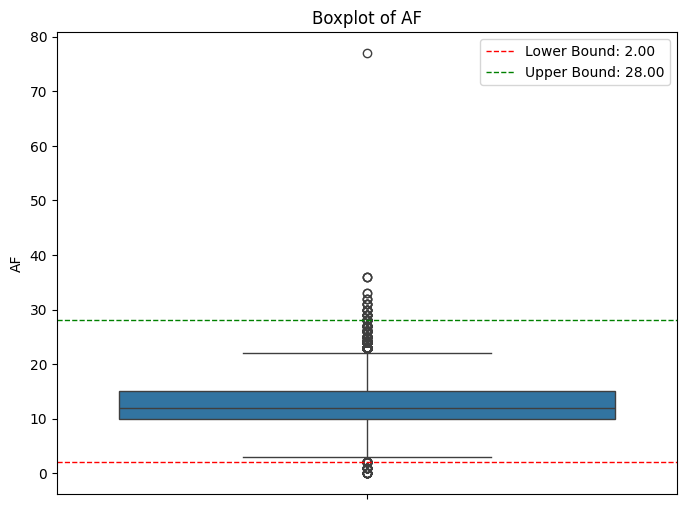

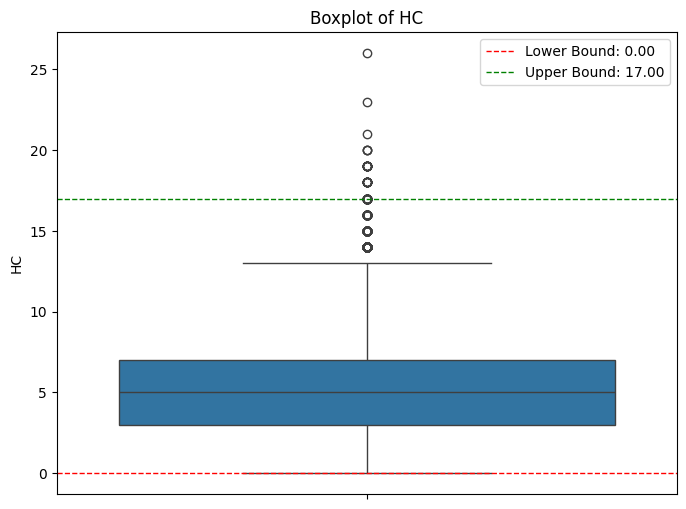

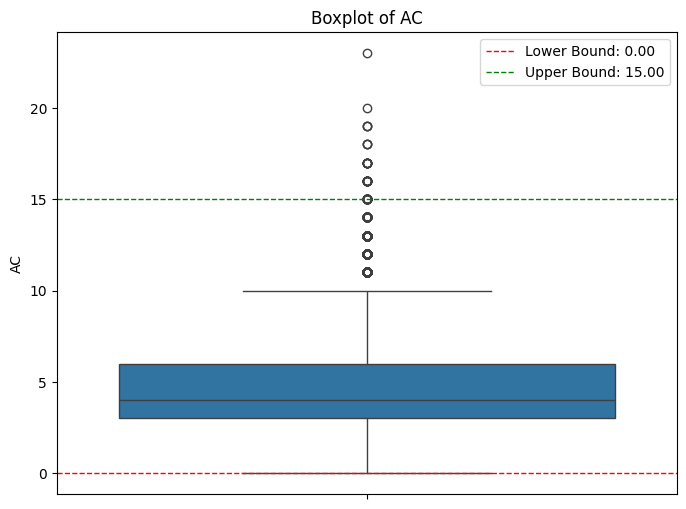

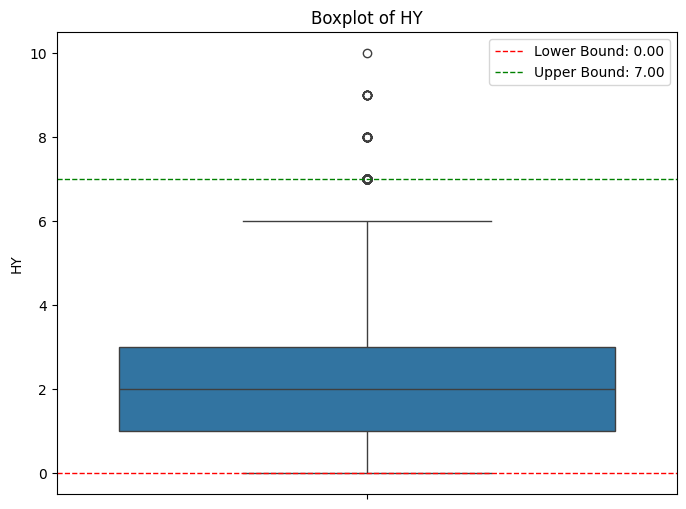

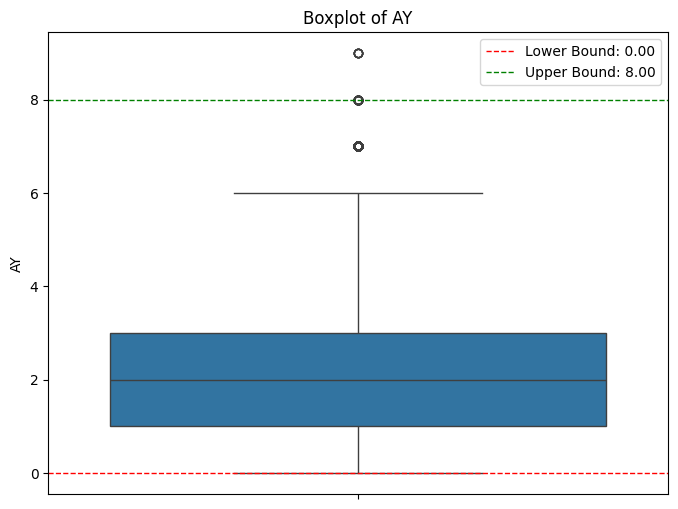

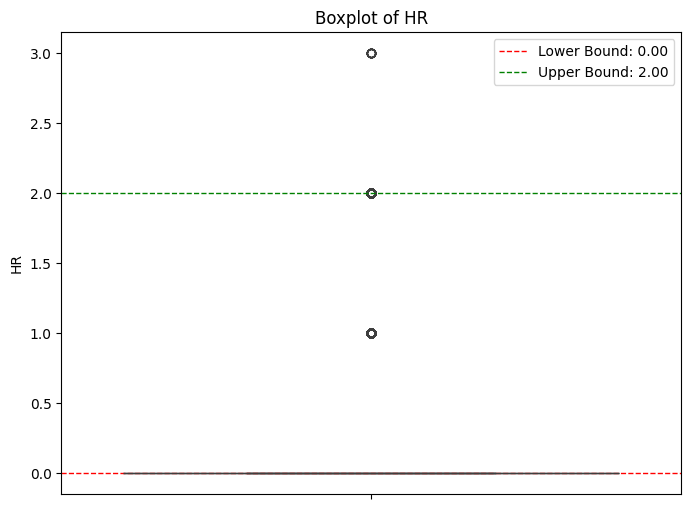

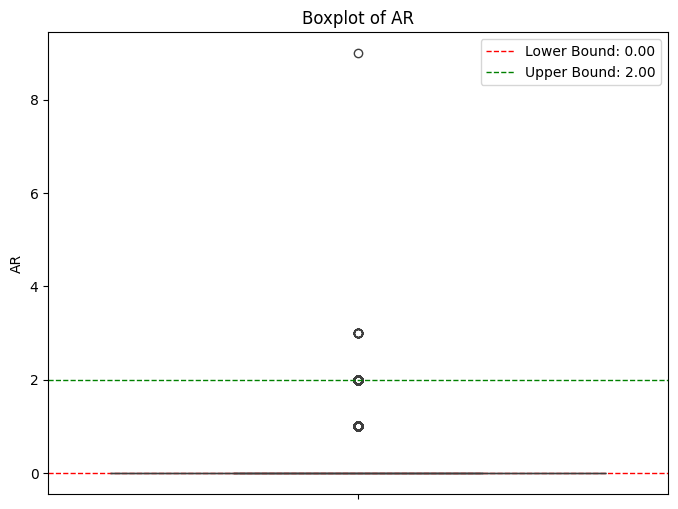

In [63]:
# Checking outliers (boxplots)
for column in data_merged[['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST',
                           'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
                           'AR']].select_dtypes(include=np.number).columns:

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_merged[column])
    plt.title(f'Boxplot of {column}')

    # Calculate Q1, Q99
    Q1 = data_merged[column].quantile(0.001)
    Q99 = data_merged[column].quantile(0.999)

    # Add lines for lower and upper bounds
    plt.axhline(Q1, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {Q1:.2f}')
    plt.axhline(Q99, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {Q99:.2f}')
    plt.legend()

    plt.show()

**In the boxplots, there are some possible actual outliers and mistakes in the dataset. I will check them and  change the values.**

In [64]:
pd.set_option('display.max_columns', None)

# checking FTAG and FTHG
display(data_merged[data_merged['FTHG'] > 8])
display(data_merged[data_merged['FTAG'] > 8])

# checking HTHG and HTAG
display(data_merged[data_merged['HTHG'] > 6])
display(data_merged[data_merged['HTAG'] > 5])

# checking HS and AS
display(data_merged[data_merged['HS'] > 42])
display(data_merged[data_merged['AS'] > 36])

# checking HST and AST
display(data_merged[data_merged['HST'] > 20]) # 1307 G1 - not true
display(data_merged[data_merged['AST'] > 17])

data_merged = data_merged.drop(data_merged[(data_merged.index == 1307) & (data_merged['Div'] == 'G1')].index)

# checking HF and AF
display(data_merged[data_merged['HF'] > 33])
display(data_merged[data_merged['AF'] > 35]) # 9436 E3 - should be 7 instead of 77

data_merged.loc[(data_merged.index == 9436) & (data_merged['Div'] == 'E3'), 'AF'] = 7

# checking HC and AC
display(data_merged[data_merged['HC'] > 22])
display(data_merged[data_merged['AC'] > 19])

# checking HY and AY
display(data_merged[data_merged['HY'] > 9])
display(data_merged[data_merged['AY'] > 8])

# checking HR and AR
display(data_merged[data_merged['HR'] > 2])
display(data_merged[data_merged['AR'] > 3]) # 2860 SP2 - should be 0 instead of 9

data_merged.loc[(data_merged.index == 2860) & (data_merged['Div'] == 'SP2'), 'AR'] =0

pd.reset_option('display.max_columns')



Div        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
587    E0  02/02/2021  20:15  Man United  Southampton     9     0   H   4.0   
1174   E0  27/08/2022  15:00   Liverpool  Bournemouth     9     0   H   5.0   
11215  E3  13/02/2024  19:45   Mansfield    Harrogate     9     2   H   5.0   
575    N1  18/09/2021  19:00        Ajax      Cambuur     9     0   H   4.0   
1493   N1  14/09/2024  20:00  AZ Alkmaar   Heerenveen     9     1   H   2.0   

       HTAG HTR    HS    AS   HST  AST    HF   AF   HC   AC   HY   AY   HR  \
587     0.0   H  24.0   3.0  14.0  1.0  11.0  6.0  5.0  3.0  2.0  3.0  0.0   
1174    0.0   H  19.0   5.0  12.0  2.0   6.0  5.0  8.0  1.0  0.0  1.0  0.0   
11215   0.0   H  23.0   7.0  13.0  3.0  11.0  5.0  6.0  3.0  1.0  0.0  0.0   
575     0.0   H  21.0  11.0  11.0  2.0   7.0  9.0  6.0  1.0  0.0  0.0  0.0   
1493    1.0   H  26.0  15.0  19.0  5.0   8.0  8.0  5.0  3.0  0.0  1.0  0.0   

        AR  AvgH   AvgD   AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  \
587    2.0  1.44   4.73   7.22     1.58     2.42 -1.25    1.96    1.92   1.45   
1174   0.0  1.11  10.17  25.51     1.36     3.16 -2.50    1.89    1.98   1.15   
11215  0.0  1.42   4.57   6.75     1.68     2.12 -1.25    1.96    1.83   1.52   
575    0.0  1.09  11.09  25.41     1.21     4.24 -2.75    1.88    1.97   1.07   
1493   0.0  1.40   4.89   7.26     1.57     2.37 -1.25    1.86    1.95   1.38   

       AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
587     4.79   6.94      1.54      2.49 -1.25     1.96     1.92   2021   
1174    8.99  18.65      1.34      3.28 -2.25     1.87     2.01   2223   
11215   4.24   5.73      1.70      2.09 -1.00     1.87     1.91   2324   
575    12.59  27.80      1.13      5.49 -3.00     1.83     2.01   2122   
1493    5.02   7.54      1.55      2.44 -1.25     1.82     2.01   2425   

       Over2.5  
587          1  
1174         1  
11215        1  
575          1  
1493         1

Div        Date   Time       HomeTeam   AwayTeam  FTHG  FTAG FTR  HTHG  \
90    E0  25/10/2019  20:00    Southampton  Leicester     0     9   A   0.0   
276   N1  24/10/2020  15:30      VVV Venlo       Ajax     0    13   A   0.0   
663  SC0  28/08/2022  12:00  Dundee United     Celtic     0     9   A   0.0   

     HTAG HTR   HS    AS  HST   AST    HF    AF   HC    AC   HY   AY   HR  \
90    5.0   A  6.0  25.0  3.0  15.0   3.0  12.0  2.0   7.0  0.0  0.0  1.0   
276   4.0   A  3.0  45.0  0.0  23.0  12.0   9.0  3.0  12.0  1.0  0.0  1.0   
663   4.0   A  6.0  30.0  2.0  13.0   6.0   7.0  2.0  11.0  1.0  0.0  0.0   

      AR   AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  \
90   0.0   3.20  3.34  2.36     2.01     1.83  0.25    1.86    2.02   3.13   
276  0.0  12.52  6.96  1.20     1.35     3.09  2.00    1.95    1.89   9.57   
663  0.0  16.57  7.62  1.15     1.42     2.76  2.00    2.05    1.77  21.47   

     AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
90    3.34   2.39      2.02      1.82  0.25     1.84     2.06   1920        1  
276   6.21   1.26      1.33      3.22  1.75     1.92     1.93   2021        1  
663   9.46   1.11      1.34      3.20  2.50     1.89     1.93   2223        1

Div        Date   Time HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
2798  E1  14/07/2020  18:00    Wigan     Hull     8     0   H   7.0   0.0   H   

        HS    AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  AvgH  \
2798  14.0  10.0  9.0  4.0  11.0  16.0  4.0  3.0  0.0  2.0  0.0  0.0   1.8   

      AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  AvgCA  \
2798  3.63  4.45     1.95     1.86 -0.75    2.05     1.8   1.77   3.75   4.43   

      AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
2798      1.79      2.01 -0.75     2.03     1.83   1920        1

Div        Date   Time    HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
737  D1  05/12/2021  16:30  M'gladbach  Freiburg     0     6   A   0.0   6.0   
714  P1  27/11/2021  20:30  Belenenses   Benfica     0     7   A   0.0   7.0   

    HTR    HS    AS  HST   AST    HF    AF   HC   AC   HY   AY   HR   AR  \
737   A  19.0  15.0  3.0   8.0  12.0  15.0  3.0  3.0  2.0  1.0  0.0  0.0   
714   A   0.0  17.0  0.0  11.0   2.0   3.0  2.0  4.0  0.0  0.0  0.0  0.0   

      AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  \
737   1.86  3.75  4.15     1.75     2.11 -0.75    2.12    1.77   1.82   3.80   
714  13.75  5.99  1.22     1.67     2.18  1.75    1.96    1.90  36.20  13.05   

     AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
737   4.36      1.74      2.13 -0.75     2.05     1.84   2122        1  
714   1.05      1.36      3.12  3.00     2.03     1.84   2122        1

Div        Date   Time HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
1123   I1  14/05/2022  19:45     Roma      Venezia     1     1   D   0.0   
1010  SC0  14/02/2024  19:45  Rangers  Ross County     3     1   H   2.0   

      HTAG HTR    HS   AS   HST  AST    HF    AF    HC   AC   HY   AY   HR  \
1123   1.0   A  46.0  4.0  16.0  2.0  11.0  14.0  20.0  2.0  2.0  5.0  0.0   
1010   1.0   H  43.0  5.0  23.0  1.0  10.0  12.0  20.0  3.0  1.0  3.0  0.0   

       AR  AvgH   AvgD   AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  \
1123  1.0  1.24   6.56  11.28      1.4     2.91 -1.75    1.85    2.02   1.27   
1010  0.0  1.08  10.34  25.36      1.4     2.86 -2.50    1.91    1.90   1.07   

      AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
1123   6.02  11.20      1.50      2.59 -1.50     1.80     2.10   2122        0  
1010  11.41  24.56      1.28      3.53 -2.75     1.97     1.84   2324        1

Div        Date   Time          HomeTeam   AwayTeam  FTHG  FTAG FTR  \
2110   E0  18/01/2025  15:00         Brentford  Liverpool     0     2   A   
3840   I2  16/09/2023  15:15          Reggiana  Cremonese     2     2   D   
276    N1  24/10/2020  15:30         VVV Venlo       Ajax     0    13   A   
1291   N1  17/12/2023  13:30  Sparta Rotterdam     Twente     2     2   D   
926   SC0  04/11/2023  12:30       Ross County     Celtic     0     3   A   
971   SC0  26/12/2023  15:00            Dundee     Celtic     0     3   A   

      HTHG  HTAG HTR    HS    AS  HST   AST    HF    AF   HC    AC   HY   AY  \
2110   0.0   0.0   D  11.0  37.0  6.0   8.0   6.0  14.0  2.0  15.0  2.0  3.0   
3840   2.0   0.0   H   7.0  37.0  5.0   8.0  10.0   5.0  0.0  14.0  0.0  1.0   
276    0.0   4.0   A   3.0  45.0  0.0  23.0  12.0   9.0  3.0  12.0  1.0  0.0   
1291   0.0   1.0   A  12.0  39.0  8.0   9.0  11.0   7.0  3.0  14.0  2.0  1.0   
926    0.0   1.0   A   3.0  39.0  0.0  16.0   9.0  10.0  2.0  13.0  0.0  1.0   
971    0.0   0.0   D   5.0  38.0  1.0   7.0   3.0   9.0  1.0  23.0  1.0  1.0   

       HR   AR   AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  \
2110  0.0  0.0   6.43  5.15  1.43     1.35     3.16  1.25    1.97    1.85   
3840  0.0  0.0   3.13  3.15  2.34     2.25     1.62  0.25    1.81    1.99   
276   1.0  0.0  12.52  6.96  1.20     1.35     3.09  2.00    1.95    1.89   
1291  1.0  0.0   4.14  3.72  1.84     1.80     2.01  0.50    2.01    1.83   
926   1.0  0.0  12.56  6.40  1.21     1.46     2.64  1.75    1.99    1.82   
971   0.0  0.0   9.55  5.74  1.28     1.50     2.52  1.50    2.01    1.80   

      AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
2110   6.04   4.97   1.48      1.33      3.36  1.25     1.91     1.94   2425   
3840   3.01   3.13   2.42      2.15      1.67  0.25     1.76     2.07   2324   
276    9.57   6.21   1.26      1.33      3.22  1.75     1.92     1.93   2021   
1291   4.13   3.67   1.85      1.85      1.94  0.50     1.99     1.84   2324   
926    9.00   5.37   1.31      1.54      2.42  1.50     1.90     1.91   2324   
971   10.15   6.01   1.26      1.46      2.65  1.75     1.86     1.95   2324   

      Over2.5  
2110        0  
3840        1  
276         1  
1291        1  
926         1  
971         1

Div        Date   Time       HomeTeam          AwayTeam  FTHG  FTAG FTR  \
1307   G1  22/12/2024  16:00  Panathinaikos  Athens Kallithea     1     0   H   
1010  SC0  14/02/2024  19:45        Rangers       Ross County     3     1   H   

      HTHG  HTAG HTR    HS   AS   HST  AST    HF    AF    HC   AC   HY   AY  \
1307   0.0   0.0   D  41.0  3.0  31.0  2.0  17.0  17.0  17.0  3.0  5.0  5.0   
1010   2.0   1.0   H  43.0  5.0  23.0  1.0  10.0  12.0  20.0  3.0  1.0  3.0   

       HR   AR  AvgH   AvgD   AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  \
1307  0.0  1.0  1.20   6.13  13.42     1.66     2.15 -1.75    1.85    1.93   
1010  0.0  0.0  1.08  10.34  25.36     1.40     2.86 -2.50    1.91    1.90   

      AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
1307   1.18   6.43  15.28      1.59      2.30 -2.00     2.01     1.81   2425   
1010   1.07  11.41  24.56      1.28      3.53 -2.75     1.97     1.84   2324   

      Over2.5  
1307        0  
1010        1

Div        Date   Time          HomeTeam        AwayTeam  FTHG  FTAG FTR  \
4     B1  27/07/2019  19:30  Waasland-Beveren     Club Brugge     1     3   A   
2847  F2  20/11/2021  18:00             Nimes  Quevilly Rouen     2     1   H   
791   D1  23/01/2022  16:30            Hertha   Bayern Munich     1     4   A   
276   N1  24/10/2020  15:30         VVV Venlo            Ajax     0    13   A   

      HTHG  HTAG HTR    HS    AS  HST   AST    HF    AF   HC    AC   HY   AY  \
4      1.0   1.0   D   7.0  25.0  2.0  22.0  18.0  12.0  1.0  14.0  3.0  1.0   
2847   1.0   1.0   D  11.0  34.0  6.0  18.0  16.0  19.0  4.0   9.0  4.0  1.0   
791    0.0   2.0   A   5.0  29.0  2.0  20.0   9.0   9.0  4.0   9.0  1.0  0.0   
276    0.0   4.0   A   3.0  45.0  0.0  23.0  12.0   9.0  3.0  12.0  1.0  0.0   

       HR   AR   AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  \
4     0.0  0.0   5.53  4.36  1.53     1.55     2.38  1.0    1.96    1.87   
2847  0.0  0.0   2.04  3.18  3.84     2.15     1.68 -0.5    2.04    1.80   
791   0.0  0.0  11.06  6.92  1.23     1.36     3.14  2.0    1.83    2.03   
276   1.0  0.0  12.52  6.96  1.20     1.35     3.09  2.0    1.95    1.89   

      AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
4      9.44   5.89   1.27      1.43      2.73  1.50     2.11     1.74   1920   
2847   1.96   3.29   3.99      2.10      1.71 -0.50     1.97     1.86   2122   
791   12.69   7.49   1.21      1.34      3.29  2.00     1.98     1.89   2122   
276    9.57   6.21   1.26      1.33      3.22  1.75     1.92     1.93   2021   

      Over2.5  
4           1  
2847        1  
791         1  
276         1

Div        Date   Time HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  \
600  G1  22/01/2022  17:30  Ionikos  Panathinaikos     0     1   A   0.0   

     HTAG HTR   HS   AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  \
600   1.0   A  7.0  2.0  1.0  2.0  40.0  17.0  7.0  2.0  3.0  2.0  0.0  0.0   

     AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  \
600  4.21  3.38  1.86     2.33     1.58  0.5    1.93    1.86   5.17   3.53   

     AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
600   1.68      2.27      1.61  0.75     1.91      1.9   2122        0

Div        Date   Time   HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  \
9436  E3  02/01/2021  15:00     Bolton  Crawley Town     0     1   A   0.0   
166   G1  16/02/2020  17:30       Aris           AEK     0     1   A   0.0   
276   G1  31/10/2020  15:15  Atromitos      Giannina     0     2   A   0.0   
415   G1  14/03/2021  17:00    Apollon   Panetolikos     1     0   H   0.0   

      HTAG HTR    HS    AS  HST  AST    HF    AF   HC   AC   HY   AY   HR  \
9436   0.0   D  24.0  12.0  7.0  5.0  13.0  77.0  6.0  4.0  1.0  0.0  1.0   
166    1.0   A   7.0   4.0  1.0  1.0  11.0  36.0  5.0  2.0  1.0  4.0  0.0   
276    1.0   A   3.0   9.0  1.0  5.0  26.0  36.0  0.0  5.0  3.0  3.0  0.0   
415    0.0   D   8.0   9.0  5.0  4.0  31.0  36.0  3.0  4.0  1.0  1.0  0.0   

       AR  AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  \
9436  0.0  2.52  3.43  2.64     1.89     1.89  0.0    1.86    1.96   2.45   
166   0.0  2.71  3.19  2.52     2.15     1.66  0.0    1.96    1.83   2.53   
276   0.0  1.88  3.08  4.63     2.32     1.58 -0.5    1.89    1.92   2.01   
415   0.0  2.07  2.92  3.97     2.52     1.50 -0.5    2.08    1.75   2.11   

      AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
9436   3.42   2.74      1.79      2.00  0.00     1.82     2.02   2021        0  
166    2.86   3.02      2.28      1.59  0.00     1.73     2.10   1920        0  
276    3.00   4.10      2.38      1.55 -0.50     2.01     1.81   2021        0  
415    2.82   4.06      2.57      1.48 -0.25     1.77     2.05   2021        0

Div        Date   Time     HomeTeam  AwayTeam  FTHG  FTAG FTR  HTHG  \
1396   P1  03/02/2024  20:30        Porto   Rio Ave     0     0   D   0.0   
2255  SP1  14/05/2025  20:30  Real Madrid  Mallorca     2     1   H   0.0   

      HTAG HTR    HS   AS   HST  AST    HF    AF    HC   AC   HY   AY   HR  \
1396   0.0   D  17.0  3.0   5.0  0.0  15.0  24.0  23.0  0.0  4.0  5.0  0.0   
2255   1.0   A  39.0  4.0  13.0  2.0   6.0  15.0  26.0  0.0  0.0  3.0  0.0   

       AR  AvgH  AvgD   AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  \
1396  1.0  1.21  6.54  13.48     1.60     2.32 -1.75    1.84    1.99   1.21   
2255  0.0  1.38  5.06   7.87     1.59     2.36 -1.50    2.03    1.80   1.42   

      AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
1396   6.44  13.72      1.66      2.22 -1.75     1.95     1.88   2324        0  
2255   4.90   7.07      1.57      2.42 -1.25     1.91     1.94   2425        1

Div        Date   Time      HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  \
714  SC0  06/11/2022  12:00  St Johnstone  Rangers     2     1   H   1.0   
971  SC0  26/12/2023  15:00        Dundee   Celtic     0     3   A   0.0   

     HTAG HTR    HS    AS  HST  AST   HF    AF   HC    AC   HY   AY   HR   AR  \
714   0.0   H  11.0  29.0  3.0  7.0  7.0  13.0  0.0  20.0  2.0  0.0  0.0  0.0   
971   0.0   D   5.0  38.0  1.0  7.0  3.0   9.0  1.0  23.0  1.0  1.0  0.0  0.0   

      AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  \
714  10.10  5.33  1.29      1.7     2.11  1.5    1.93    1.89   9.80   5.42   
971   9.55  5.74  1.28      1.5     2.52  1.5    2.01    1.80  10.15   6.01   

     AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
714   1.30      1.60      2.30  1.50     1.95     1.87   2223        1  
971   1.26      1.46      2.65  1.75     1.86     1.95   2324        1

Div        Date   Time HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
902  P1  07/05/2022  18:00  Benfica    Porto     0     1   A   0.0   0.0   D   

      HS    AS  HST  AST    HF    AF   HC   AC    HY   AY   HR   AR  AvgH  \
902  9.0  10.0  2.0  5.0  23.0  15.0  5.0  3.0  10.0  4.0  0.0  0.0  3.12   

     AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  AvgCA  \
902  3.49  2.22     1.73      2.1  0.25    1.91    1.94   2.93   3.46   2.35   

     AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
902      1.72      2.13  0.25     1.83     2.03   2122        0

Div        Date   Time     HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
7782   E2  07/10/2023  15:00    Stevenage       Wigan     1     0   H   1.0   
152    G1  02/02/2020  15:15    Atromitos         AEK     0     1   A   0.0   
924    P1  07/08/2022  20:30       Chaves   Guimaraes     0     1   A   0.0   
1520   P1  12/05/2024  20:30        Porto    Boavista     2     1   H   0.0   
1999  SP1  21/10/2024  20:00     Valencia  Las Palmas     2     3   A   1.0   
3280  SP2  27/09/2021  20:00  Fuenlabrada   Cartagena     2     1   H   1.0   

      HTAG HTR    HS    AS  HST  AST    HF    AF    HC   AC   HY   AY   HR  \
7782   0.0   H  13.0  10.0  5.0  2.0  18.0  18.0   8.0  3.0  3.0  9.0  1.0   
152    0.0   D   4.0   7.0  2.0  4.0  16.0  27.0   3.0  4.0  3.0  9.0  0.0   
924    1.0   A  14.0  15.0  2.0  6.0  10.0  20.0   2.0  5.0  2.0  9.0  0.0   
1520   0.0   D  20.0   3.0  4.0  2.0  14.0  12.0  11.0  2.0  2.0  9.0  0.0   
1999   1.0   D  14.0  11.0  7.0  6.0  12.0  12.0  11.0  2.0  4.0  9.0  1.0   
3280   0.0   H  13.0   9.0  6.0  3.0  24.0  12.0   3.0  0.0  5.0  9.0  0.0   

       AR  AvgH  AvgD   AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  AvgCH  \
7782  1.0  1.74  3.74   4.43     1.79     1.98 -0.75    1.94    1.84   1.74   
152   1.0  3.87  3.13   2.00     2.33     1.56  0.50    1.79    2.00   4.38   
924   2.0  2.80  3.26   2.48     2.10     1.71  0.00    2.04    1.81   2.60   
1520  1.0  1.16  7.53  15.98     1.46     2.65 -2.00    1.82    2.01   1.13   
1999  0.0  1.65  3.71   5.85     2.28     1.64 -0.75    1.82    2.01   1.89   
3280  0.0  1.96  3.04   4.39     2.61     1.47 -0.50    1.97    1.86   2.00   

      AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
7782   3.62   4.70      1.95      1.82 -0.75     1.96     1.84   2324        0  
152    3.31   1.84      2.39      1.54  0.50     1.97     1.83   1920        0  
924    3.18   2.74      2.12      1.70  0.00     1.87     1.98   2223        0  
1520   8.78  17.89      1.33      3.28 -2.25     1.86     1.96   2324        1  
1999   3.37   4.55      2.31      1.63 -0.50     1.90     1.97   2425        1  
3280   3.06   4.17      2.33      1.58 -0.50     2.00     1.84   2122        1

Div        Date   Time       HomeTeam     AwayTeam  FTHG  FTAG FTR  \
305    F1  13/09/2020  20:00       Paris SG    Marseille     0     1   A   
2168   F2  08/11/2019  19:00   Valenciennes  Chateauroux     0     1   A   
3101   F2  20/08/2022  14:00     St Etienne     Le Havre     0     6   A   
3149   F2  12/09/2022  19:45           Metz     Guingamp     3     6   A   
1701   D1  31/01/2025  19:30  Werder Bremen        Mainz     1     0   H   
1780   I1  01/03/2024  19:45          Lazio        Milan     0     1   A   
238    P1  17/06/2020  21:15        Rio Ave      Benfica     1     2   A   
887    P1  24/04/2022  18:00        Estoril   Belenenses     2     2   D   
1218   P1  27/05/2023  15:30         Chaves     Boavista     1     4   A   
3572  SP2  03/04/2022  13:00      Cartagena       Oviedo     1     2   A   
4978  SP2  19/04/2025  15:15         Huesca    Santander     1     3   A   
19     T1  30/08/2019  18:30    Kayserispor  Galatasaray     2     3   A   

      HTHG  HTAG HTR    HS    AS  HST   AST    HF    AF   HC    AC   HY   AY  \
305    0.0   1.0   A  14.0   5.0  4.0   2.0  17.0  19.0  4.0   2.0  6.0  8.0   
2168   0.0   0.0   D  17.0  20.0  4.0   9.0  10.0   7.0  5.0   3.0  2.0  1.0   
3101   0.0   0.0   D   6.0  16.0  1.0   8.0   9.0  12.0  5.0   8.0  4.0  2.0   
3149   3.0   3.0   D   5.0  18.0  2.0   9.0  12.0  10.0  0.0   4.0  2.0  2.0   
1701   1.0   0.0   H  12.0  13.0  5.0   2.0  14.0  13.0  3.0   8.0  8.0  4.0   
1780   0.0   0.0   D  11.0  14.0  3.0   5.0  17.0  19.0  2.0   5.0  5.0  6.0   
238    1.0   0.0   H   5.0  16.0  1.0   4.0  16.0  21.0  4.0  10.0  3.0  2.0   
887    2.0   0.0   H   6.0  23.0  2.0   4.0  18.0  10.0  2.0   8.0  7.0  3.0   
1218   0.0   2.0   A  10.0  20.0  5.0   3.0  11.0  10.0  1.0   4.0  5.0  1.0   
3572   1.0   1.0   D  10.0  10.0  2.0   4.0  15.0  23.0  2.0   3.0  4.0  6.0   
4978   1.0   0.0   H   6.0  16.0  2.0   9.0  16.0   9.0  2.0   8.0  7.0  3.0   
19     1.0   0.0   H   8.0  20.0  4.0  10.0  21.0  13.0  1.0   4.0  8.0  6.0   

       HR   AR  AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  \
305   3.0  2.0  1.68  4.52  4.28     1.47     2.66 -0.75    1.84    1.97   
2168  3.0  1.0  2.27  2.96  3.45     2.43     1.54 -0.25    1.94    1.91   
3101  3.0  0.0  1.91  3.29  4.18     2.26     1.62 -0.50    1.90    1.90   
3149  3.0  0.0  2.10  3.24  3.51     2.10     1.70 -0.25    1.80    2.01   
1701  3.0  0.0  2.31  3.40  3.13     1.86     1.98 -0.25    1.97    1.87   
1780  3.0  0.0  3.49  3.27  2.22     2.14     1.73  0.25    1.95    1.88   
238   3.0  0.0  5.39  3.76  1.62     1.83     1.96  1.00    1.74    2.11   
887   3.0  2.0  1.80  3.36  4.86     2.25     1.63 -0.75    2.06    1.80   
1218  3.0  0.0  2.10  3.63  3.29     1.77     2.04 -0.25    1.81    2.01   
3572  3.0  0.0  2.46  3.11  2.94     2.24     1.62  0.00    1.75    2.10   
4978  3.0  0.0  2.51  3.01  2.94     2.22     1.63  0.00    1.75    2.06   
19    3.0  1.0  4.42  3.78  1.73     1.81     1.99  0.75    1.89    1.95   

      AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
305    1.38   5.20   7.56      1.52      2.53 -1.50     2.02     1.84   2021   
2168   2.26   3.03   3.39      2.26      1.62 -0.25     1.93     1.92   1920   
3101   2.09   3.18   3.65      2.23      1.63 -0.25     1.79     2.05   2223   
3149   2.10   3.20   3.61      2.15      1.67 -0.25     1.79     2.03   2223   
1701   2.36   3.39   3.05      1.79      2.05 -0.25     2.02     1.83   2425   
1780   3.27   3.22   2.34      2.09      1.76  0.25     1.86     1.99   2324   
238    4.70   3.65   1.74      1.83      1.97  0.75     1.88     1.96   1920   
887    2.03   3.17   3.98      2.30      1.60 -0.50     2.04     1.81   2122   
1218   2.22   3.57   3.07      1.74      2.09 -0.25     1.93     1.89   2223   
3572   2.28   3.02   3.36      2.36      1.56 -0.25     1.94     1.89   2122   
4978   2.36   3.12   3.09      2.15      1.68 -0.25     2.01     1.81   2425   
19     4.71   3.90   1.67  

Div        Date   Time  HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
2860  SP2  13/11/2020  20:00  Zaragoza   Oviedo     1     2   A   1.0   1.0   

     HTR   HS   AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  AvgH  \
2860   D  9.0  7.0  4.0  5.0  11.0  17.0  2.0  2.0  2.0  2.0  1.0  9.0  3.05   

      AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  AvgCA  \
2860   2.8  2.62     2.64     1.47  0.0    2.09    1.78   3.07    2.8    2.6   

      AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
2860      2.68      1.45   0.0     2.09     1.77   2021        1

There were some mistakes - for example
- 77 fouls committed by a team - should have been 7
- 9 red cards for one team - should have been 0
- and some wrong values completely - deleted, because it would break rolling averages in the future



---



**Checking the values for the odds variables. Most of them should not be below 0, apart from the Market size of Asian Handicap values. If there are any below 0, I will change them or delete the rows**

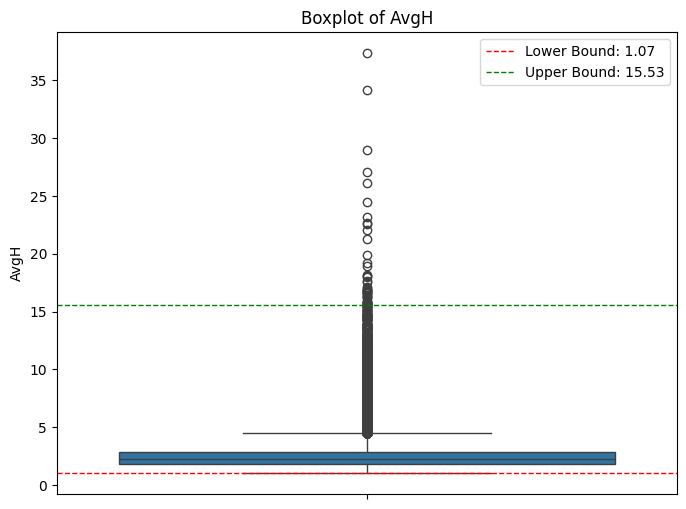

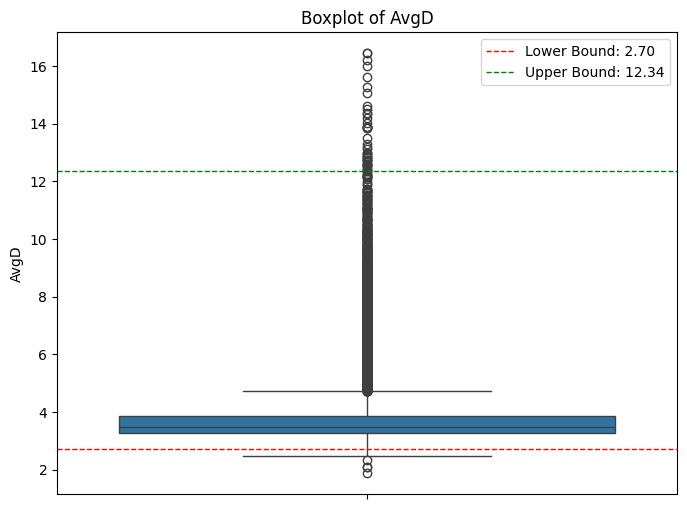

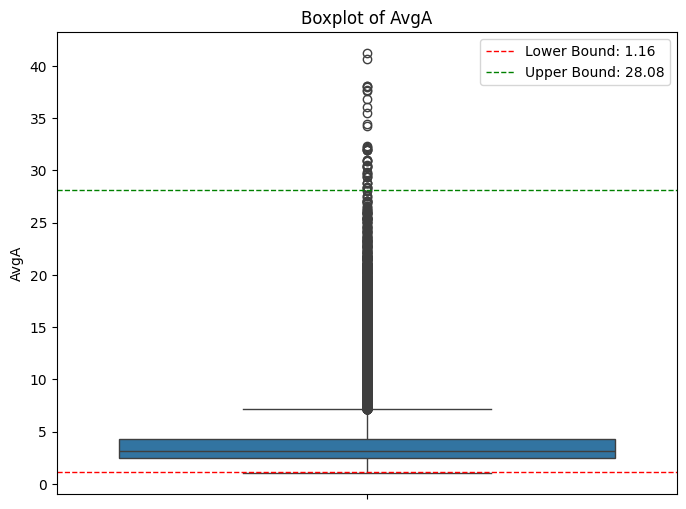

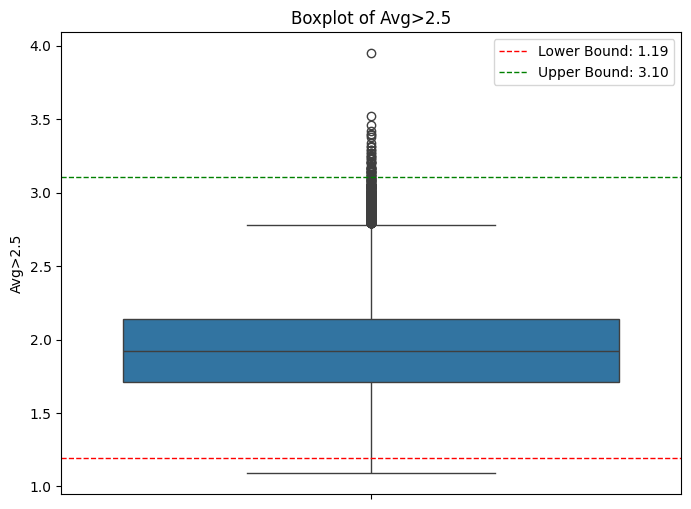

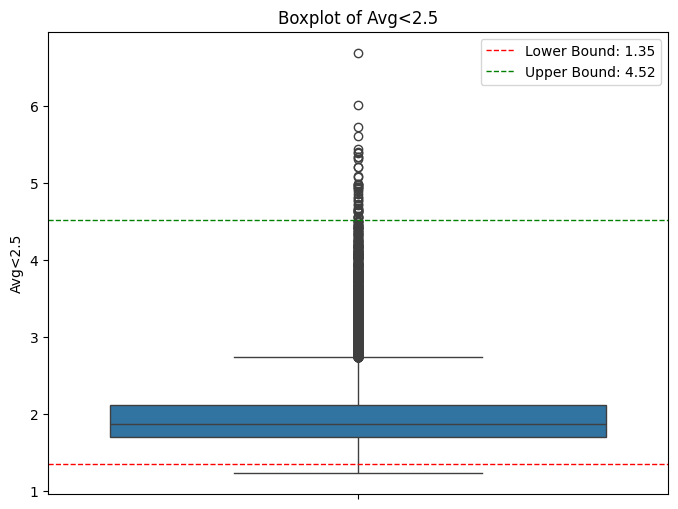

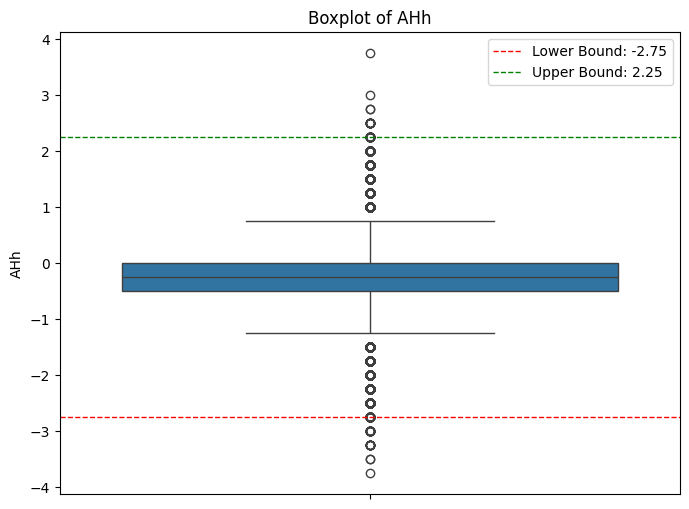

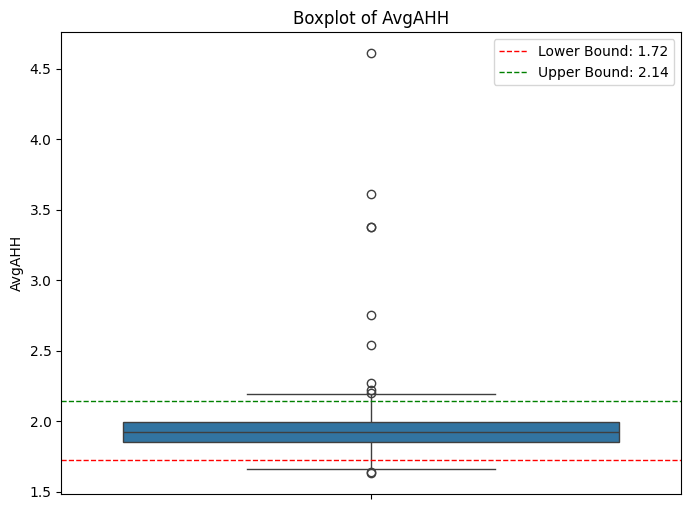

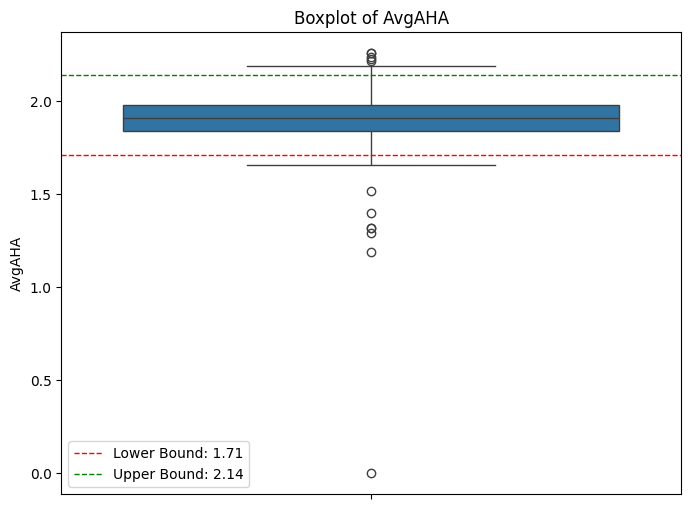

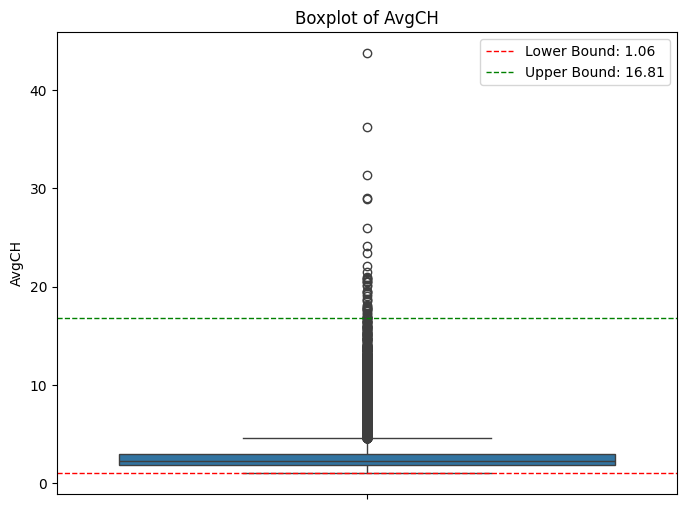

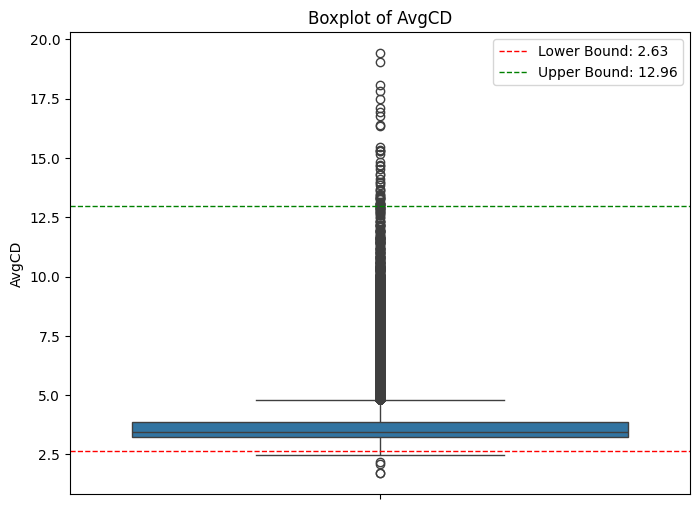

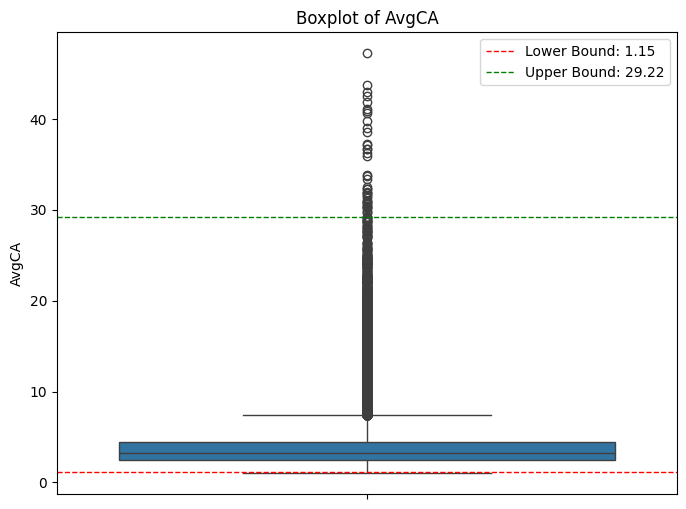

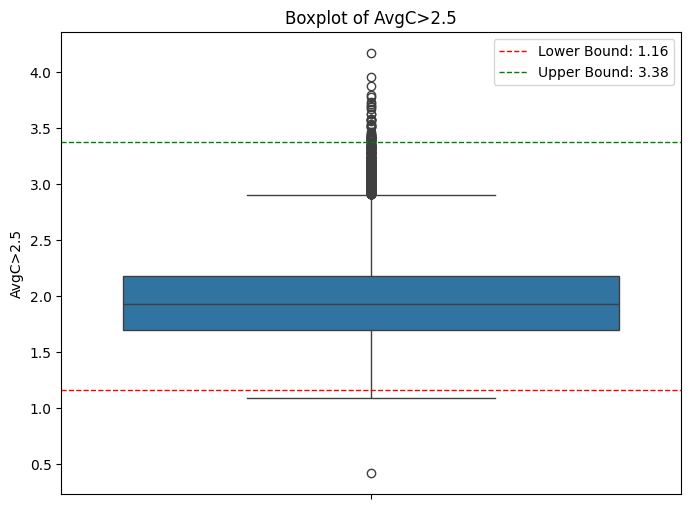

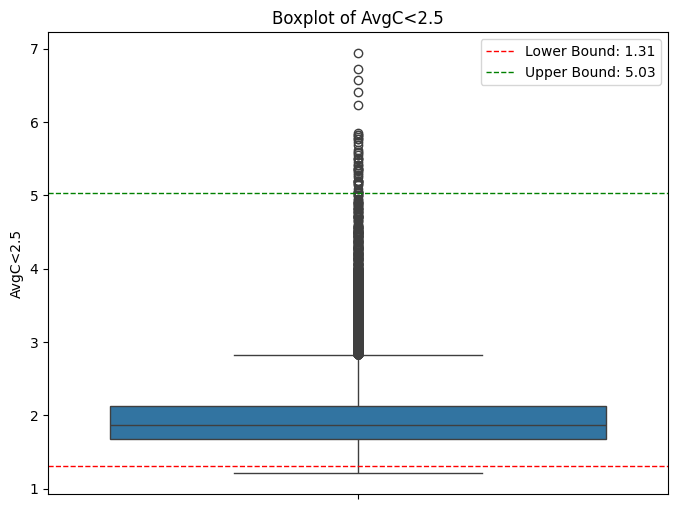

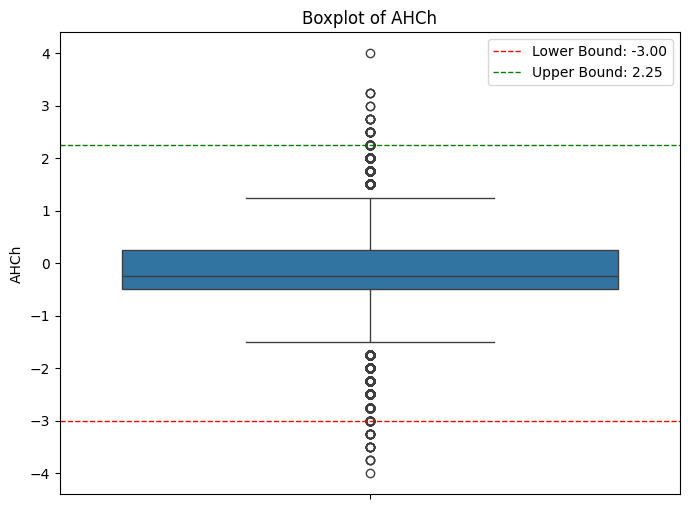

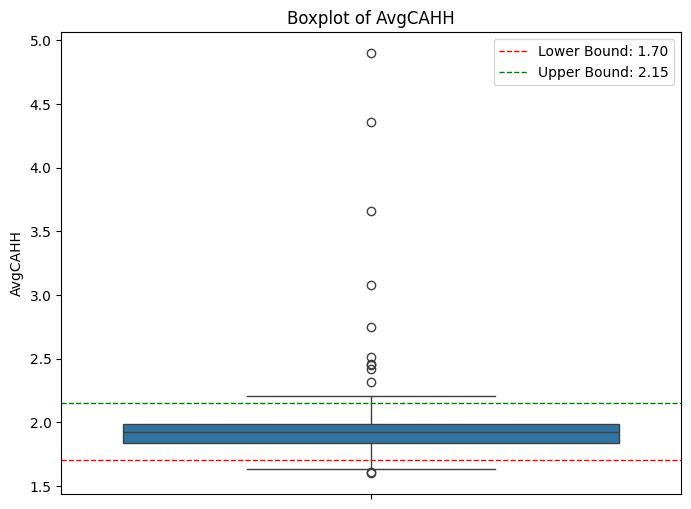

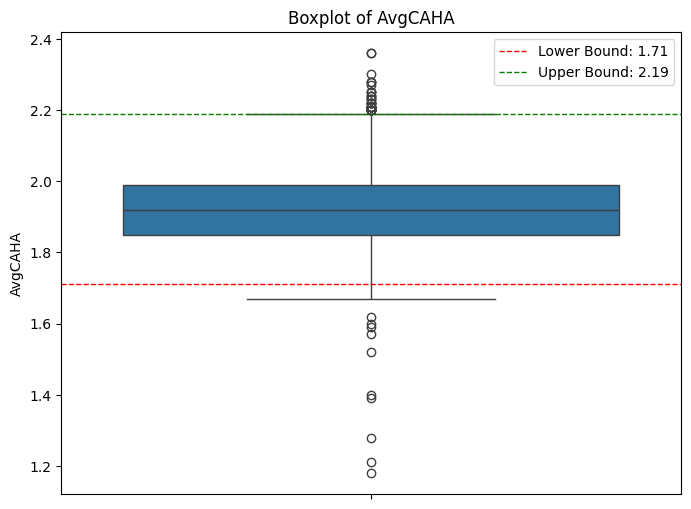

In [65]:

# Checking outliers (boxplots)
for column in data_merged[['AvgH',	'AvgD',	'AvgA',	'Avg>2.5',	'Avg<2.5',	'AHh',
                           'AvgAHH',	'AvgAHA',	'AvgCH',	'AvgCD',	'AvgCA',
                           'AvgC>2.5',	'AvgC<2.5',	'AHCh',	'AvgCAHH',	'AvgCAHA'	]].select_dtypes(include=np.number).columns:

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_merged[column])
    plt.title(f'Boxplot of {column}')

    # Calculate Q1, Q99
    Q1 = data_merged[column].quantile(0.001)
    Q99 = data_merged[column].quantile(0.999)

    # Add lines for lower and upper bounds
    plt.axhline(Q1, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {Q1:.2f}')
    plt.axhline(Q99, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {Q99:.2f}')
    plt.legend()

    plt.show()

Some Odds cannot have values below 0. I will check these and fix the values - there are the C values for each, which are odds right before the match. Usually at least one of the odds is correct - I will just copy it.

In [66]:
pd.set_option('display.max_columns', None)

columns_to_check = ['AvgH', 'AvgD', 'AvgA', 'Avg>2.5', 'Avg<2.5',
                   'AvgAHH', 'AvgAHA', 'AvgCH', 'AvgCD', 'AvgCA',
                   'AvgC>2.5', 'AvgC<2.5', 'AvgCAHH', 'AvgCAHA']

# Filter rows where any of the specified columns have values less than 1
filtered_data = data_merged[(data_merged[columns_to_check] < 1).any(axis=1)]

display(filtered_data)

pd.reset_option('display.max_columns')

# fixing the values (copying the AvgC if Avg not correct and vise versa)
data_merged.loc[(data_merged.index == 259) & (data_merged['Div'] == 'D1'), 'AvgC>2.5'] = data_merged.loc[(data_merged.index == 259) & (data_merged['Div'] == 'D1'), 'Avg>2.5']
data_merged.loc[(data_merged.index == 2352) & (data_merged['Div'] == 'D2'), 'AvgAHA'] = data_merged.loc[(data_merged.index == 259) & (data_merged['Div'] == 'D1'), 'AvgCAHA']


Div        Date   Time        HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  \
259   D1  01/06/2020  19:30         FC Koln  RB Leipzig     2     4   A   1.0   
2352  D2  06/03/2021  12:00  Greuther Furth      Bochum     1     2   A   1.0   

      HTAG HTR    HS    AS  HST  AST    HF    AF   HC   AC   HY   AY   HR  \
259    2.0   A   7.0  19.0  5.0  8.0  16.0   7.0  4.0  7.0  2.0  1.0  0.0   
2352   1.0   D  12.0   9.0  3.0  3.0  19.0  10.0  9.0  3.0  1.0  2.0  0.0   

       AR  AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  \
259   0.0  5.54  4.61  1.54     1.41     2.85  1.0    2.01    1.85   5.72   
2352  0.0  2.55  3.36  2.66     1.77     2.03  0.0    1.95    0.00   2.56   

      AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
259    4.72   1.51      0.42      2.83   1.0     2.07     1.81   1920        1  
2352   3.27   2.73      1.70      2.12   0.0     1.87     1.97   2021        1

**Checking if some values are correct (if AS/HS < AST/HST) + fixing the values**
A team can not have more shots on target than actual shots - checking inconsistencies in the dataset.

In [67]:
# checking if there are any games with less shots than shots on target (wrong)
pd.set_option('display.max_columns', None)
display(data_merged[data_merged['HS'] < data_merged['HST']])
display(data_merged[data_merged['AS'] < data_merged['AST']])
pd.reset_option('display.max_columns')

# fixing the values from real data
data_merged.loc[(data_merged.index == 5219) & (data_merged['Div'] == 'E1'), 'HS'] = 20
data_merged.loc[(data_merged.index == 768) & (data_merged['Div'] == 'E0'), 'AS'] = 18
data_merged.loc[(data_merged.index == 1718) & (data_merged['Div'] == 'SC1'), 'AS'] = 15
data_merged.loc[(data_merged.index == 2142) & (data_merged['Div'] == 'SC1'), 'AS'] = 11
data_merged.loc[(data_merged.index == 7584) & (data_merged['Div'] == 'E2'), 'AS'] = 22
data_merged.loc[(data_merged.index == 4625) & (data_merged['Div'] == 'SP2'), 'AS'] = 15

Div        Date   Time HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
5219  E1  10/11/2024  15:00  Burnley  Swansea     1     0   H   0.0   0.0   D   

       HS   AS  HST  AST    HF    AF   HC   AC   HY   AY   HR   AR  AvgH  \
5219  2.0  9.0  7.0  4.0  13.0  12.0  5.0  1.0  1.0  3.0  0.0  0.0  1.93   

      AvgD  AvgA  Avg>2.5  Avg<2.5  AHh  AvgAHH  AvgAHA  AvgCH  AvgCD  AvgCA  \
5219  3.43  4.06     2.23     1.65 -0.5    1.93    1.91   1.97   3.36   4.02   

      AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  Over2.5  
5219      2.27      1.63  -0.5     1.98     1.87   2425        0

Div        Date   Time     HomeTeam        AwayTeam  FTHG  FTAG FTR  \
768    E0  15/08/2021  14:00    Newcastle        West Ham     2     4   A   
7584   E2  15/04/2023  15:00   Accrington  Fleetwood Town     2     5   A   
1718  SC1  25/02/2022  19:45     Hamilton     Inverness C     1     1   D   
2142  SC1  24/08/2024  15:00  Airdrie Utd     Queens Park     0     2   A   
4625  SP2  07/09/2024  17:30       Huesca          Burgos     0     1   A   

      HTHG  HTAG HTR    HS   AS  HST  AST    HF    AF   HC   AC   HY   AY  \
768    2.0   1.0   H  17.0  8.0  3.0  9.0   4.0   3.0  7.0  6.0  1.0  0.0   
7584   0.0   2.0   A  15.0  2.0  3.0  6.0  14.0  15.0  5.0  6.0  2.0  4.0   
1718   1.0   1.0   D   9.0  5.0  4.0  7.0  12.0  18.0  4.0  4.0  1.0  2.0   
2142   0.0   2.0   A  11.0  2.0  2.0  4.0  14.0  12.0  6.0  1.0  3.0  2.0   
4625   0.0   0.0   D  12.0  5.0  1.0  7.0  10.0   9.0  4.0  4.0  5.0  2.0   

       HR   AR  AvgH  AvgD  AvgA  Avg>2.5  Avg<2.5   AHh  AvgAHH  AvgAHA  \
768   0.0  0.0  3.20  3.51  2.26     1.95     1.90  0.25    1.92    1.96   
7584  1.0  0.0  2.54  3.20  2.81     2.11     1.70  0.00    1.80    1.99   
1718  0.0  0.0  2.55  3.06  2.80     2.27     1.59  0.00    1.80    2.00   
2142  0.0  1.0  2.23  3.22  3.09     1.88     1.86 -0.25    1.92    1.85   
4625  1.0  0.0  2.32  3.03  3.26     2.39     1.55 -0.25    1.97    1.85   

      AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA Season  \
768    3.36   3.50   2.19      1.88      1.95  0.25     2.00     1.89   2122   
7584   2.39   3.16   3.05      2.26      1.61 -0.25     2.03     1.78   2223   
1718   2.49   3.05   2.87      2.25      1.60  0.00     1.78     2.03   2122   
2142   2.33   3.25   2.91      1.83      1.91 -0.25     2.01     1.78   2425   
4625   2.12   2.96   3.86      2.48      1.52 -0.25     1.80     2.04   2425   

      Over2.5  
768         1  
7584        1  
1718        0  
2142        0  
4625        0

**The values should now be as correct as they can be.**

### **2.5 Creating new values for teams**

**Checking whetether there are any not standardized team names**

In [68]:
for country in countries:
    df_name = f'data_{country}'
    if df_name in globals():
        # Combine HomeTeam and AwayTeam columns and get value counts
        team_counts = pd.concat([globals()[df_name]['HomeTeam'], globals()[df_name]['AwayTeam']]).value_counts()
        # Sort the counts alphabetically by team name
        team_counts = team_counts.sort_values()
        print(f'Team counts in {country}:')
        display(team_counts)
    else:
        print(f'Dataset for {country} not found. Skipping.')

Team counts in belgium:


RWD Molenbeek           36
Dender                  40
Mouscron                63
Waasland-Beveren        63
Seraing                 68
Beerschot VA           104
Westerlo               113
Oostende               131
Waregem                131
St. Gilloise           148
Eupen                  167
Oud-Heverlee Leuven    182
Kortrijk               203
Charleroi              207
Cercle Brugge          207
St Truiden             207
Standard               210
Anderlecht             211
Antwerp                211
Mechelen               211
Club Brugge            211
Gent                   212
Genk                   212
Name: count, dtype: int64

Team counts in england:


Macclesfield      37
Chesterfield      46
Bromley           46
Southend          81
Wrexham           92
                ... 
Reading          276
Hull             276
Middlesbrough    276
Preston          276
QPR              276
Name: count, Length: 100, dtype: int64

Team counts in france:


Orleans            28
Le Mans            28
Martigues          34
Red Star           34
Concarneau         38
Chateauroux        66
Chambly            66
Nancy             104
Laval             110
Annecy            110
Quevilly Rouen    114
Dijon             142
Niort             142
Nimes             142
Sochaux           142
Bastia            148
Dunkerque         148
Valenciennes      179
Bordeaux          179
Pau FC            186
Paris SG          209
Strasbourg        209
Nice              210
Monaco            210
Montpellier       210
Clermont          210
Marseille         210
Lyon              210
Brest             210
Lorient           210
Nantes            210
Lille             210
Metz              210
Toulouse          210
Lens              210
Reims             210
Le Havre          210
Rennes            210
Troyes            213
Rodez             213
St Etienne        214
Guingamp          214
Auxerre           214
Paris FC          214
Caen              214
Grenoble          214
Amiens            214
Angers            214
Ajaccio           214
Name: count, dtype: int64

Team counts in germany:


Wurzburger Kickers     34
Ingolstadt             34
Ulm                    34
Preußen Münster        34
Elversberg             68
Wehen                  68
Dresden                68
Kaiserslautern        102
Magdeburg             102
Hansa Rostock         102
Erzgebirge Aue        102
Osnabruck             102
Sandhausen            136
Bielefeld             136
Braunschweig          136
Regensburg            170
Schalke 04            204
Paderborn             204
Mainz                 204
Bayern Munich         204
Werder Bremen         204
Dortmund              204
Freiburg              204
Leverkusen            204
Union Berlin          204
FC Koln               204
Augsburg              204
Fortuna Dusseldorf    204
Hoffenheim            204
Wolfsburg             204
M'gladbach            204
Ein Frankfurt         204
Karlsruhe             204
Hamburg               204
Nurnberg              204
Hannover              204
St Pauli              204
Holstein Kiel         204
Darmstadt             204
Heidenheim            204
Bochum                204
Stuttgart             204
Hertha                204
Greuther Furth        204
RB Leipzig            204
Name: count, dtype: int64

Team counts in greece:


Panionios            33
Kifisia              33
Xanthi               33
Athens Kallithea     35
Larisa               66
Ionikos              66
Apollon              66
Levadeiakos          68
Panserraikos         68
Giannina            135
Atromitos           197
Panetolikos         200
OFI Crete           200
Asteras Tripolis    200
Volos NFC           203
Lamia               203
AEK                 212
Panathinaikos       212
Olympiakos          212
Aris                212
PAOK                212
Name: count, dtype: int64

Team counts in italy:


Trapani            38
Livorno            38
Alessandria        38
FeralpiSalo        38
Cesena             38
Lecco              38
Mantova            38
Carrarese          38
Juve Stabia        76
Vicenza            76
Pescara            76
Catanzaro          76
Virtus Entella     76
Chievo             76
Crotone           114
Pordenone         114
Modena            114
Reggina           114
Ternana           114
Palermo           114
Reggiana          114
Bari              114
Sudtirol          114
Perugia           114
Como              152
Spal              152
Benevento         152
Ascoli            190
Monza             190
Parma             228
Udinese           228
Fiorentina        228
Venezia           228
Cittadella        228
Cosenza           228
Pisa              228
Spezia            228
Empoli            228
Frosinone         228
Cremonese         228
Brescia           228
Napoli            228
Salernitana       228
Lecce             228
Juventus          228
Lazio             228
Atalanta          228
Genoa             228
Verona            228
Torino            228
Sampdoria         228
Roma              228
Milan             228
Bologna           228
Sassuolo          228
Inter             228
Cagliari          228
Name: count, dtype: int64

Team counts in netherlands:


NAC Breda            34
VVV Venlo            60
Den Haag             60
Excelsior            68
Cambuur              68
Volendam             68
Almere City          68
FC Emmen             94
Willem II           128
Go Ahead Eagles     136
Nijmegen            136
Zwolle              162
Heracles            162
Groningen           162
Vitesse             162
AZ Alkmaar          195
Ajax                195
Feyenoord           195
Utrecht             195
Heerenveen          196
Sparta Rotterdam    196
PSV Eindhoven       196
Twente              196
For Sittard         196
Waalwijk            196
Name: count, dtype: int64

Team counts in portugal:


AVS                34
Setubal            34
Aves               34
Nacional           68
Chaves             68
Estrela            68
Belenenses        102
Farense           102
Casa Pia          102
Tondela           102
Vizela            102
Pacos Ferreira    136
Arouca            136
Maritimo          136
Estoril           136
Moreirense        170
Rio Ave           170
Portimonense      170
Santa Clara       170
Sp Braga          204
Famalicao         204
Guimaraes         204
Porto             204
Sp Lisbon         204
Gil Vicente       204
Boavista          204
Benfica           204
Name: count, dtype: int64

Team counts in scotland:


FC Edinburgh       36
Brechin            49
Spartans           72
Cowdenbeath        85
Bonnyrigg Rose    108
Albion Rvs        120
Kelty Hearts      144
Edinburgh City    157
Annan Athletic    193
Stranraer         193
Partick           193
Peterhead         193
Queens Park       194
Airdrie Utd       194
Dumbarton         194
Clyde             194
Cove Rangers      194
Falkirk           194
Montrose          194
Stirling          194
Forfar            194
East Fife         194
Stenhousemuir     194
Elgin             194
Arbroath          197
Inverness C       198
Ayr               198
Morton            199
Raith Rvs         199
Alloa             199
Queen of Sth      199
Dunfermline       199
Dundee            204
Hearts            209
Hamilton          212
Dundee United     216
Livingston        218
Kilmarnock        218
St Johnstone      219
Rangers           219
Hibernian         220
Celtic            220
St Mirren         220
Motherwell        220
Ross County       220
Aberdeen          220
Name: count, dtype: int64

Team counts in spain:


Cordoba            42
Logrones           42
Numancia           42
Extremadura UD     42
Sociedad B         42
Sabadell           42
Eldense            84
Amorebieta         84
Castellon          84
Ibiza              84
Villarreal B       84
Andorra            84
Ferrol             84
La Coruna          84
Fuenlabrada       126
Alcorcon          168
Ponferradina      168
Lugo              168
Santander         168
Burgos            168
Albacete          210
Cartagena         210
Malaga            210
Barcelona         228
Villarreal        228
Sociedad          228
Betis             228
Ath Madrid        228
Valencia          228
Getafe            228
Real Madrid       228
Osasuna           228
Sevilla           228
Ath Bilbao        228
Celta             228
Alaves            232
Mallorca          232
Granada           236
Espanol           236
Cadiz             236
Vallecano         236
Valladolid        236
Elche             240
Girona            240
Levante           240
Las Palmas        244
Eibar             244
Leganes           244
Almeria           244
Huesca            248
Oviedo            252
Zaragoza          252
Mirandes          252
Sp Gijon          252
Tenerife          252
Name: count, dtype: int64

Team counts in turkey:


Eyupspor             36
Umraniyespor         36
Bodrumspor           36
Altay                38
Pendikspor           38
Erzurum BB           40
Istanbulspor         74
Denizlispor          74
Giresunspor          74
Samsunspor           74
Genclerbirligi       74
Yeni Malatyaspor    112
Goztep              148
Ankaragucu          148
Ad. Demirspor       148
Karagumruk          152
Rizespor            186
Hatayspor           188
Gaziantep           222
Galatasaray         222
Antalyaspor         222
Trabzonspor         222
Buyuksehyr          222
Alanyaspor          222
Besiktas            222
Konyaspor           222
Kayserispor         222
Sivasspor           222
Fenerbahce          222
Kasimpasa           222
Name: count, dtype: int64

**All the team names are standardized**



---



**Checking the types  of columns**

In [69]:
# Checking types - mainly for date types, other will be encoded and changed later
data_merged['Date'] = pd.to_datetime(data_merged['Date'], format='%d/%m/%Y')
display(data_merged.dtypes)
data_merged

Div                 object
Date        datetime64[ns]
Time                object
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
FTR                 object
HTHG               float64
HTAG               float64
HTR                 object
HS                 float64
AS                 float64
HST                float64
AST                float64
HF                 float64
AF                 float64
HC                 float64
AC                 float64
HY                 float64
AY                 float64
HR                 float64
AR                 float64
AvgH               float64
AvgD               float64
AvgA               float64
Avg>2.5            float64
Avg<2.5            float64
AHh                float64
AvgAHH             float64
AvgAHA             float64
AvgCH              float64
AvgCD              float64
AvgCA              float64
AvgC>2.5           float64
AvgC<2.5           float64
AHCh               float64
AvgCAHH            float64
AvgCAHA            float64
Season              object
Over2.5              int64
dtype: object

Div       Date   Time          HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0     B1 2019-07-26  19:30              Genk     Kortrijk     2     1   H   
1     B1 2019-07-27  17:00     Cercle Brugge     Standard     0     2   A   
2     B1 2019-07-27  19:00        St Truiden     Mouscron     0     1   A   
3     B1 2019-07-27  19:00           Waregem     Mechelen     0     2   A   
4     B1 2019-07-27  19:30  Waasland-Beveren  Club Brugge     1     3   A   
...   ..        ...    ...               ...          ...   ...   ...  ..   
2165  T1 2025-05-31  14:00          Rizespor    Hatayspor     5     2   H   
2166  T1 2025-05-31  17:00     Ad. Demirspor    Gaziantep     2     2   D   
2167  T1 2025-05-31  17:00        Alanyaspor    Sivasspor     2     0   H   
2168  T1 2025-06-01  17:00        Bodrumspor     Besiktas     0     4   A   
2169  T1 2025-06-01  17:00        Samsunspor  Kayserispor     2     1   H   

      HTHG  HTAG  ... AvgCH  AvgCD  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  \
0      0.0   1.0  ...  1.43   4.80   6.51      1.49      2.53 -1.25     1.96   
1      0.0   0.0  ...  3.71   3.70   1.92      1.63      2.24  0.50     1.89   
2      0.0   1.0  ...  2.08   3.50   3.39      1.72      2.10 -0.25     1.83   
3      0.0   1.0  ...  2.66   3.53   2.48      1.61      2.28  0.25     1.72   
4      1.0   1.0  ...  9.44   5.89   1.27      1.43      2.73  1.50     2.11   
...    ...   ...  ...   ...    ...    ...       ...       ...   ...      ...   
2165   1.0   0.0  ...  1.22   7.30   9.11      1.16      5.03 -2.00     1.86   
2166   2.0   1.0  ...  5.88   5.22   1.41      1.23      3.95  1.50     1.81   
2167   1.0   0.0  ...  1.83   4.11   3.62      1.42      2.79 -0.50     1.85   
2168   0.0   3.0  ...  4.52   4.16   1.66      1.54      2.41  0.75     2.01   
2169   0.0   0.0  ...  1.25   5.77  10.39      1.42      2.76 -1.75     1.93   

      AvgCAHA  Season  Over2.5  
0        1.87    1920        1  
1        1.94    1920        0  
2        2.02    1920        0  
3        2.15    1920        0  
4        1.74    1920        1  
...       ...     ...      ...  
2165     1.97    2425        1  
2166     2.01    2425        1  
2167     1.99    2425        0  
2168     1.82    2425        1  
2169     1.90    2425        1  

[42536 rows x 41 columns]

#### **2.5.1 Creating new values**
I will be creating some new columns for our model, since there is a lot of possibilites I will do it in blocks

1) Adding simple one match computations: `TotalGoals`
2) Adding rolling averages:
- `avg_goals_scored_home_5` =	Average home goals by this team in last 5 home matches - Group by `HomeTeam`, rolling mean of `FTHG`
- `avg_goals_conceded_home_5` =	Average goals conceded at home - Group by `HomeTeam`, rolling mean of `FTAG`
- `avg_goals_scored_away_5`	= Average away goals scored	Group by `AwayTeam` - rolling mean of `FTAG`
- `avg_goals_conceded_away_5`	= Average away goals conceded	Group by `AwayTeam` - rolling mean of `FTHG`
- `avg_total_goals_5` = Average total goals in last 5 matches (home + away) -
Group by team across all matches
- and others
3) Previous performance (win streak, % of last x won)
4) Previous accomplishment of our goal (<2.5 goals)
5) Last match context (last match goals scored/conceded, home advantage score...)


**I always check whether the values are correct.**

In [70]:
# 1) TotalGoals = total goals scored in the match
data_merged['TotalGoals'] = data_merged['FTHG'] + data_merged['FTAG']
data_merged['HTTotalGoals'] = data_merged['HTHG'] + data_merged['HTAG']
data_merged

Div       Date   Time          HomeTeam     AwayTeam  FTHG  FTAG FTR  \
0     B1 2019-07-26  19:30              Genk     Kortrijk     2     1   H   
1     B1 2019-07-27  17:00     Cercle Brugge     Standard     0     2   A   
2     B1 2019-07-27  19:00        St Truiden     Mouscron     0     1   A   
3     B1 2019-07-27  19:00           Waregem     Mechelen     0     2   A   
4     B1 2019-07-27  19:30  Waasland-Beveren  Club Brugge     1     3   A   
...   ..        ...    ...               ...          ...   ...   ...  ..   
2165  T1 2025-05-31  14:00          Rizespor    Hatayspor     5     2   H   
2166  T1 2025-05-31  17:00     Ad. Demirspor    Gaziantep     2     2   D   
2167  T1 2025-05-31  17:00        Alanyaspor    Sivasspor     2     0   H   
2168  T1 2025-06-01  17:00        Bodrumspor     Besiktas     0     4   A   
2169  T1 2025-06-01  17:00        Samsunspor  Kayserispor     2     1   H   

      HTHG  HTAG  ...  AvgCA  AvgC>2.5  AvgC<2.5  AHCh  AvgCAHH  AvgCAHA  \
0      0.0   1.0  ...   6.51      1.49      2.53 -1.25     1.96     1.87   
1      0.0   0.0  ...   1.92      1.63      2.24  0.50     1.89     1.94   
2      0.0   1.0  ...   3.39      1.72      2.10 -0.25     1.83     2.02   
3      0.0   1.0  ...   2.48      1.61      2.28  0.25     1.72     2.15   
4      1.0   1.0  ...   1.27      1.43      2.73  1.50     2.11     1.74   
...    ...   ...  ...    ...       ...       ...   ...      ...      ...   
2165   1.0   0.0  ...   9.11      1.16      5.03 -2.00     1.86     1.97   
2166   2.0   1.0  ...   1.41      1.23      3.95  1.50     1.81     2.01   
2167   1.0   0.0  ...   3.62      1.42      2.79 -0.50     1.85     1.99   
2168   0.0   3.0  ...   1.66      1.54      2.41  0.75     2.01     1.82   
2169   0.0   0.0  ...  10.39      1.42      2.76 -1.75     1.93     1.90   

      Season  Over2.5  TotalGoals  HTTotalGoals  
0       1920        1           3           1.0  
1       1920        0           2           0.0  
2       1920        0           1           1.0  
3       1920        0           2           1.0  
4       1920        1           4           2.0  
...      ...      ...         ...           ...  
2165    2425        1           7           1.0  
2166    2425        1           4           3.0  
2167    2425        0           2           1.0  
2168    2425        1           4           3.0  
2169    2425        1           3           0.0  

[42536 rows x 43 columns]

In [71]:
# Sort data by Date to ensure correct rolling calculations
data_merged = data_merged.sort_values(by='Date')

# 2) Adding rolling averages

# Calculate rolling averages for home team
data_merged['avg_goals_scored_home_5'] = data_merged.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_goals_conceded_home_5'] = data_merged.groupby('HomeTeam')['FTAG'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_shots_home_5'] = data_merged.groupby('HomeTeam')['HS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_shots_on_target_home_5'] = data_merged.groupby('HomeTeam')['HST'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_fouls_home_5'] = data_merged.groupby('HomeTeam')['HF'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_corners_home_5'] = data_merged.groupby('HomeTeam')['HC'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_yellow_cards_home_5'] = data_merged.groupby('HomeTeam')['HY'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_red_cards_home_5'] = data_merged.groupby('HomeTeam')['HR'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)


# Calculate rolling averages for away team
data_merged['avg_goals_scored_away_5'] = data_merged.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_goals_conceded_away_5'] = data_merged.groupby('AwayTeam')['FTHG'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_shots_away_5'] = data_merged.groupby('AwayTeam')['AS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_shots_on_target_away_5'] = data_merged.groupby('AwayTeam')['AST'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_fouls_away_5'] = data_merged.groupby('AwayTeam')['AF'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_corners_away_5'] = data_merged.groupby('AwayTeam')['AC'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_yellow_cards_away_5'] = data_merged.groupby('AwayTeam')['AY'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_red_cards_away_5'] = data_merged.groupby('AwayTeam')['AR'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

# Calculate rolling average for total goals (home and away combined)
data_merged['avg_total_goals_home_5'] = data_merged.groupby('HomeTeam')['TotalGoals'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['avg_total_goals_away_5'] = data_merged.groupby('AwayTeam')['TotalGoals'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)




In [72]:
# 3) Previous performance (win streak, % of last x won)
data_merged['win_rate_home_5'] = data_merged.groupby('HomeTeam')['FTR'].transform(lambda x: (x == 'H').rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['win_rate_away_5'] = data_merged.groupby('AwayTeam')['FTR'].transform(lambda x: (x == 'A').rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

pd.set_option('display.max_rows', None)
display(data_merged[data_merged['HomeTeam'] == 'Arsenal'])
pd.reset_option('display.max_rows')

Div       Date   Time HomeTeam          AwayTeam  FTHG  FTAG FTR  HTHG  \
10    E0 2019-08-17  12:30  Arsenal           Burnley     2     1   H   1.0   
39    E0 2019-09-01  16:30  Arsenal         Tottenham     2     2   D   1.0   
58    E0 2019-09-22  16:30  Arsenal       Aston Villa     3     2   H   0.0   
76    E0 2019-10-06  14:00  Arsenal       Bournemouth     1     0   H   1.0   
97    E0 2019-10-27  16:30  Arsenal    Crystal Palace     2     2   D   2.0   
101   E0 2019-11-02  15:00  Arsenal            Wolves     1     1   D   1.0   
121   E0 2019-11-23  15:00  Arsenal       Southampton     2     2   D   1.0   
149   E0 2019-12-05  20:15  Arsenal          Brighton     1     2   A   0.0   
168   E0 2019-12-15  16:30  Arsenal          Man City     0     3   A   0.0   
196   E0 2019-12-29  14:00  Arsenal           Chelsea     1     2   A   1.0   
207   E0 2020-01-01  20:00  Arsenal        Man United     2     0   H   2.0   
220   E0 2020-01-18  15:00  Arsenal  Sheffield United     1     1   D   1.0   
257   E0 2020-02-16  16:30  Arsenal         Newcastle     4     0   H   0.0   
268   E0 2020-02-23  16:30  Arsenal           Everton     3     2   H   2.0   
279   E0 2020-03-07  15:00  Arsenal          West Ham     1     0   H   0.0   
314   E0 2020-07-01  18:00  Arsenal           Norwich     4     0   H   2.0   
332   E0 2020-07-07  20:15  Arsenal         Leicester     1     1   D   1.0   
354   E0 2020-07-15  20:15  Arsenal         Liverpool     2     1   H   2.0   
370   E0 2020-07-26  16:00  Arsenal           Watford     3     2   H   3.0   
391   E0 2020-09-19  20:00  Arsenal          West Ham     2     1   H   1.0   
414   E0 2020-10-04  14:00  Arsenal  Sheffield United     2     1   H   0.0   
435   E0 2020-10-25  19:15  Arsenal         Leicester     0     1   A   0.0   
457   E0 2020-11-08  19:15  Arsenal       Aston Villa     0     3   A   0.0   
475   E0 2020-11-29  19:15  Arsenal            Wolves     1     2   A   1.0   
495   E0 2020-12-13  19:15  Arsenal           Burnley     0     1   A   0.0   
499   E0 2020-12-16  18:00  Arsenal       Southampton     1     1   D   0.0   
520   E0 2020-12-26  17:30  Arsenal           Chelsea     3     1   H   2.0   
549   E0 2021-01-14  20:00  Arsenal    Crystal Palace     0     0   D   0.0   
558   E0 2021-01-18  20:00  Arsenal         Newcastle     3     0   H   0.0   
579   E0 2021-01-30  17:30  Arsenal        Man United     0     0   D   0.0   
611   E0 2021-02-14  16:30  Arsenal             Leeds     4     2   H   3.0   
624   E0 2021-02-21  16:30  Arsenal          Man City     0     1   A   0.0   
663   E0 2021-03-14  16:30  Arsenal         Tottenham     2     1   H   1.0   
673   E0 2021-04-03  20:00  Arsenal         Liverpool     0     3   A   0.0   
693   E0 2021-04-18  13:30  Arsenal            Fulham     1     1   D   0.0   
700   E0 2021-04-23  20:00  Arsenal           Everton     0     1   A   0.0   
725   E0 2021-05-09  19:00  Arsenal         West Brom     3     1   H   2.0   
750   E0 2021-05-23  16:00  Arsenal          Brighton     2     0   H   0.0   
778   E0 2021-08-22  16:30  Arsenal           Chelsea     0     2   A   0.0   
791   E0 2021-09-11  15:00  Arsenal           Norwich     1     0   H   0.0   
818   E0 2021-09-26  16:30  Arsenal         Tottenham     3     1   H   3.0   
839   E0 2021-10-18  20:00  Arsenal    Crystal Palace     2     2   D   1.0   
840   E0 2021-10-22  20:00  Arsenal       Aston Villa     3     1   H   2.0   
866   E0 2021-11-07  14:00  Arsenal           Watford     1     0   H   0.0   
880   E0 2021-11-27  12:30  Arsenal         Newcastle     2     0   H   0.0   
911   E0 2021-12-11  15:00  Arsenal       Southampton     3     0   H   2.0   
922   E0 2021-12-15  20:00  Arsenal          West Ham     2     0   H   0.0   
943   E0 2022-01-01  12:30  Arsenal          Man City     1     2   A   1.0   
970   E0 2022-01-23  14:00  Arsenal           Burnley     0     0   D   0.0   
995   E0 2022-02-19  15:00  Arsenal         Brentford  

In [ ]:
# 4) Accomplishment of our goal in the last 5 matches (% of last 5 matches for each team, where there were >2.5 goals scored)
data_merged['Over2.5_home_5'] = data_merged.groupby('HomeTeam')['Over2.5'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['Over2.5_away_5'] = data_merged.groupby('AwayTeam')['Over2.5'].transform(lambda x: x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(data_merged[data_merged['AwayTeam'] == 'Arsenal'])
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Div       Date   Time          HomeTeam AwayTeam  FTHG  FTAG FTR  HTHG  \
8     E0 2019-08-11  14:00         Newcastle  Arsenal     0     1   A   0.0   
26    E0 2019-08-24  17:30         Liverpool  Arsenal     3     1   H   1.0   
48    E0 2019-09-15  16:30           Watford  Arsenal     2     2   D   0.0   
69    E0 2019-09-30  20:00        Man United  Arsenal     1     1   D   1.0   
89    E0 2019-10-21  20:00  Sheffield United  Arsenal     1     0   H   1.0   
116   E0 2019-11-09  17:30         Leicester  Arsenal     2     0   H   0.0   
136   E0 2019-12-01  14:00           Norwich  Arsenal     2     2   D   2.0   
159   E0 2019-12-09  20:00          West Ham  Arsenal     1     3   A   1.0   
170   E0 2019-12-21  12:30           Everton  Arsenal     0     0   D   0.0   
181   E0 2019-12-26  15:00       Bournemouth  Arsenal     1     1   D   1.0   
210   E0 2020-01-11  12:30    Crystal Palace  Arsenal     1     1   D   0.0   
234   E0 2020-01-21  20:15           Chelsea  Arsenal     2     2   D   1.0   
248   E0 2020-02-02  14:00           Burnley  Arsenal     0     0   D   0.0   
289   E0 2020-06-17  20:15          Man City  Arsenal     3     0   H   1.0   
293   E0 2020-06-20  15:00          Brighton  Arsenal     2     1   H   0.0   
308   E0 2020-06-25  18:00       Southampton  Arsenal     0     2   A   0.0   
323   E0 2020-07-04  17:30            Wolves  Arsenal     0     2   A   0.0   
347   E0 2020-07-12  16:30         Tottenham  Arsenal     2     1   H   1.0   
367   E0 2020-07-21  20:15       Aston Villa  Arsenal     1     0   H   1.0   
380   E0 2020-09-12  12:30            Fulham  Arsenal     0     3   A   0.0   
407   E0 2020-09-28  20:00         Liverpool  Arsenal     3     1   H   2.0   
420   E0 2020-10-17  17:30          Man City  Arsenal     1     0   H   1.0   
444   E0 2020-11-01  16:30        Man United  Arsenal     0     1   A   0.0   
464   E0 2020-11-22  16:30             Leeds  Arsenal     0     0   D   0.0   
484   E0 2020-12-06  16:30         Tottenham  Arsenal     2     0   H   2.0   
509   E0 2020-12-19  17:30           Everton  Arsenal     2     1   H   2.0   
529   E0 2020-12-29  18:00          Brighton  Arsenal     0     1   A   0.0   
540   E0 2021-01-02  20:00         West Brom  Arsenal     0     4   A   0.0   
567   E0 2021-01-26  20:15       Southampton  Arsenal     1     3   A   1.0   
586   E0 2021-02-02  18:00            Wolves  Arsenal     2     1   H   1.0   
595   E0 2021-02-06  12:30       Aston Villa  Arsenal     1     0   H   1.0   
633   E0 2021-02-28  12:00         Leicester  Arsenal     1     3   A   1.0   
645   E0 2021-03-06  12:30           Burnley  Arsenal     1     1   D   1.0   
668   E0 2021-03-21  15:00          West Ham  Arsenal     3     3   D   3.0   
687   E0 2021-04-11  19:00  Sheffield United  Arsenal     0     3   A   0.0   
713   E0 2021-05-02  14:00         Newcastle  Arsenal     0     2   A   0.0   
729   E0 2021-05-12  20:15           Chelsea  Arsenal     0     1   A   0.0   
747   E0 2021-05-19  19:00    Crystal Palace  Arsenal     1     3   A   0.0   
760   E0 2021-08-13  20:00         Brentford  Arsenal     2     0   H   1.0   
780   E0 2021-08-28  12:30          Man City  Arsenal     5     0   H   3.0   
802   E0 2021-09-18  15:00           Burnley  Arsenal     0     1   A   0.0   
825   E0 2021-10-02  17:30          Brighton  Arsenal     0     0   D   0.0   
850   E0 2021-10-30  12:30         Leicester  Arsenal     0     2   A   0.0   
877   E0 2021-11-20  17:30         Liverpool  Arsenal     4     0   H   1.0   
898   E0 2021-12-02  20:15        Man United  Arsenal     3     2   H   1.0   
908   E0 2021-12-06  20:00           Everton  Arsenal     2     1   H   0.0   
925   E0 2021-12-18  17:30             Leeds  Arsenal     1     4   A   0.0   
930   E0 2021-12-26  15:00           Norwich  Arsenal     0     5   A   0.0   
983   E0 2022-02-10  19:45            Wolves  Arsenal     0     1   A   0.0   
1024  E0 2022-03-06  14:00           Watford  Arsenal  

In [ ]:
# 5) Last match context and Recent trends

# Goal difference in last match
data_merged['gd_last_game_home'] = (data_merged.groupby('HomeTeam')['FTHG'].transform(lambda x: x.shift(1)) - data_merged.groupby('HomeTeam')['FTAG'].transform(lambda x: x.shift(1))).fillna(0)
data_merged['gd_last_game_away'] = (data_merged.groupby('AwayTeam')['FTAG'].transform(lambda x: x.shift(1)) - data_merged.groupby('AwayTeam')['FTHG'].transform(lambda x: x.shift(1))).fillna(0)

# Recent goal trend (change in average goals between last 3 and last 5 matches)
data_merged['recent_goal_trend_home'] = data_merged.groupby('HomeTeam')['TotalGoals'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_goal_trend_away'] = data_merged.groupby('AwayTeam')['TotalGoals'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

# Recent trend for other statistics (change in average between last 3 and last 5 matches)
data_merged['recent_hs_trend_home'] = data_merged.groupby('HomeTeam')['HS'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hs_trend_away'] = data_merged.groupby('AwayTeam')['HS'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_as_trend_home'] = data_merged.groupby('HomeTeam')['AS'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_as_trend_away'] = data_merged.groupby('AwayTeam')['AS'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_hst_trend_home'] = data_merged.groupby('HomeTeam')['HST'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hst_trend_away'] = data_merged.groupby('AwayTeam')['HST'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_ast_trend_home'] = data_merged.groupby('HomeTeam')['AST'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ast_trend_away'] = data_merged.groupby('AwayTeam')['AST'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_hf_trend_home'] = data_merged.groupby('HomeTeam')['HF'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hf_trend_away'] = data_merged.groupby('AwayTeam')['HF'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_af_trend_home'] = data_merged.groupby('HomeTeam')['AF'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_af_trend_away'] = data_merged.groupby('AwayTeam')['AF'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_hc_trend_home'] = data_merged.groupby('HomeTeam')['HC'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hc_trend_away'] = data_merged.groupby('AwayTeam')['HC'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_ac_trend_home'] = data_merged.groupby('HomeTeam')['AC'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ac_trend_away'] = data_merged.groupby('AwayTeam')['AC'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_hy_trend_home'] = data_merged.groupby('HomeTeam')['HY'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hy_trend_away'] = data_merged.groupby('AwayTeam')['HY'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_ay_trend_home'] = data_merged.groupby('HomeTeam')['AY'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ay_trend_away'] = data_merged.groupby('AwayTeam')['AY'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_hr_trend_home'] = data_merged.groupby('HomeTeam')['HR'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_hr_trend_away'] = data_merged.groupby('AwayTeam')['HR'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

data_merged['recent_ar_trend_home'] = data_merged.groupby('HomeTeam')['AR'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ar_trend_away'] = data_merged.groupby('AwayTeam')['AR'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)

# Recent goal trend (change in average goals scored/conceded between last 3 and last 5 matches)
data_merged['recent_fthg_trend_home'] = data_merged.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ftag_trend_home'] = data_merged.groupby('HomeTeam')['FTAG'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_ftag_trend_away'] = data_merged.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)
data_merged['recent_fthg_trend_away'] = data_merged.groupby('AwayTeam')['FTHG'].transform(lambda x: x.rolling(window=3, min_periods=1).mean().shift(1) - x.rolling(window=5, min_periods=1).mean().shift(1)).fillna(0)


data_merged

**All the created columns**
1) - `TotalGoals`, `HTTotalGoals` - For future computations, will later be deleted, because it would be data leakage
<br>


2)
- `avg_goals_scored_home_5` - average number of goals scored by the HomeTeam in their last 5 Home matches
- `avg_goals_conceded_home_5` - average number of goals conceded by the HomeTeam in their last 5 Home matches
- `avg_shots_home_5` - average number of shots by the HomwTeam in their last 5 Home matches
- `avg_shots_on_target_home_5` - average number of shots on target by the HomwTeam in their last 5 Home matches
- `avg_fouls_home_5` - average number of fouls committed by the HomeTeam in their last 5 Home matches
- `avg_corners_home_5` - average number of corners for the HomeTeam in their last 5 Home matches
- `avg_yellow_cards_home_5` - average number of yellow cards received by the HomeTeam in their last 5 Home matches
- `avg_red_cards_home_5` - average number of red cards received by the HomeTeam in their last 5 Home matches

<br>

- `avg_goals_scored_away_5` - average number of goals scored by the AwayTeam in their last 5 Away matches
- `avg_goals_conceded_away_5` - average number of goals conceded by the AwayTeam in their last 5 Away matches
- `avg_shots_away_5` - average number of shots by the HomwTeam in their last 5 Away matches
- `avg_shots_on_target_away_5` - average number of shots on target by the HomwTeam in their last 5 Away matches
- `avg_fouls_away_5` - average number of fouls committed by the AwayTeam in their last 5 Away matches
- `avg_corners_away_5` - average number of corners for the AwayTeam in their last 5 Away matches
- `avg_yellow_cards_away_5` - average number of yellow cards received by the AwayTeam in their last 5 Away matches
- `avg_red_cards_away_5` - average number of red cards received by the AwayTeam in their last 5 Away matches

<br>

- `avg_total_goals_home_5` - average number of goals scored by the HomeTeam in their last 5 matches
- `avg_total_goals_away_5` - average number of goals scored by the AwayTeam in their last 5 matches

<br>

3)
- `win_rate_home_5` - win rate from the last 5 HomeTeam home games
- `win_rate_away_5` - win rate from the last 5 AwayTeam away games

<br>

4)
- `Over2.5_home_5` - rate of games with Over 2.5 goals scored from the last 5 HomeTeam Home matches
- `Over2.5_away_5` - rate of games with Over 2.5 goals scored from the last 5 AwayTeam Away matches

<br>

5)

- `gd_last_game_home` - goal difference from the last HomeTeams Home match
- `gd_last_game_away` - goal difference from the last AwayTeams Away match

<br>

- `recent_goal_trend_home` - change in average goals scored by the HomeTeam in their last 3 and 5 Home matches (last 3 / last 5)
- `recent_goal_trend_away` - change in average goals scored by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hs_trend_home` - change in average shots taken by the HomeTeam in their last 3 and 5 Home matches
- `recent_hs_trend_away` - change in average shots conceded by the AwayTeam in their last 3 and 5 Away matches

- `recent_as_trend_home` - change in average shots conceded by the HomeTeam in their last 3 and 5 Home matches
- `recent_as_trend_away` - change in average shots taken by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hst_trend_home` - change in average shots on target taken by the HomeTeam in their last 3 and 5 Home matches
- `recent_hst_trend_away` - change in average shots on target conceded by the AwayTeam in their last 3 and 5 Away matches



- `recent_ast_trend_home` - change in average shots on target conceded by the HomeTeam in their last 3 and 5 Home matches
- `recent_ast_trend_away` - change in average shots on target taken by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hf_trend_home` - change in average fouls committed by the HomeTeam in their last 3 and 5 Home matches
- `recent_hf_trend_away` - change in average fouls against the AwayTeam in their last 3 and 5 Away matches



- `recent_af_trend_home` - change in average fouls against the HomeTeam in their last 3 and 5 Home matches
- `recent_af_trend_away` - change in average fouls committed by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hc_trend_home` - change in average corners taken by the HomeTeam in their last 3 and 5 Home matches
- `recent_hc_trend_away` - change in average corners taken against the AwayTeam in their last 3 and 5 Away matches



- `recent_ac_trend_home` - change in average corners taken against the HomeTeam in their last 3 and 5 Home matches
- `recent_ac_trend_away` - change in average corners taken by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hy_trend_home` - change in average yellow cards received by the HomeTeam in their last 3 and 5 Home matches
- `recent_hy_trend_away` - change in average yellow cards received by the AwayTeams opponnent in their last 3 and 5 Away matches



- `recent_ay_trend_home` - change in average yellow cards received by the HomeTeams opponnent in their last 3 and 5 Home matches
- `recent_ay_trend_away` - change in average yellow cards received by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_hr_trend_home` - change in average red cards received by the HomeTeam in their last 3 and 5 Home matches
- `recent_hr_trend_away` - change in average red cards received by the AwayTeams opponnent in their last 3 and 5 Away matches


- `recent_ar_trend_home` - change in average red cards received by the HomeTeams opponnent in their last 3 and 5 Home matches
- `recent_ar_trend_away` - change in average red cards received by the AwayTeam in their last 3 and 5 Away matches

<br>

- `recent_fthg_trend_home` - change in average goals scored by the HomeTeam in their last 3 and 5 Home matches
- `recent_ftag_trend_home` - change in average goals conceded by the HomeTeam in their last 3 and 5 Home matches
- `recent_ftag_trend_away` - change in average goals scored by the AwayTeam in their last 3 and 5 Away matches
- `recent_fthg_trend_away` - change in average goals conceded by the AwayTeam in their last 3 and 5 Away matches

#### **2.5.2 Checking whether the values are correct for each type of data.**
manual checking - you can skip this part if it does not interest you - it should be right, since it is in the final notebook.

In [ ]:
# Display columns related to goals
goal_cols = ['HomeTeam', 'AwayTeam',
    'FTHG', 'FTAG', 'TotalGoals',
    'avg_goals_scored_home_5', 'avg_goals_conceded_home_5', 'avg_total_goals_home_5',
    'avg_goals_scored_away_5', 'avg_goals_conceded_away_5', 'avg_total_goals_away_5',
    'recent_fthg_trend_home', 'recent_ftag_trend_home', 'recent_ftag_trend_away',
    'recent_fthg_trend_away', 'recent_goal_trend_home', 'recent_goal_trend_away'
]
display(data_merged[goal_cols][data_merged['HomeTeam']=='Arsenal'].head(15))


In [ ]:
# Display columns related to shots
shot_cols = ['HomeTeam', 'AwayTeam',
    'HS', 'AS', 'HST', 'AST',
    'avg_shots_home_5', 'avg_shots_on_target_home_5',
    'avg_shots_away_5', 'avg_shots_on_target_away_5',
    'recent_hs_trend_home', 'recent_hs_trend_away',
    'recent_as_trend_home', 'recent_as_trend_away',
    'recent_hst_trend_home', 'recent_hst_trend_away',
    'recent_ast_trend_home', 'recent_ast_trend_away'
]
display(data_merged[shot_cols][data_merged['HomeTeam']=='Arsenal'].head(15))

In [ ]:
# Display columns related to fouls
foul_cols = ['HomeTeam', 'AwayTeam',
    'HF', 'AF',
    'avg_fouls_home_5', 'avg_fouls_away_5',
    'recent_hf_trend_home', 'recent_hf_trend_away',
    'recent_af_trend_home', 'recent_af_trend_away'
]
display(data_merged[foul_cols][data_merged['HomeTeam']=='Arsenal'].head(15))

In [ ]:
# Display columns related to corners
corner_cols = ['HomeTeam', 'AwayTeam',
    'HC', 'AC',
    'avg_corners_home_5', 'avg_corners_away_5',
    'recent_hc_trend_home', 'recent_hc_trend_away',
    'recent_ac_trend_home', 'recent_ac_trend_away'
]
display(data_merged[corner_cols][data_merged['HomeTeam']=='Arsenal'].head(15))

In [ ]:
# Display columns related to cards
card_cols = ['HomeTeam', 'AwayTeam',
    'HY', 'AY', 'HR', 'AR',
    'avg_yellow_cards_home_5', 'avg_yellow_cards_away_5',
    'avg_red_cards_home_5', 'avg_red_cards_away_5',
    'recent_hy_trend_home', 'recent_hy_trend_away',
    'recent_ay_trend_home', 'recent_ay_trend_away',
    'recent_hr_trend_home', 'recent_hr_trend_away',
    'recent_ar_trend_home', 'recent_ar_trend_away'
]
display(data_merged[card_cols][data_merged['HomeTeam']=='Arsenal'].head(15))

found one missing value - I had an issue with the indexes which I found too late and did not have time to change the whole creating new values part. It will be fixed in the final touches

In [ ]:
pd.set_option('display.max_columns', None)

display(data_merged[data_merged['AvgAHA'].isna()])

pd.reset_option('display.max_columns')

# fixing the values (copying the AvgC if Avg not correct and vise versa)
data_merged.loc[(data_merged.index == 2352) & (data_merged['Div'] == 'D2'), 'AvgAHA'] = data_merged.loc[(data_merged.index == 2352) & (data_merged['Div'] == 'D2'), 'AvgCAHA']

In [ ]:
# cheking if there are any games with less shots than goals
pd.set_option('display.max_columns', None)
display(data_merged[data_merged['FTHG'] > data_merged['HS']])
display(data_merged[data_merged['FTAG'] > data_merged['AS']])
pd.reset_option('display.max_columns')
# there are non

should all be done now

## 2.6 Encoding

**I will need to encode 3 columns: `Div`, `HomeTeam`, `AwayTeam`**
- I use Label encoing for `Div`, `HomeTeam` and `AwayTeam` and Dummy encoding for the `Nations`
- I did not use Target encoding for teams, because I did not want to have any problems with data leakage in the future.

In [ ]:
# Define a mapping for Div prefixes to full country names
country_map = {
    'B': 'Belgium',
    'E': 'England',
    'F': 'France',
    'D': 'Germany',
    'G': 'Greece',
    'I': 'Italy',
    'N': 'Netherlands',
    'P': 'Portugal',
    'SC': 'Scotland',
    'SP': 'Spain',
    'T': 'Turkey'
}

# Creating the 'Country' column
data_merged['Country'] = data_merged['Div'].str.extract('^([A-Za-z]+)').iloc[:, 0].map(country_map)

# One-hot encoding on the 'Country' column
data_merged = pd.get_dummies(data_merged, columns=['Country'], prefix='Country', drop_first=True)




pd.set_option('display.max_columns', None)
display(data_merged)
pd.reset_option('display.max_columns')



In [ ]:
# Label Encoding Div, HomeTeam and AwayTeam
div_encoder = LabelEncoder()
data_merged['Div_enc'] = div_encoder.fit_transform(data_merged['Div'])
data_merged['HomeTeam_enc'] = div_encoder.fit_transform(data_merged['HomeTeam'])
data_merged['AwayTeam_enc'] = div_encoder.fit_transform(data_merged['AwayTeam'])


data_merged

## 2.7 Heatmap of correlation
Correlations between variables can be bad for future models. I will look at the values and also leave them for other colleagues to see.

In [ ]:
columns_to_include = ['HR', 'AR', 'HY', 'AY', 'HF', 'AF']

sns.heatmap(data_merged[columns_to_include].select_dtypes(include=np.number).corr(),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

In [ ]:
columns_to_include = ['AvgH', 'AvgD', 'AvgA']

sns.heatmap(data_merged[columns_to_include].select_dtypes(include=np.number).corr(),
            annot = True,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

an interesting correlation plot for Home and Away win odds and draw odds
- the bigger the odds for home team win get, the lower the odds for Away team win get is expected
- the bigger the draw odds get, the bigger the Away tem win odds get is no really expected


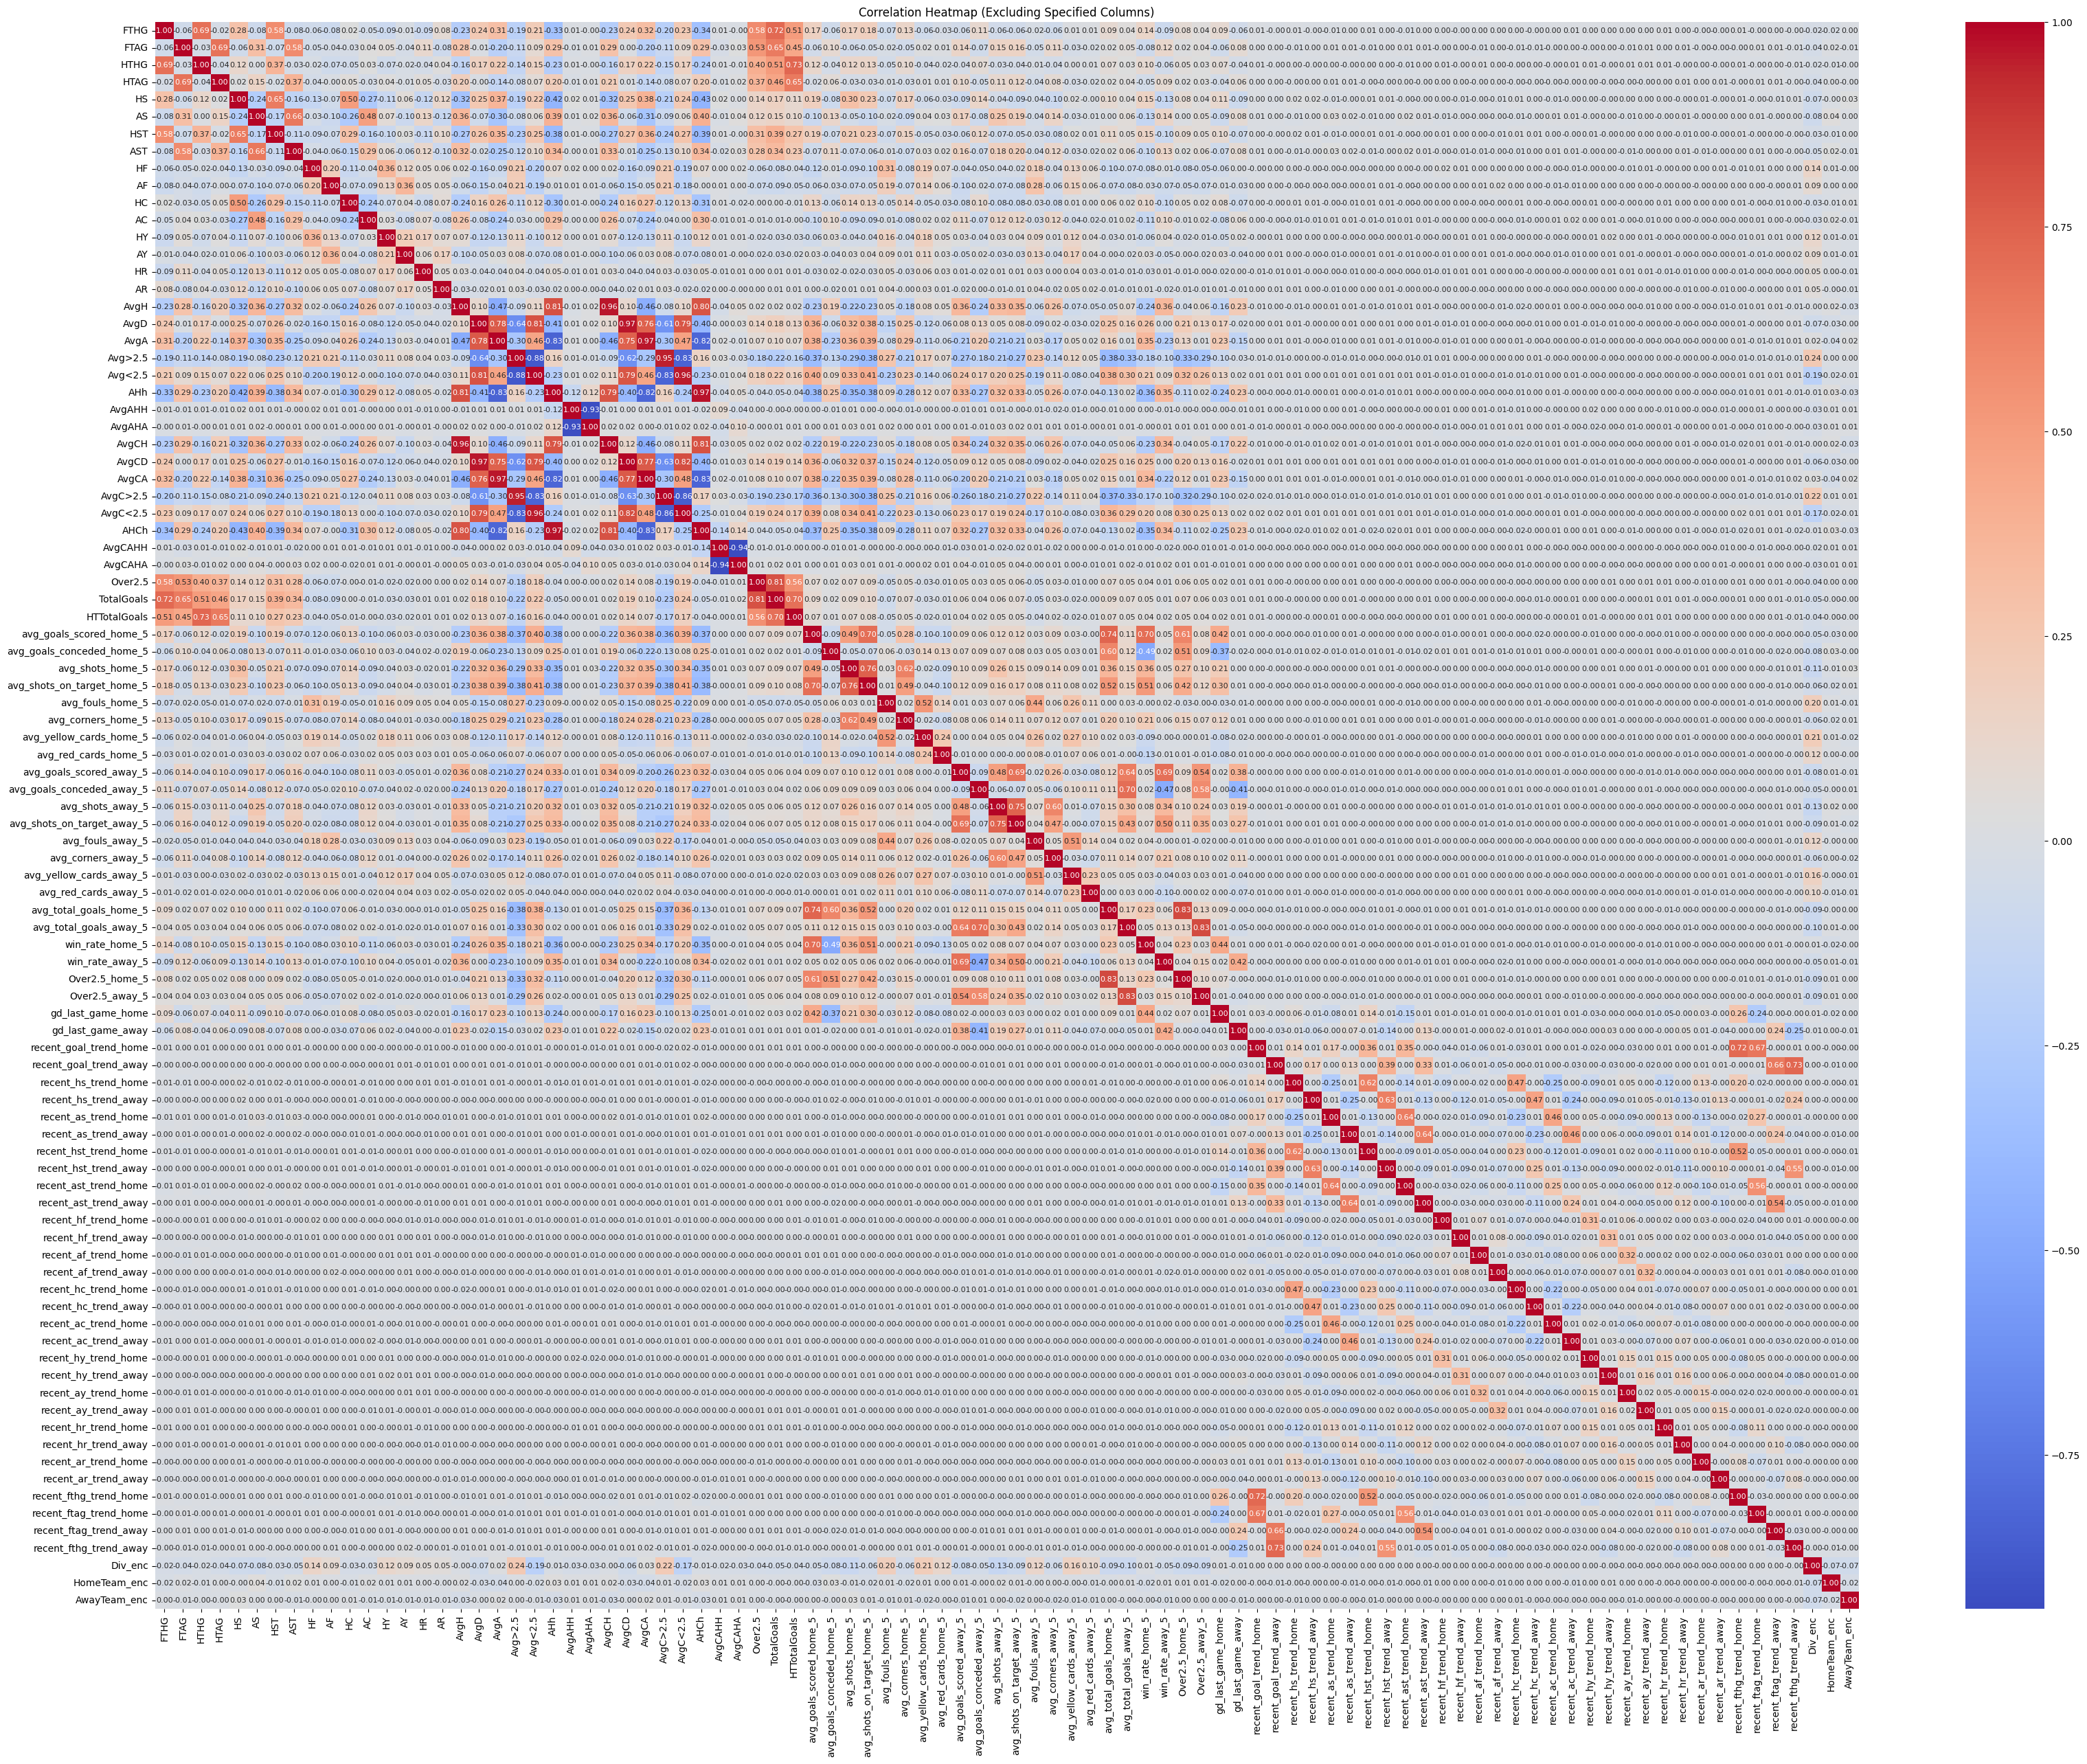

In [ ]:
# Calculate the correlation matrix, only including numeric columns
correlation_matrix = data_merged.select_dtypes(include=np.number).corr()

# Generate the heatmap
plt.figure(figsize=(40, 30)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Heatmap (Excluding Specified Columns)')
plt.show()

## **2.8 Final touches on the dataset + creatingg Base dataset**
- **I will solidify the indexes, delete possible data leaking columns and match statistics, since we are predicting before a match happens.**
- **I will also create the data_base dataset, which will only include the columns we have before buying the expanded dataset + the created columns corresponding.**

In [ ]:
# Solidifying the indexes
data_merged = data_merged.reset_index(drop=True)
data_merged

Div       Date   Time    HomeTeam      AwayTeam  FTHG  FTAG FTR  HTHG  \
0       B1 2019-07-26  19:30        Genk      Kortrijk     2     1   H   0.0   
1       F2 2019-07-26  19:00     Chambly  Valenciennes     1     0   H   0.0   
2       D2 2019-07-26  19:30   Stuttgart      Hannover     2     1   H   2.0   
3       F2 2019-07-26  19:00    Clermont   Chateauroux     3     0   H   1.0   
4       F2 2019-07-26  19:00    Guingamp      Grenoble     3     3   D   2.0   
...    ...        ...    ...         ...           ...   ...   ...  ..   ...   
42531  SP2 2025-06-01  17:30     Levante         Eibar     1     0   H   0.0   
42532  SP2 2025-06-01  17:30   La Coruna         Elche     0     4   A   0.0   
42533  SP2 2025-06-01  17:30      Huesca       Eldense     3     2   H   1.0   
42534  SP2 2025-06-01  17:30     Almeria      Tenerife     2     0   H   1.0   
42535   T1 2025-06-01  17:00  Samsunspor   Kayserispor     2     1   H   0.0   

       HTAG  ... Country_Greece  Country_Italy  Country_Netherlands  \
0       1.0  ...          False          False                False   
1       0.0  ...          False          False                False   
2       1.0  ...          False          False                False   
3       0.0  ...          False          False                False   
4       0.0  ...          False          False                False   
...     ...  ...            ...            ...                  ...   
42531   0.0  ...          False          False                False   
42532   3.0  ...          False          False                False   
42533   2.0  ...          False          False                False   
42534   0.0  ...          False          False                False   
42535   0.0  ...          False          False                False   

       Country_Portugal  Country_Scotland  Country_Spain  Country_Turkey  \
0                 False             False          False           False   
1                 False             False          False           False   
2                 False             False          False           False   
3                 False             False          False           False   
4                 False             False          False           False   
...                 ...               ...            ...             ...   
42531             False             False           True           False   
42532             False             False           True           False   
42533             False             False           True           False   
42534             False             False           True           False   
42535             False             False          False            True   

       Div_enc  HomeTeam_enc  AwayTeam_enc  
0            0           184           238  
1            8           101           444  
2            2           420           204  
3            8           111           104  
4            8           201           196  
...        ...           ...           ...  
42531       19           254           143  
42532       19           239           145  
42533       19           218           146  
42534       19            18           426  
42535       20           380           233  

[42536 rows x 110 columns]

**The indexes are now based on Date**

In [ ]:
# Dropping columns we do not need anymore
columns_to_drop = ['Div', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
                   'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF',
                   'HC', 'AC', 'HY', 'AY', 'HR', 'AR','TotalGoals', 'HTTotalGoals',]
data_merged = data_merged.drop(columns=columns_to_drop)

# Reorder columns (example reordering)
# You can change this list to specify your desired column order
desired_order = [
    'Date', 'Div_enc', 'HomeTeam_enc', 'AwayTeam_enc', 'Season', 'Over2.5',
    'AvgH', 'AvgD', 'AvgA', 'Avg>2.5', 'Avg<2.5', 'AHh', 'AvgAHH', 'AvgAHA', 'AvgCH', 'AvgCD', 'AvgCA',
    'AvgC>2.5', 'AvgC<2.5', 'AHCh', 'AvgCAHH', 'AvgCAHA',
    'avg_goals_scored_home_5', 'avg_goals_conceded_home_5', 'avg_shots_home_5', 'avg_shots_on_target_home_5',
    'avg_fouls_home_5', 'avg_corners_home_5', 'avg_yellow_cards_home_5', 'avg_red_cards_home_5',
    'avg_goals_scored_away_5', 'avg_goals_conceded_away_5', 'avg_shots_away_5', 'avg_shots_on_target_away_5',
    'avg_fouls_away_5', 'avg_corners_away_5', 'avg_yellow_cards_away_5', 'avg_red_cards_away_5',
    'avg_total_goals_home_5', 'avg_total_goals_away_5', 'win_rate_home_5', 'win_rate_away_5',
    'Over2.5_home_5', 'Over2.5_away_5', 'gd_last_game_home', 'gd_last_game_away',
    'recent_goal_trend_home', 'recent_goal_trend_away', 'recent_hs_trend_home', 'recent_hs_trend_away',
    'recent_as_trend_home', 'recent_as_trend_away', 'recent_hst_trend_home', 'recent_hst_trend_away',
    'recent_ast_trend_home', 'recent_ast_trend_away', 'recent_hf_trend_home', 'recent_hf_trend_away',
    'recent_af_trend_home', 'recent_af_trend_away', 'recent_hc_trend_home', 'recent_hc_trend_away',
    'recent_ac_trend_home', 'recent_ac_trend_away', 'recent_hy_trend_home', 'recent_hy_trend_away',
    'recent_ay_trend_home', 'recent_ay_trend_away', 'recent_hr_trend_home', 'recent_hr_trend_away',
    'recent_ar_trend_home', 'recent_ar_trend_away', 'recent_fthg_trend_home', 'recent_ftag_trend_home',
    'recent_ftag_trend_away', 'recent_fthg_trend_away',
    'Country_England',	'Country_France',	'Country_Germany',	'Country_Greece',	'Country_Italy',	'Country_Netherlands',
    'Country_Portugal',	'Country_Scotland',	'Country_Spain',	'Country_Turkey'
]
data_merged = data_merged[desired_order]
data_merged

Date  Div_enc  HomeTeam_enc  AwayTeam_enc Season  Over2.5  AvgH  \
0     2019-07-26        0           184           238   1920        1  1.38   
1     2019-07-26        8           101           444   1920        0  2.48   
2     2019-07-26        2           420           204   1920        1  1.74   
3     2019-07-26        8           111           104   1920        1  1.80   
4     2019-07-26        8           201           196   1920        1  1.73   
...          ...      ...           ...           ...    ...      ...   ...   
42531 2025-06-01       19           254           143   2425        0  1.54   
42532 2025-06-01       19           239           145   2425        1  5.30   
42533 2025-06-01       19           218           146   2425        1  2.13   
42534 2025-06-01       19            18           426   2425        0  1.22   
42535 2025-06-01       20           380           233   2425        1  1.76   

       AvgD   AvgA  Avg>2.5  ...  Country_England  Country_France  \
0      4.94   7.42     1.51  ...            False           False   
1      3.05   2.96     2.13  ...            False            True   
2      3.85   4.41     1.67  ...            False           False   
3      3.41   4.56     2.11  ...            False            True   
4      3.42   5.05     2.19  ...            False            True   
...     ...    ...      ...  ...              ...             ...   
42531  4.27   5.15     1.60  ...            False           False   
42532  4.43   1.52     1.49  ...            False           False   
42533  2.98   3.75     2.09  ...            False           False   
42534  6.23  10.97     1.51  ...            False           False   
42535  3.46   4.79     1.55  ...            False           False   

       Country_Germany  Country_Greece  Country_Italy  Country_Netherlands  \
0                False           False          False                False   
1                False           False          False                False   
2                 True           False          False                False   
3                False           False          False                False   
4                False           False          False                False   
...                ...             ...            ...                  ...   
42531            False           False          False                False   
42532            False           False          False                False   
42533            False           False          False                False   
42534            False           False          False                False   
42535            False           False          False                False   

       Country_Portugal  Country_Scotland  Country_Spain  Country_Turkey  
0                 False             False          False           False  
1                 False             False          False           False  
2                 False             False          False           False  
3                 False             False          False           False  
4                 False             False          False           False  
...                 ...               ...            ...             ...  
42531             False             False           True           False  
42532             False             False           True           False  
42533             False             False           True           False  
42534             False             False           True           False  
42535             False             False          False            True  

[42536 rows x 86 columns]

**All the unwanted columns are deleted and the Merged dataset**

In [ ]:
# Creating Base dataset
# Div Date Time HomeTeam AwayTeam FTHG FTAG FTR

data_base = data_merged[['Date','Season', 'Div_enc', 'HomeTeam_enc', 'AwayTeam_enc', 'Season',
                         'avg_goals_scored_home_5', 'avg_goals_conceded_home_5', 'avg_goals_scored_away_5',
                         'avg_goals_conceded_away_5', 'avg_total_goals_home_5', 'avg_total_goals_away_5',
                         'win_rate_home_5', 'win_rate_away_5', 'Over2.5_home_5', 'Over2.5_away_5', 'gd_last_game_home',
                         'gd_last_game_away', 'recent_goal_trend_home', 'recent_goal_trend_away', 'recent_fthg_trend_home',
                         'recent_ftag_trend_home', 'recent_ftag_trend_away', 'recent_fthg_trend_away', 'Over2.5',
                         'Country_England',	'Country_France',	'Country_Germany',	'Country_Greece',	'Country_Italy',	'Country_Netherlands',
                         'Country_Portugal',	'Country_Scotland',	'Country_Spain',	'Country_Turkey']]

data_base

Date Season  Div_enc  HomeTeam_enc  AwayTeam_enc Season  \
0     2019-07-26   1920        0           184           238   1920   
1     2019-07-26   1920        8           101           444   1920   
2     2019-07-26   1920        2           420           204   1920   
3     2019-07-26   1920        8           111           104   1920   
4     2019-07-26   1920        8           201           196   1920   
...          ...    ...      ...           ...           ...    ...   
42531 2025-06-01   2425       19           254           143   2425   
42532 2025-06-01   2425       19           239           145   2425   
42533 2025-06-01   2425       19           218           146   2425   
42534 2025-06-01   2425       19            18           426   2425   
42535 2025-06-01   2425       20           380           233   2425   

       avg_goals_scored_home_5  avg_goals_conceded_home_5  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          0.0                        0.0   
3                          0.0                        0.0   
4                          0.0                        0.0   
...                        ...                        ...   
42531                      2.6                        1.2   
42532                      2.0                        1.2   
42533                      1.6                        1.6   
42534                      2.4                        0.4   
42535                      1.4                        1.2   

       avg_goals_scored_away_5  avg_goals_conceded_away_5  ...  \
0                          0.0                        0.0  ...   
1                          0.0                        0.0  ...   
2                          0.0                        0.0  ...   
3                          0.0                        0.0  ...   
4                          0.0                        0.0  ...   
...                        ...                        ...  ...   
42531                      1.0                        0.6  ...   
42532                      1.2                        0.8  ...   
42533                      0.4                        1.8  ...   
42534                      1.0                        1.0  ...   
42535                      1.2                        1.6  ...   

       Country_England  Country_France  Country_Germany  Country_Greece  \
0                False           False            False           False   
1                False            True            False           False   
2                False           False             True           False   
3                False            True            False           False   
4                False            True            False           False   
...                ...             ...              ...             ...   
42531            False           False            False           False   
42532            False           False            False           False   
42533            False           False            False           False   
42534            False           False            False           False   
42535            False           False            False           False   

       Country_Italy  Country_Netherlands  Country_Portugal  Country_Scotland  \
0              False                False             False             False   
1              False                False             False             False   
2              False                False             False             False   
3              False                False             False             False   
4              False                False             False             False   
...              ...                  ...               ...               ...   
42531          False                False             False             False   
42532          False                False             False             False   
425



---


**Final heatmap of correlation for the buyable dataset**

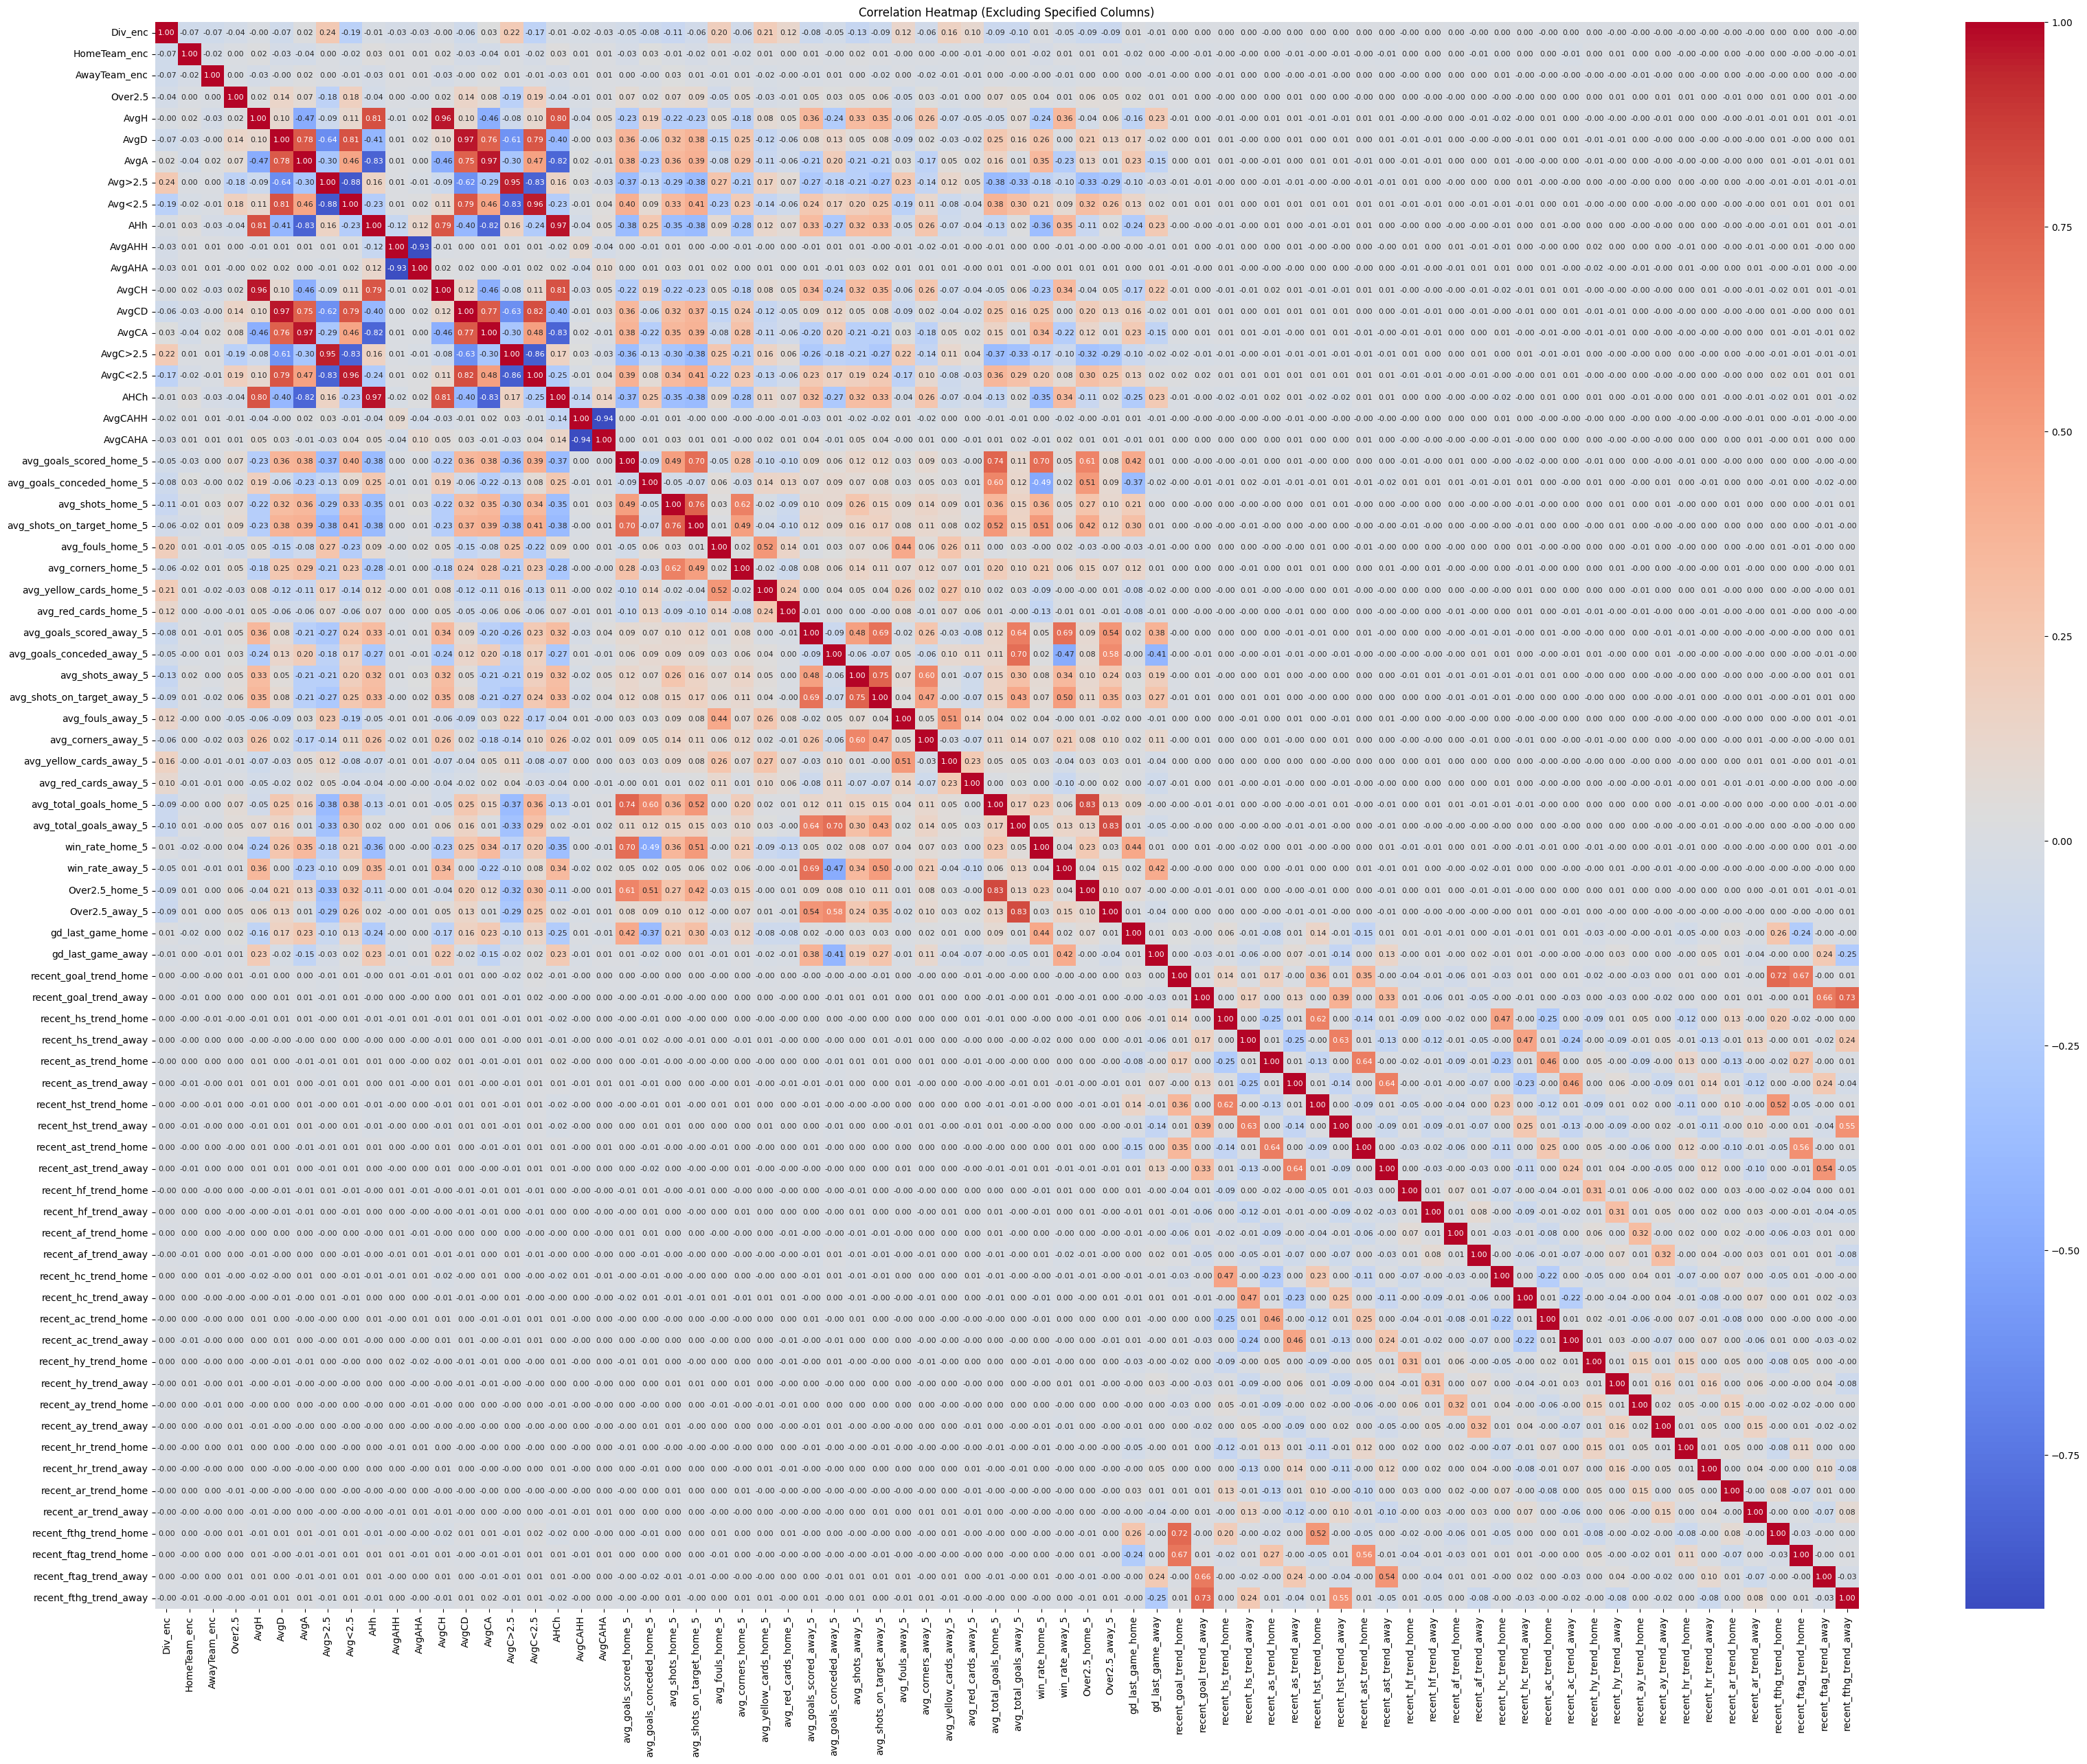

In [ ]:
# Calculate the correlation matrix, only including numeric columns
correlation_matrix = data_merged.select_dtypes(include=np.number).corr()

# Generate the heatmap
plt.figure(figsize=(40, 30)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Heatmap (Excluding Specified Columns)')
plt.show()



---


**Final heatmap of correlation for the buyable dataset**

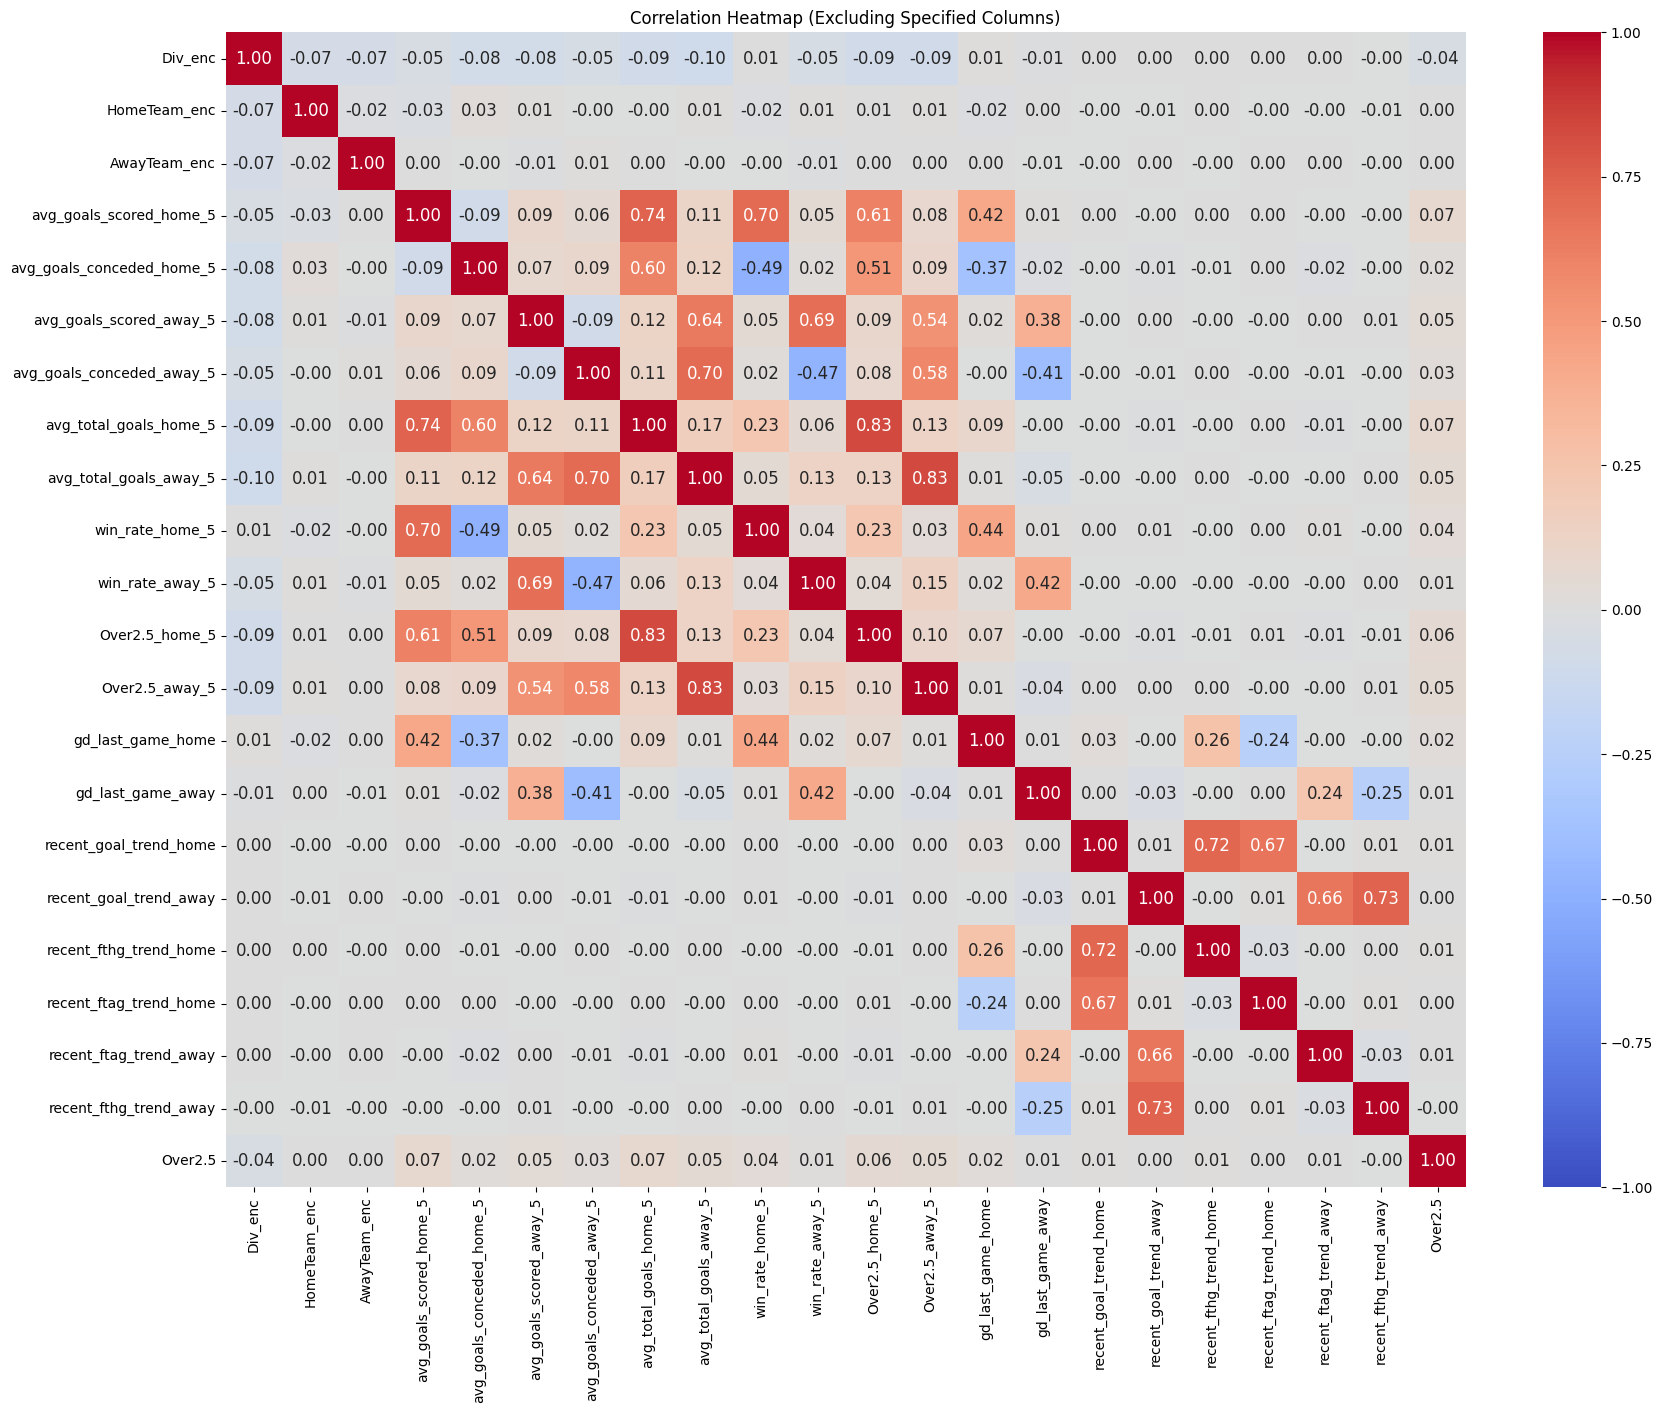

In [ ]:
# Calculate the correlation matrix, only including numeric columns
correlation_matrix = data_base.select_dtypes(include=np.number).corr()

# Generate the heatmap
plt.figure(figsize=(20, 15)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Specified Columns)')
plt.show()